In [ ]:
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler



In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from xgboost import XGBClassifier


In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [ ]:
df=pd.read_csv("train.csv")
df.head()
df.columns


Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls', 'tariff',
       'Handset', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'high Dropped calls', 'No Usage', 'target', 'id'],
      dtype='object')

In [ ]:
#transvert the connect date to date style and caculate the usage years
df['Connect_Date'] = pd.to_datetime(df['Connect_Date'], format='%d/%m/%y')


In [ ]:
df=df.sort_values(by="Connect_Date",ascending=False)
df

Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff  Handset  \
1862      F  32.0   1999-12-31   9.533333            1.0   CAT 100    BS110   
4137      M  20.0   1999-12-28   9.633333            3.0   CAT 200   ASAD90   
1409      F  38.0   1999-12-28   9.633333            1.0   CAT 200      S50   
2261      F  27.0   1999-12-28   9.633333            2.0  Play 100    BS110   
676       F  40.0   1999-12-28   9.633333            0.0   CAT 200     WC95   
...     ...   ...          ...        ...            ...       ...      ...   
1705      F  58.0   1996-01-02  58.166667            0.0   CAT 200      S80   
1201      F  19.0   1996-01-02  58.166667            7.0   CAT 100  ASAD170   
4941      M  28.0   1996-01-01  58.200000            0.0   CAT 200    BS110   
1131      F  21.0   1996-01-01  58.200000            3.0   CAT 200  ASAD170   
1207      M  28.0   1996-01-01  58.200000            2.0    CAT 50    BS110   

      Peak_calls_Sum  Peak_mins_Sum  OffPeak_calls_Sum  ...  Tariff_OK  \
1862           166.0     408.600000               35.0  ...         OK   
4137           235.0     774.600000              260.0  ...         OK   
1409           224.0    1336.799999               48.0  ...         OK   
2261            13.0     108.000000               35.0  ...         OK   
676             90.0    1170.000000               81.0  ...         OK   
...              ...            ...                ...  ...        ...   
1705           515.0    1080.000000                2.0  ...         OK   
1201           242.0     666.600000               93.0  ...         OK   
4941            50.0     837.000000              109.0  ...         OK   
1131           345.0    1064.400001              140.0  ...         OK   
1207           164.0     272.400001              100.0  ...         OK   

      average cost min  Peak ratio  OffPeak ratio  Weekend ratio  \
1862          0.204534    0.738612       0.229935       0.031453   
4137          0.139240    0.505350       0.439196       0.055454   
1409          0.160436    0.882376       0.092673       0.024950   
2261          0.161704    0.192719       0.748394       0.058887   
676           0.123201    0.730064       0.244103       0.025833   
...                ...         ...            ...            ...   
1705          0.158010    0.916497       0.008147       0.075356   
1201          0.184989    0.714469       0.274598       0.010932   
4941          0.144076    0.699248       0.247619       0.053133   
1131          0.141948    0.609203       0.309409       0.081387   
1207          0.237376    0.606952       0.393048       0.000000   

      Nat-InterNat Ratio  high Dropped calls  No Usage  target       id  
1862            0.154289                   F         F       0  K286950  
4137            0.155750                   F         F       1  K196160  
1409            0.299908                   F         F       0  K132820  
2261            0.229732                   F         F       0  K248310  
676             0.044524                   F         F       0  K323970  
...                  ...                 ...       ...     ...      ...  
1705            0.216347                   F         F       0  K113650  
1201            0.253047                   F         F       0  K167570  
4941            0.120330                   F         F       0  K370120  
1131            0.195490                   F         F       0  K189410  
1207            0.237066                   F         F       0  K330590  

[5044 rows x 39 columns]

In [ ]:
last_date=pd.to_datetime('2000-01-01')
df['use_days']=(last_date-df['Connect_Date']).dt.days
df

Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff  Handset  \
1862      F  32.0   1999-12-31   9.533333            1.0   CAT 100    BS110   
4137      M  20.0   1999-12-28   9.633333            3.0   CAT 200   ASAD90   
1409      F  38.0   1999-12-28   9.633333            1.0   CAT 200      S50   
2261      F  27.0   1999-12-28   9.633333            2.0  Play 100    BS110   
676       F  40.0   1999-12-28   9.633333            0.0   CAT 200     WC95   
...     ...   ...          ...        ...            ...       ...      ...   
1705      F  58.0   1996-01-02  58.166667            0.0   CAT 200      S80   
1201      F  19.0   1996-01-02  58.166667            7.0   CAT 100  ASAD170   
4941      M  28.0   1996-01-01  58.200000            0.0   CAT 200    BS110   
1131      F  21.0   1996-01-01  58.200000            3.0   CAT 200  ASAD170   
1207      M  28.0   1996-01-01  58.200000            2.0    CAT 50    BS110   

      Peak_calls_Sum  Peak_mins_Sum  OffPeak_calls_Sum  ...  average cost min  \
1862           166.0     408.600000               35.0  ...          0.204534   
4137           235.0     774.600000              260.0  ...          0.139240   
1409           224.0    1336.799999               48.0  ...          0.160436   
2261            13.0     108.000000               35.0  ...          0.161704   
676             90.0    1170.000000               81.0  ...          0.123201   
...              ...            ...                ...  ...               ...   
1705           515.0    1080.000000                2.0  ...          0.158010   
1201           242.0     666.600000               93.0  ...          0.184989   
4941            50.0     837.000000              109.0  ...          0.144076   
1131           345.0    1064.400001              140.0  ...          0.141948   
1207           164.0     272.400001              100.0  ...          0.237376   

      Peak ratio  OffPeak ratio  Weekend ratio  Nat-InterNat Ratio  \
1862    0.738612       0.229935       0.031453            0.154289   
4137    0.505350       0.439196       0.055454            0.155750   
1409    0.882376       0.092673       0.024950            0.299908   
2261    0.192719       0.748394       0.058887            0.229732   
676     0.730064       0.244103       0.025833            0.044524   
...          ...            ...            ...                 ...   
1705    0.916497       0.008147       0.075356            0.216347   
1201    0.714469       0.274598       0.010932            0.253047   
4941    0.699248       0.247619       0.053133            0.120330   
1131    0.609203       0.309409       0.081387            0.195490   
1207    0.606952       0.393048       0.000000            0.237066   

      high Dropped calls  No Usage  target       id  use_days  
1862                   F         F       0  K286950         1  
4137                   F         F       1  K196160         4  
1409                   F         F       0  K132820         4  
2261                   F         F       0  K248310         4  
676                    F         F       0  K323970         4  
...                  ...       ...     ...      ...       ...  
1705                   F         F       0  K113650      1460  
1201                   F         F       0  K167570      1460  
4941                   F         F       0  K370120      1461  
1131                   F         F       0  K189410      1461  
1207                   F         F       0  K330590      1461  

[5044 rows x 40 columns]

In [ ]:
# check missing value
np.where(df.isna())



(array([1799, 1799, 1799, 1835, 1835, 1835, 3533, 3533, 3533, 5036, 5036,
        5036]),
 array([22, 23, 25, 22, 23, 25, 22, 23, 25, 22, 23, 25]))

In [ ]:
df.iloc[[1799,1835,3533,5036],[22,23,25]]

Dropped_calls_ratio Usage_Band  call_cost_per_min
4301                  NaN        NaN                NaN
1736                  NaN        NaN                NaN
3237                  NaN        NaN                NaN
3836                  NaN        NaN                NaN

In [ ]:
report = sv.analyze(df,pairwise_analysis='on')

Feature: Gender                              |▏         | [  2%]   00:00 -> (00:05 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:10 -> (00:00 left)



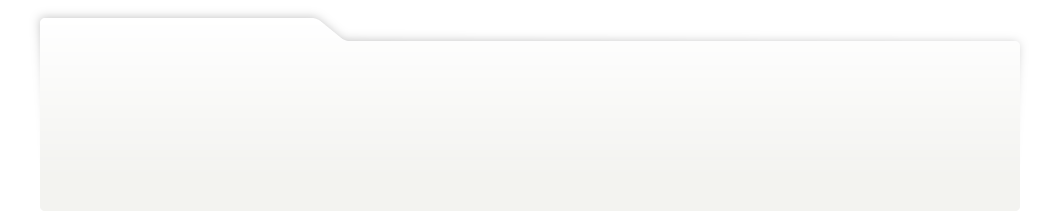
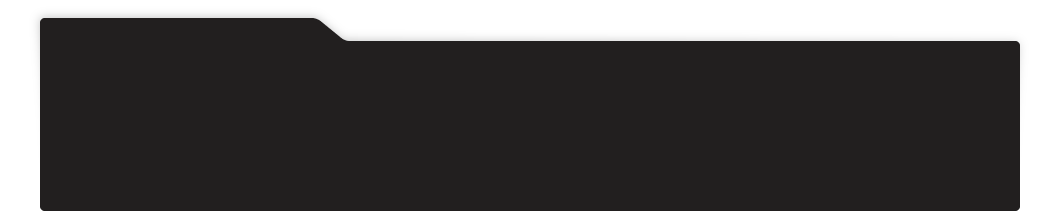
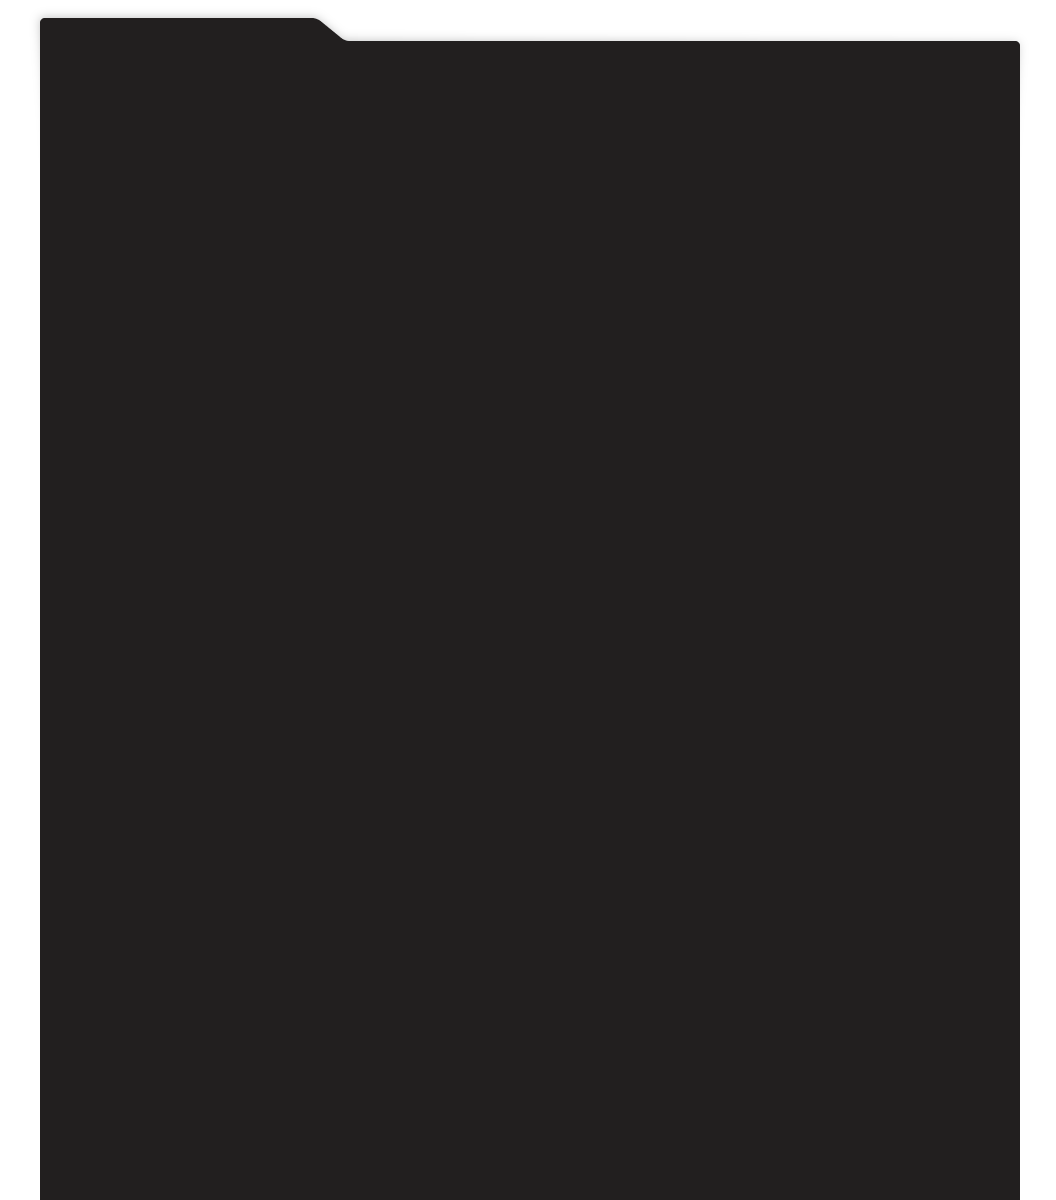
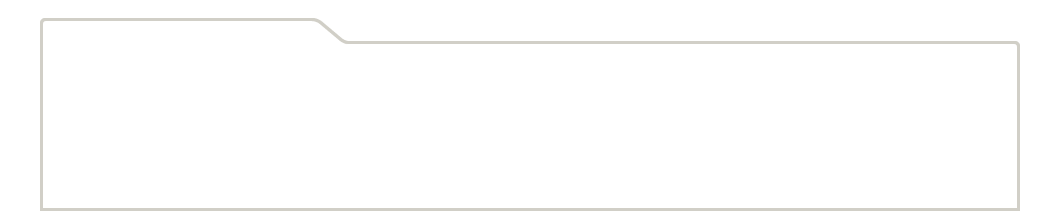
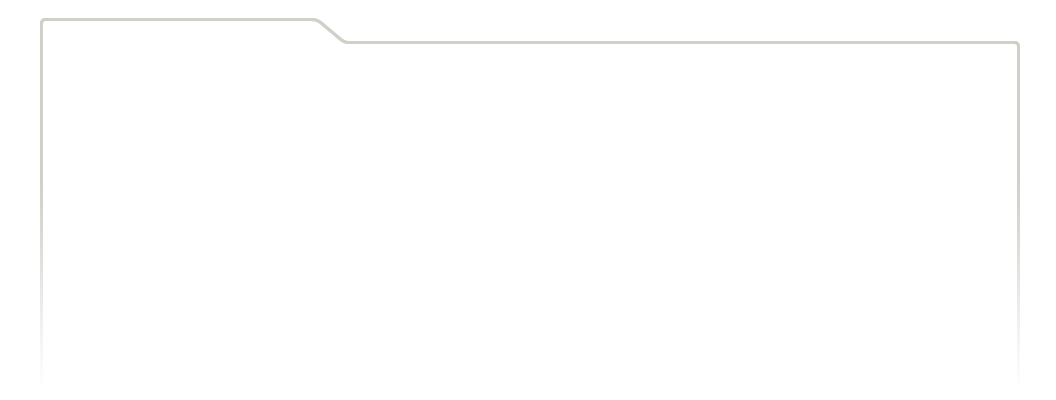
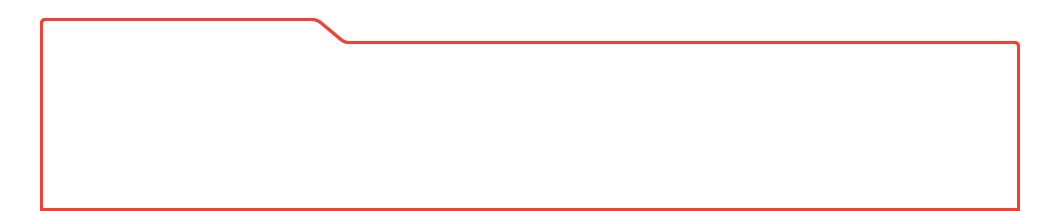
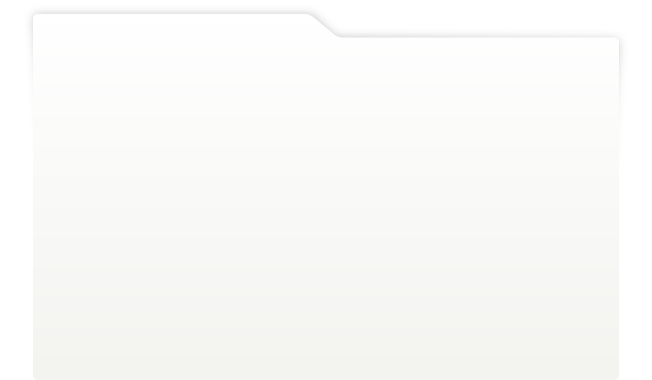
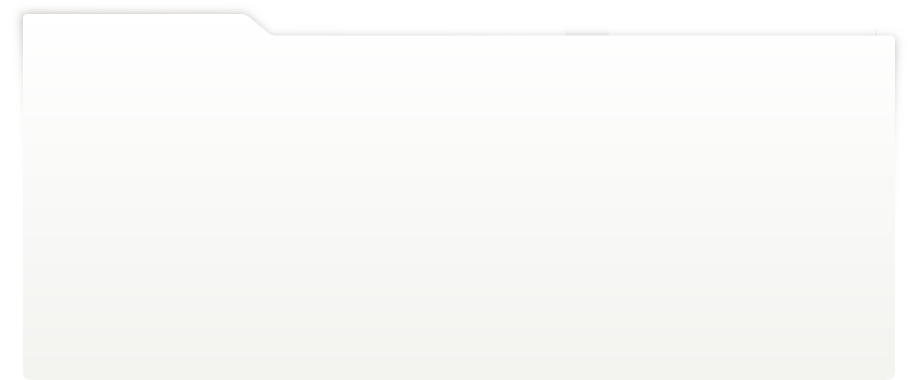
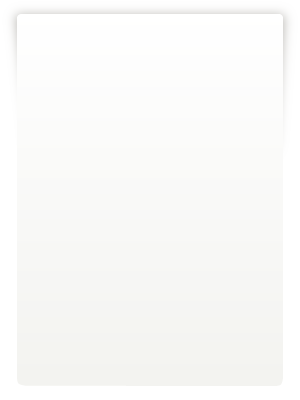
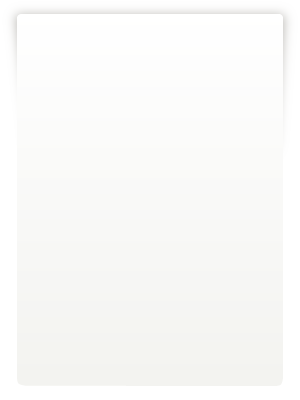
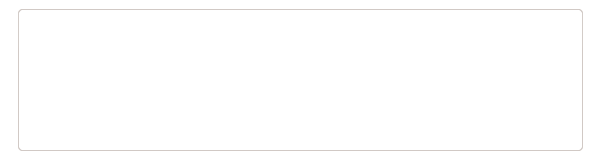
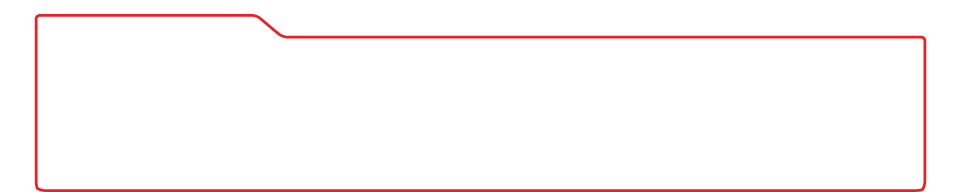
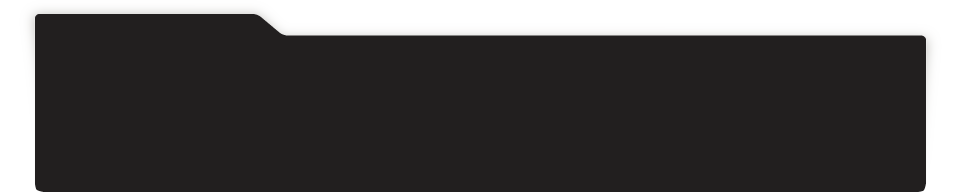
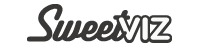
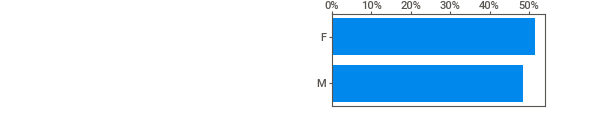
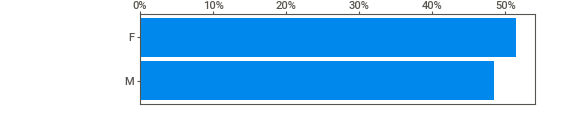
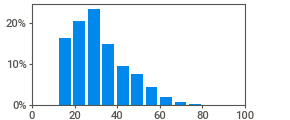
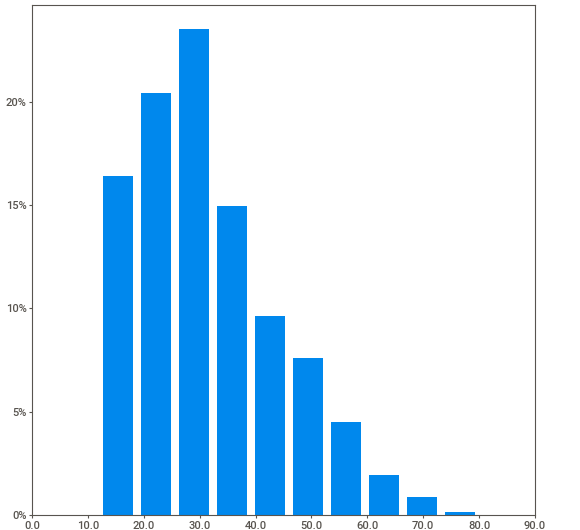
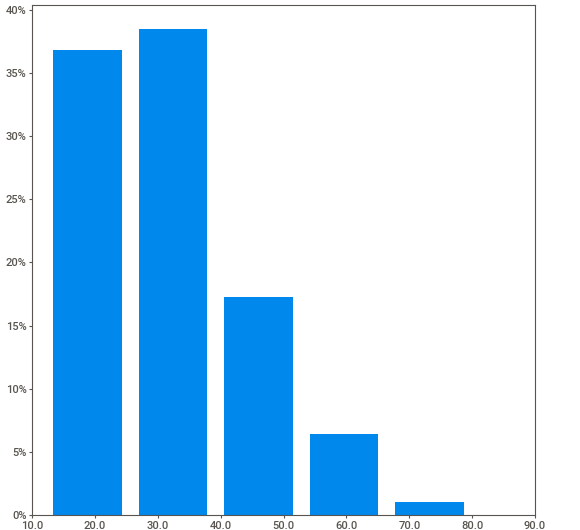
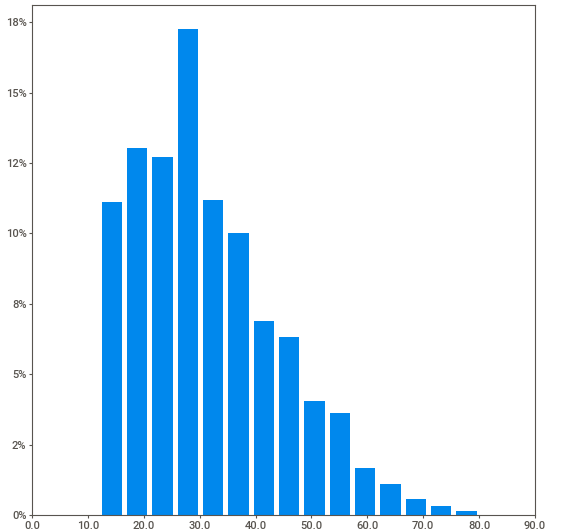
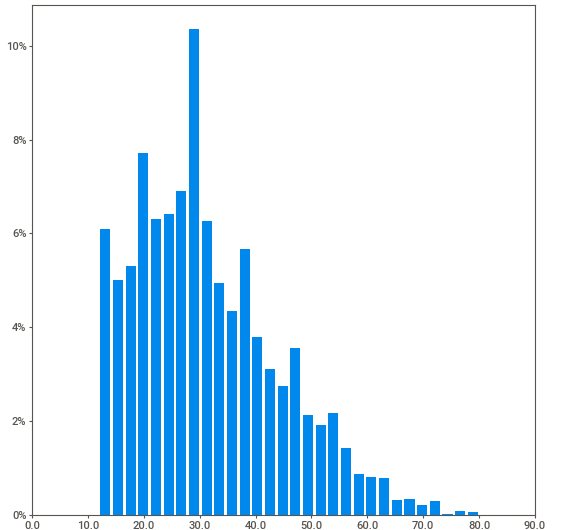
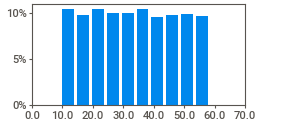
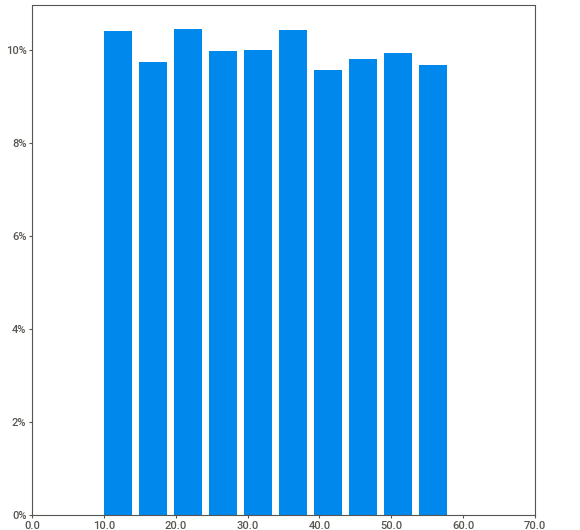
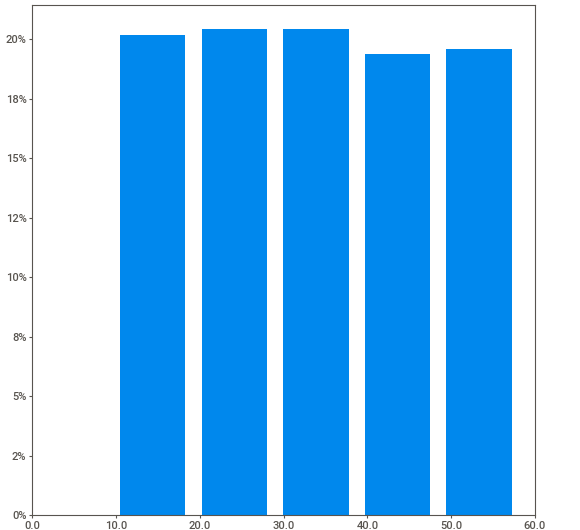
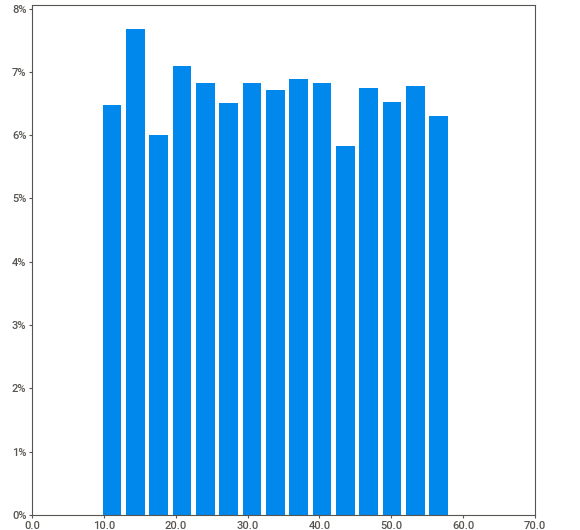
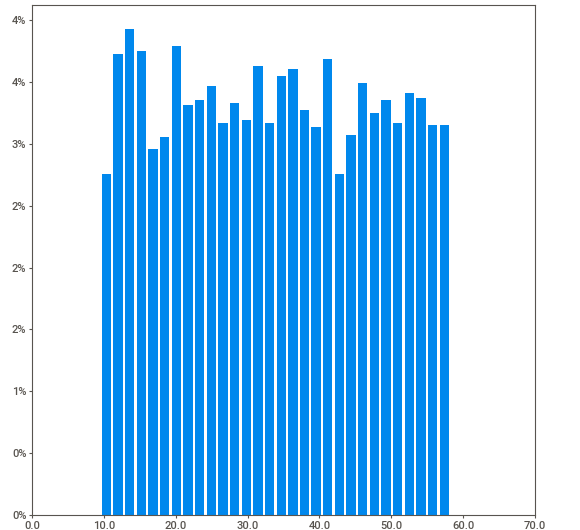
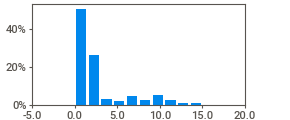
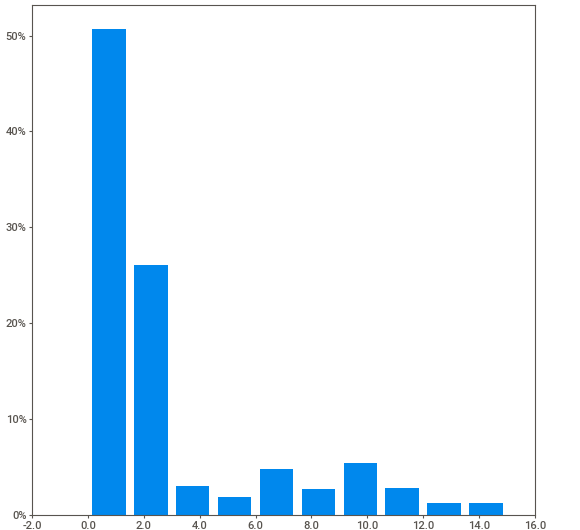
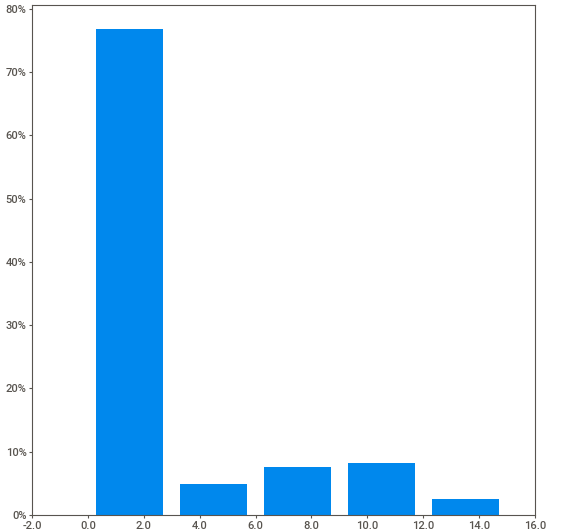
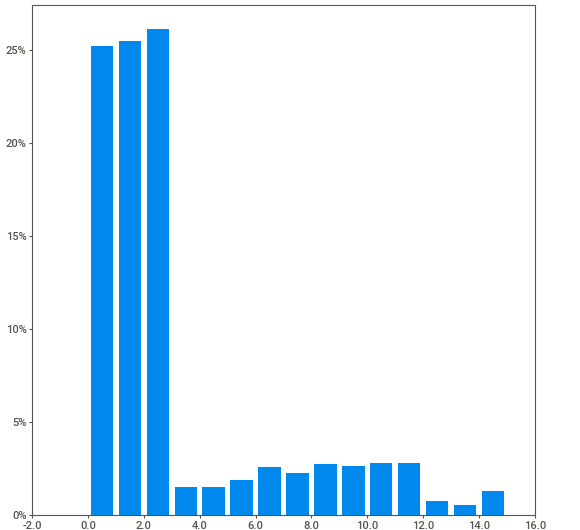
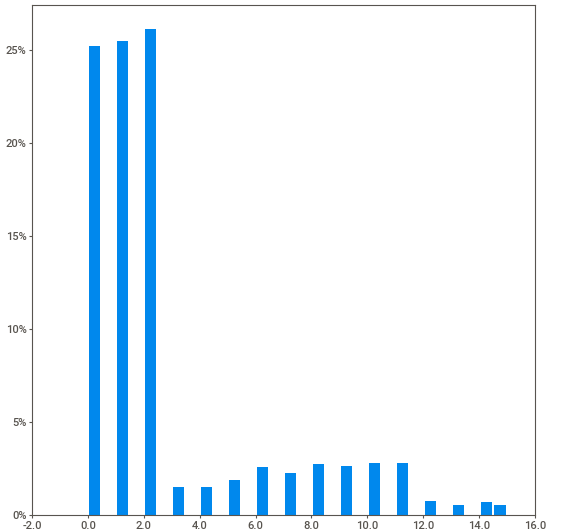
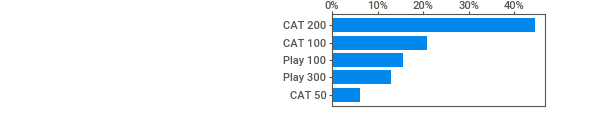
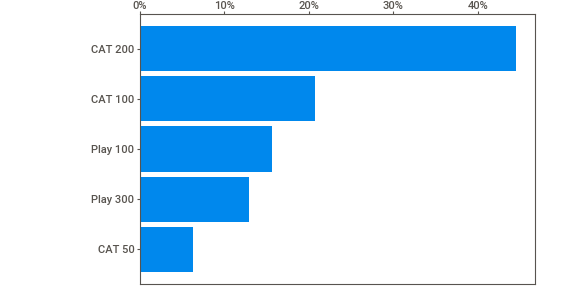
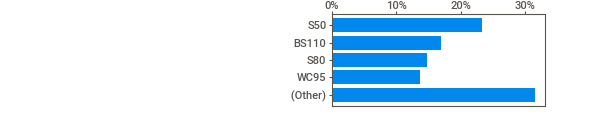
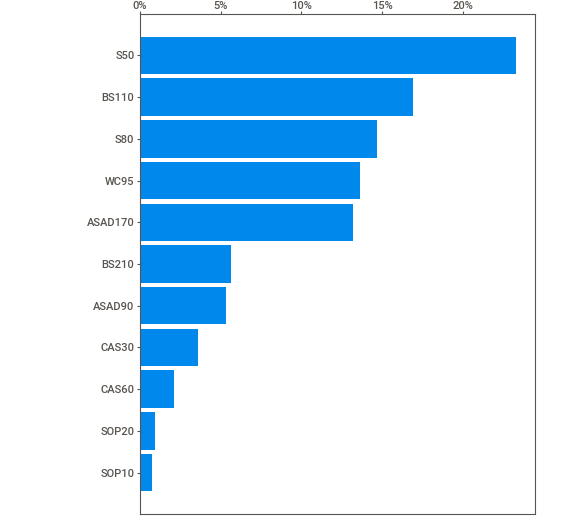
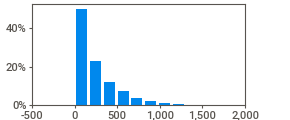
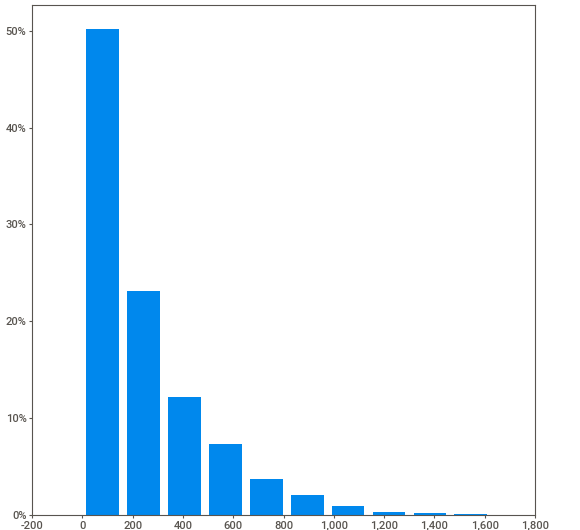
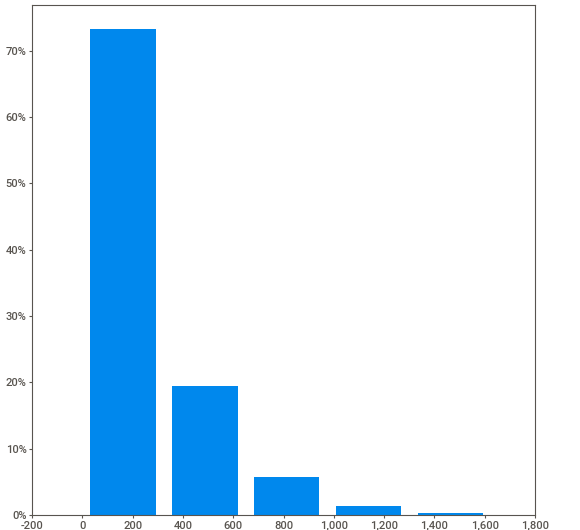
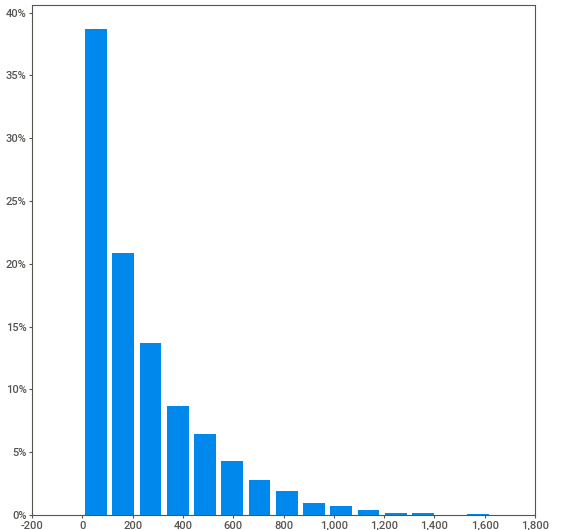
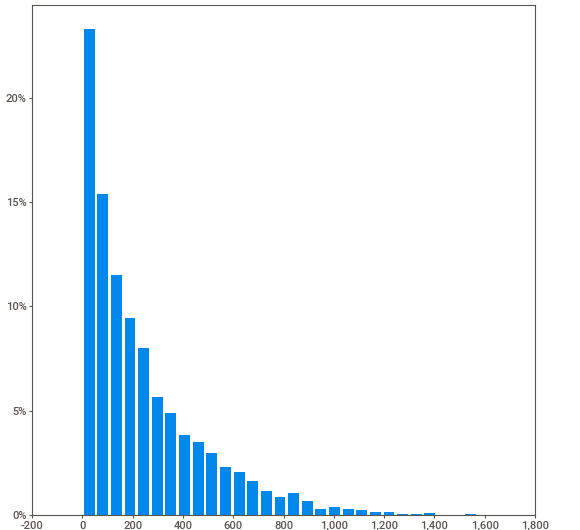
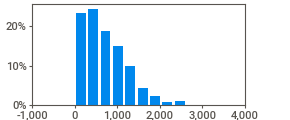
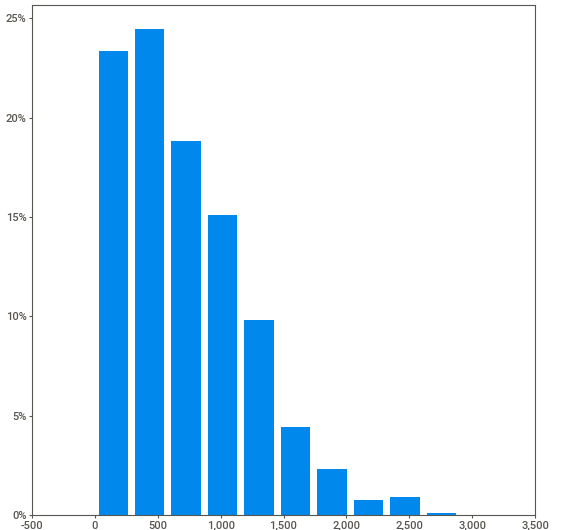
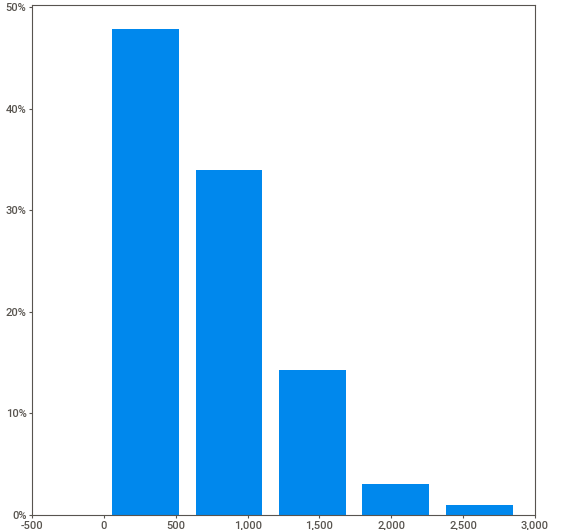
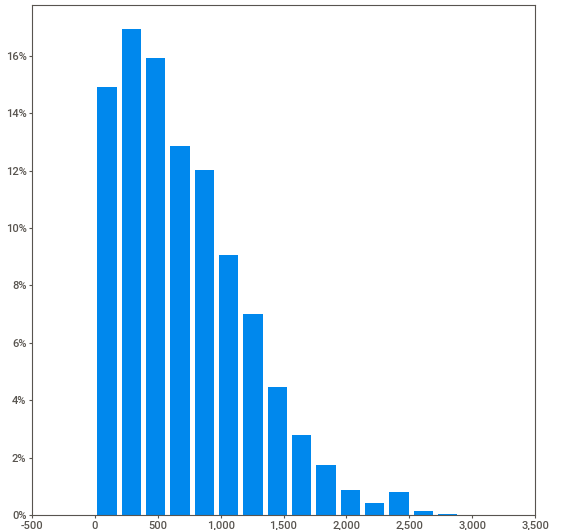
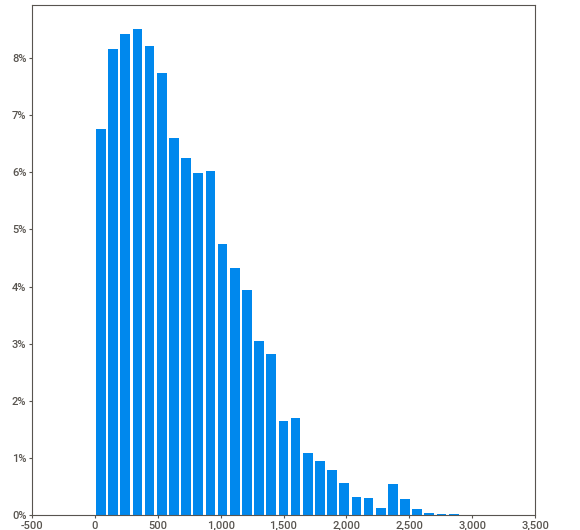
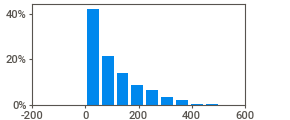
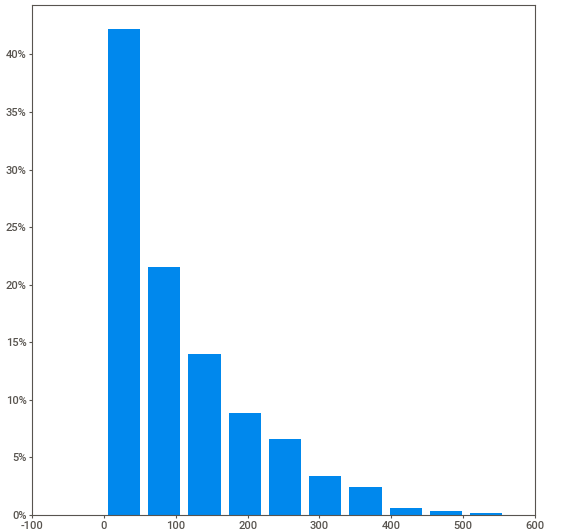
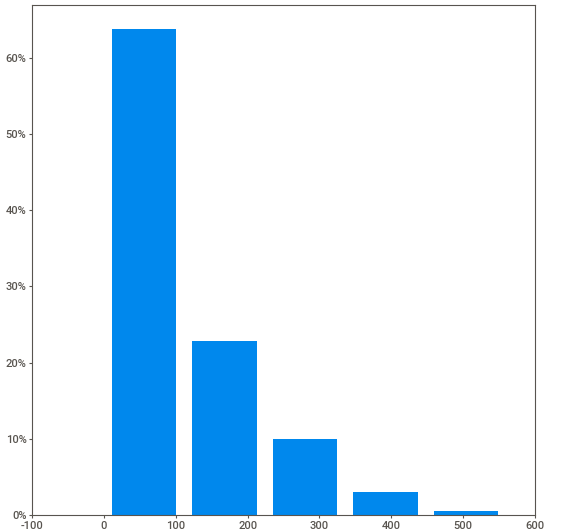
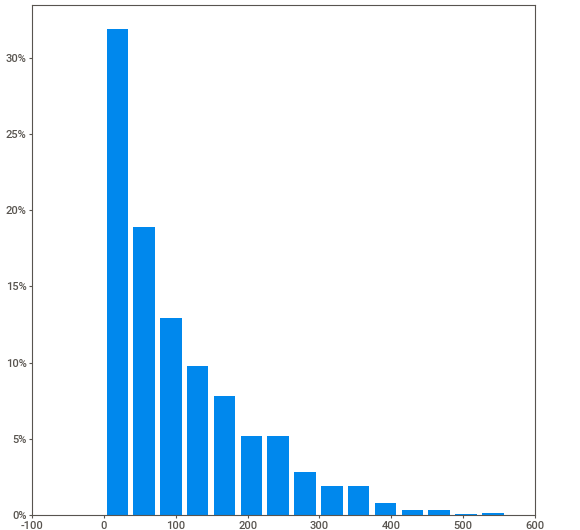
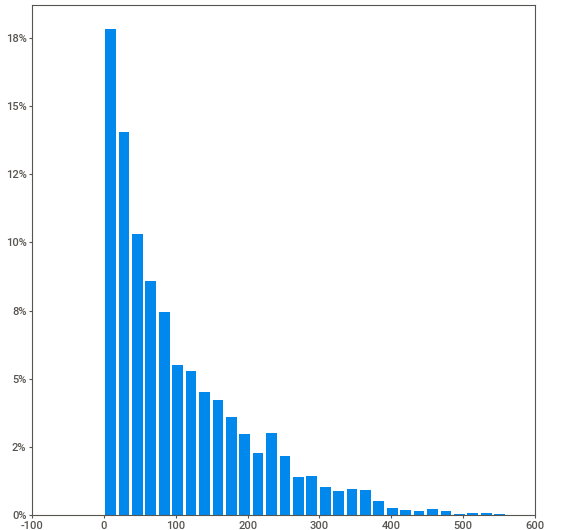
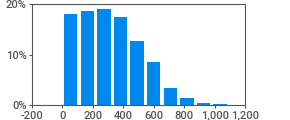
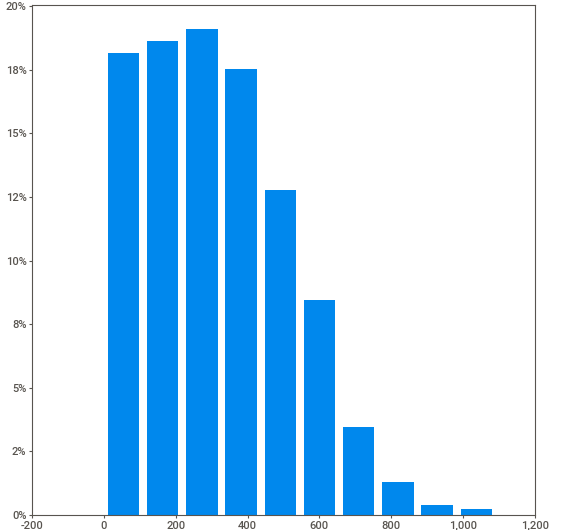
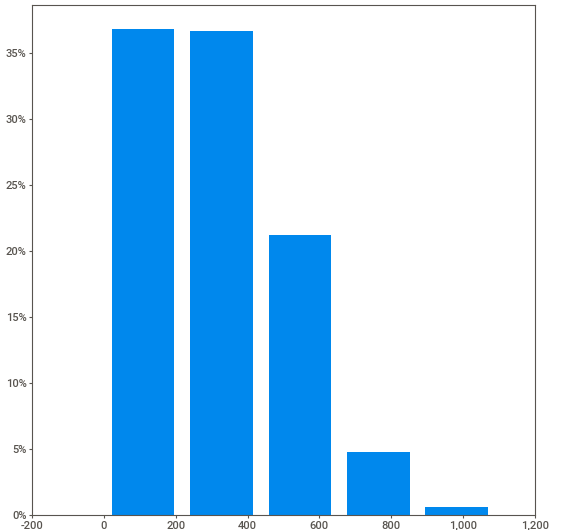
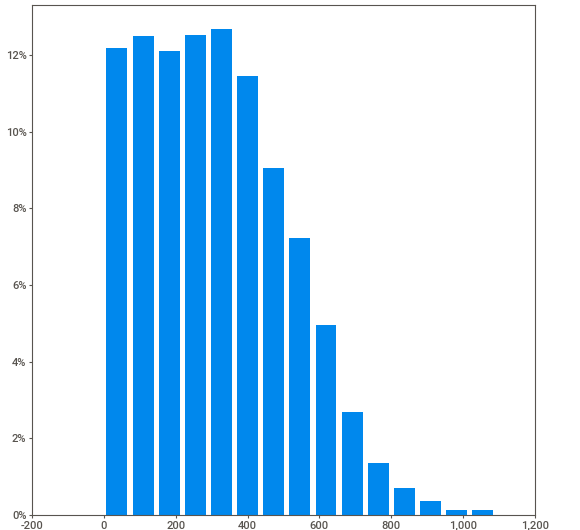
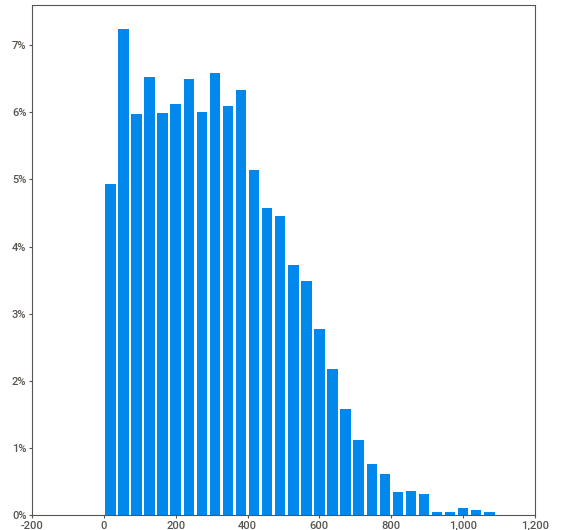
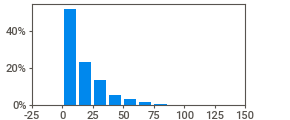
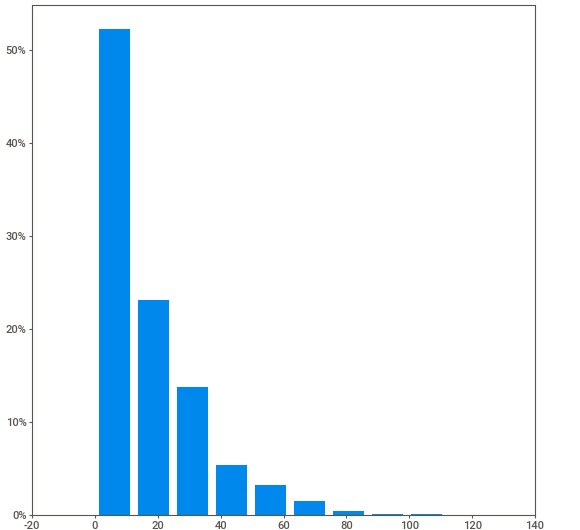
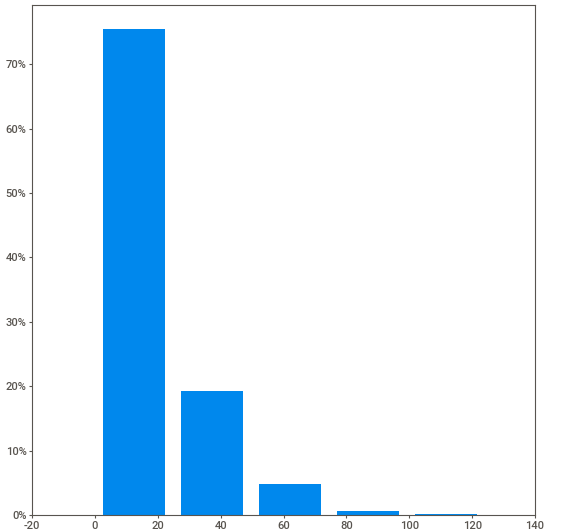
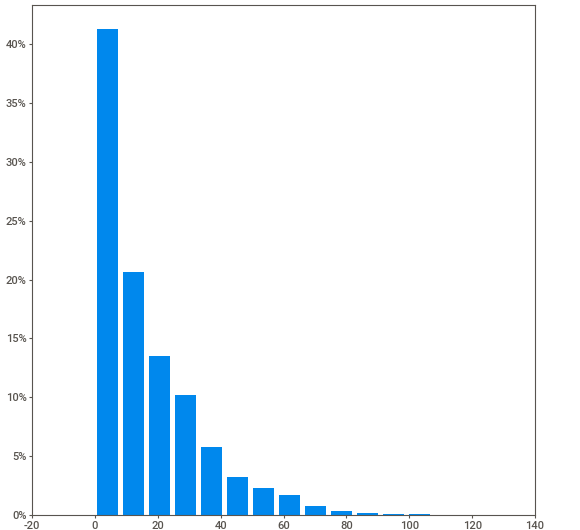
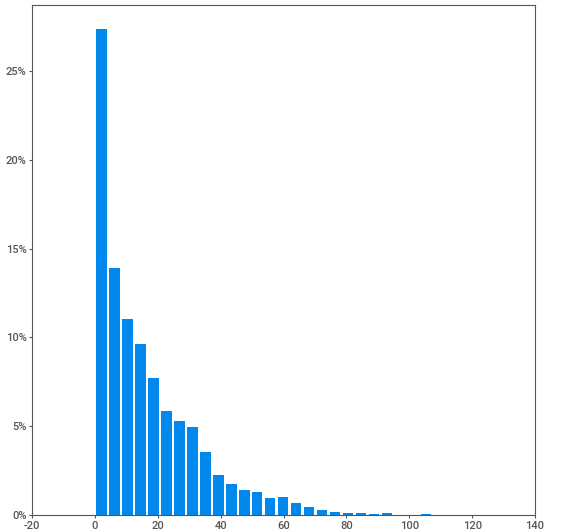
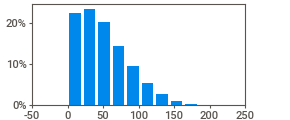
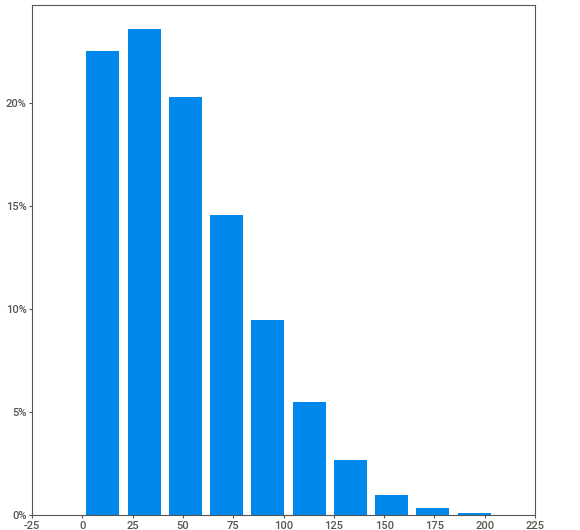
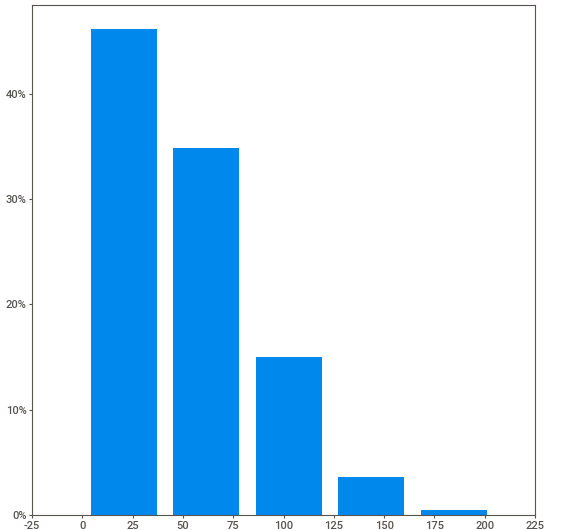
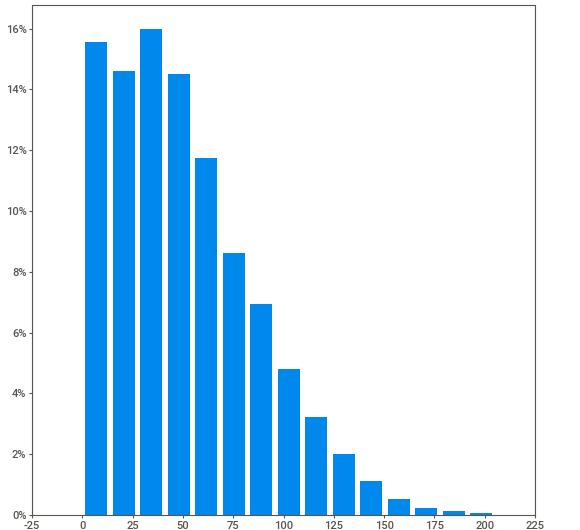
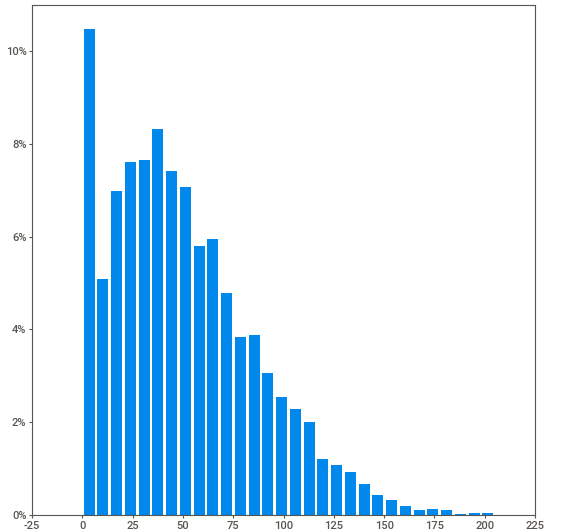
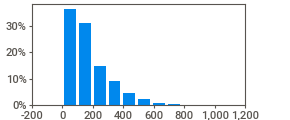
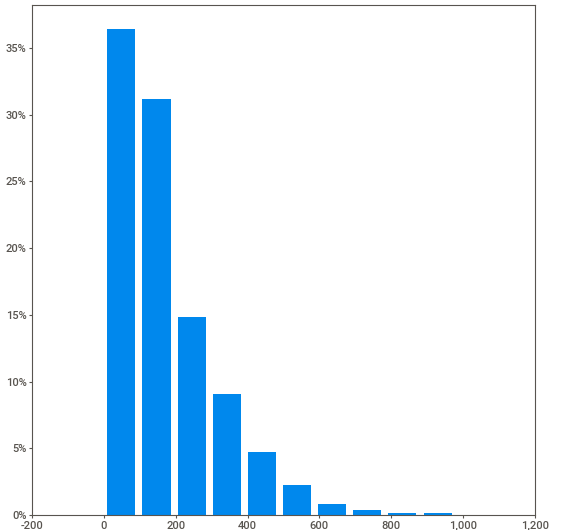
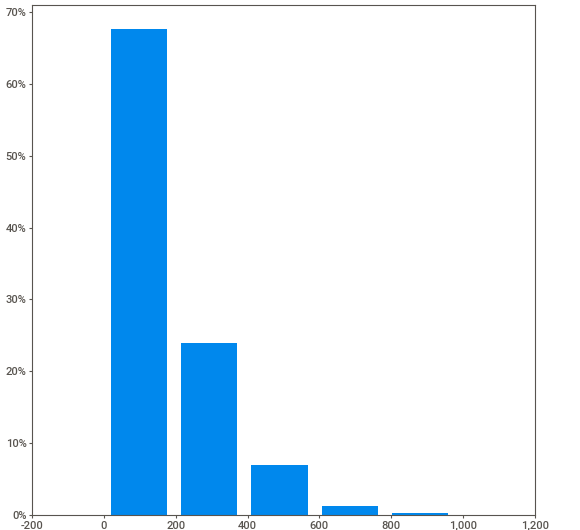
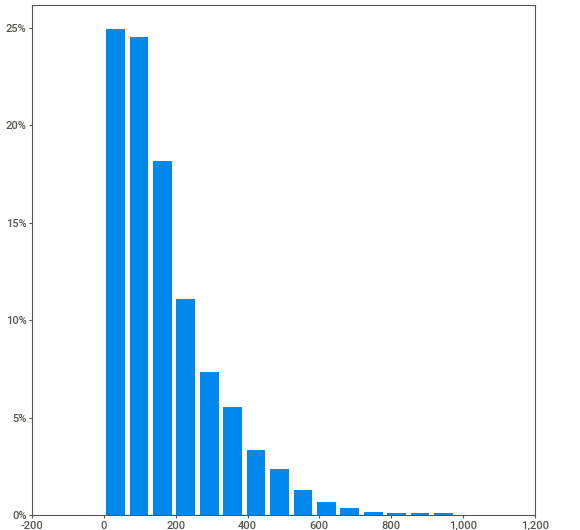
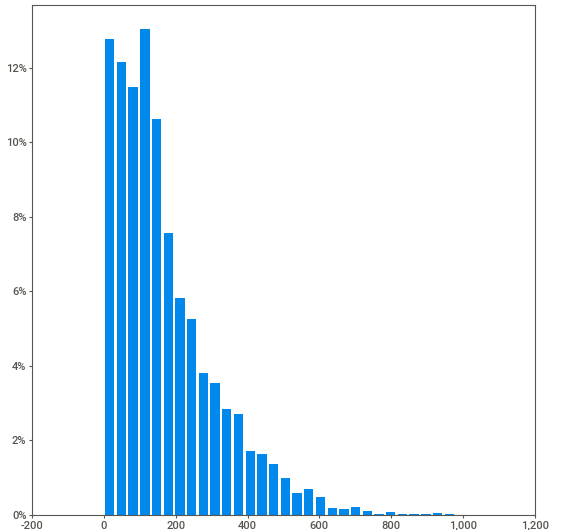
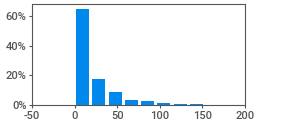
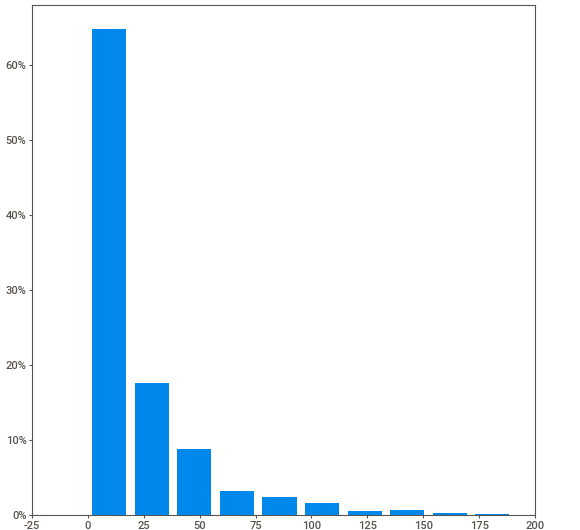
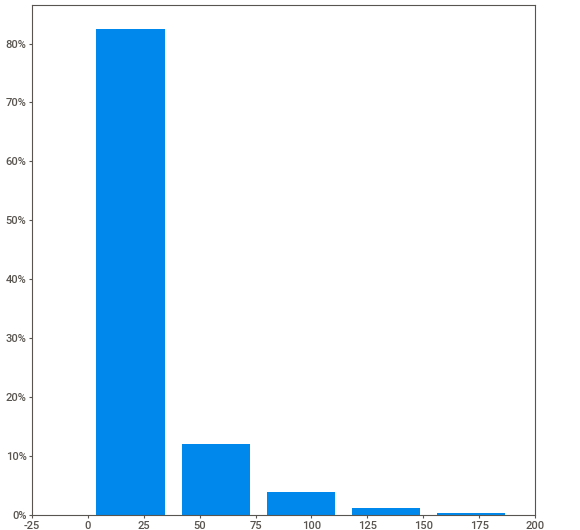
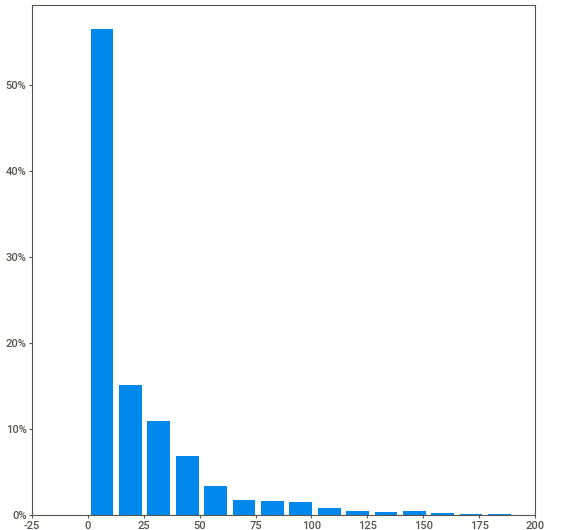
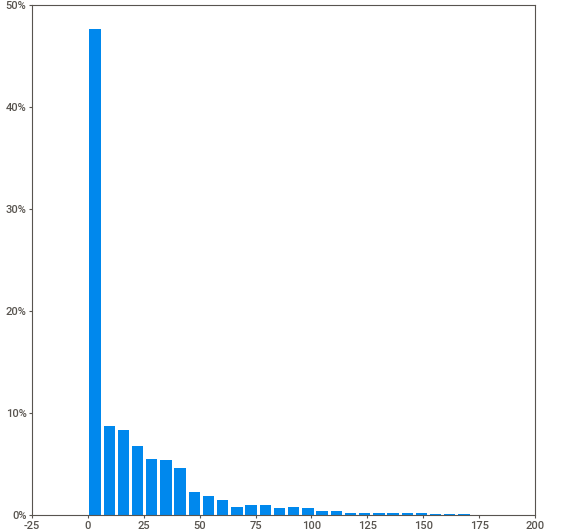
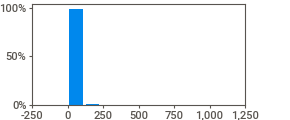
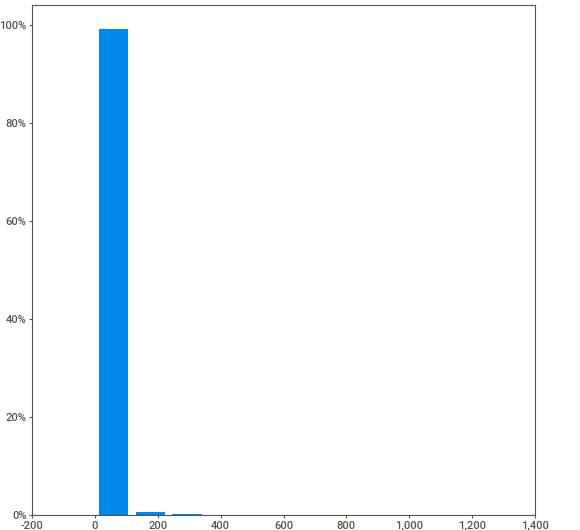
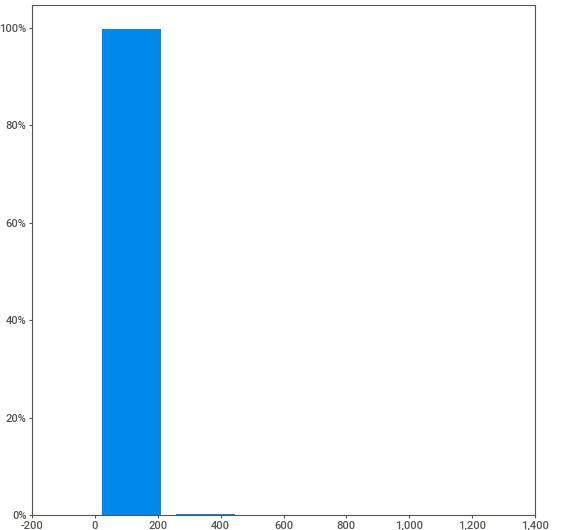
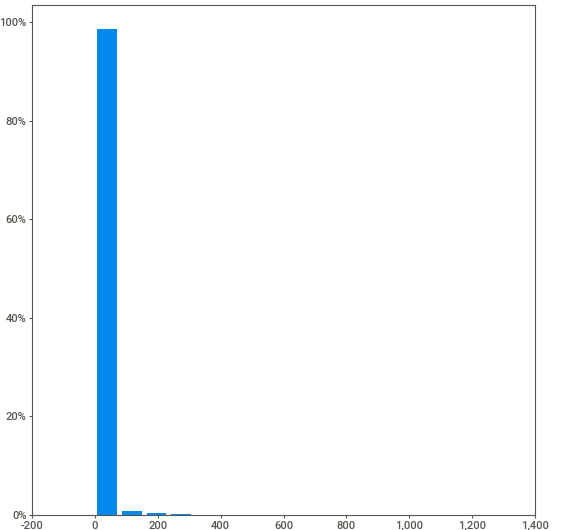
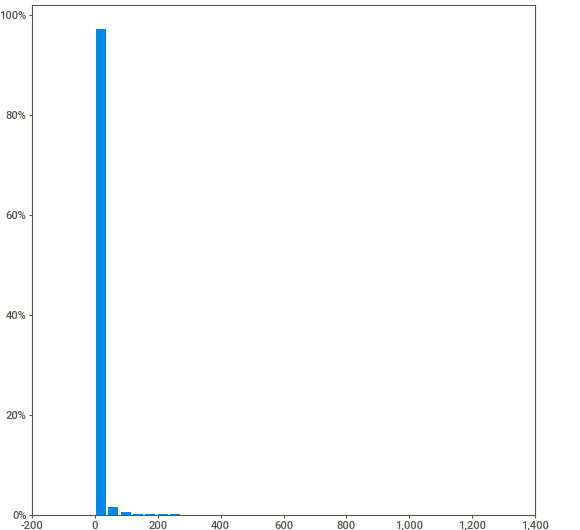
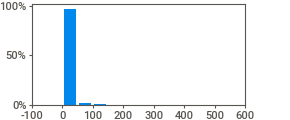
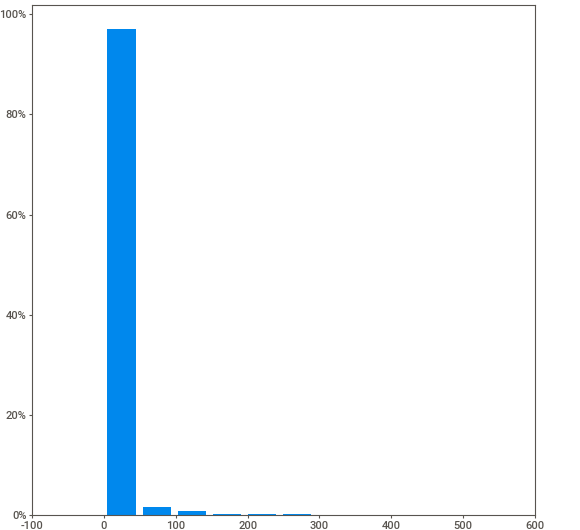
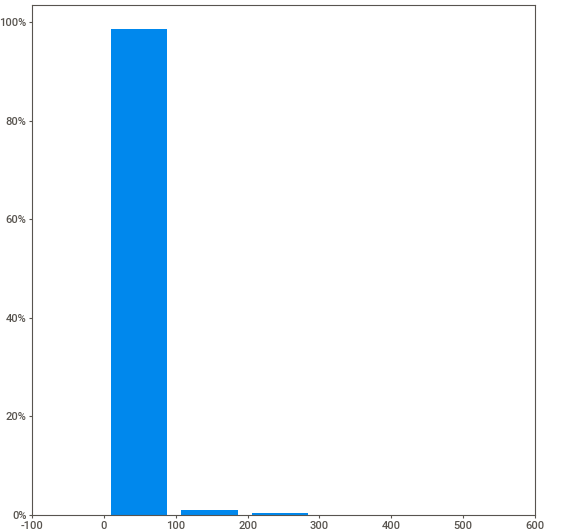
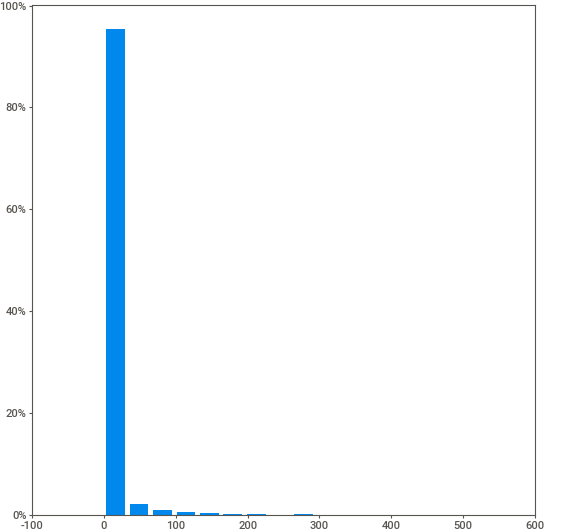
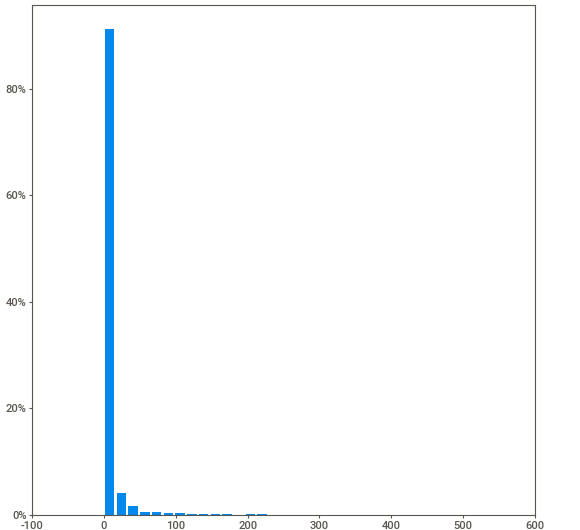
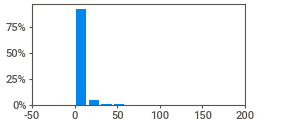
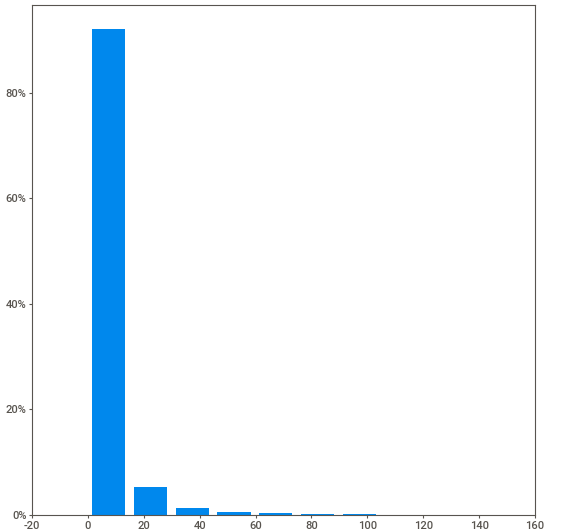
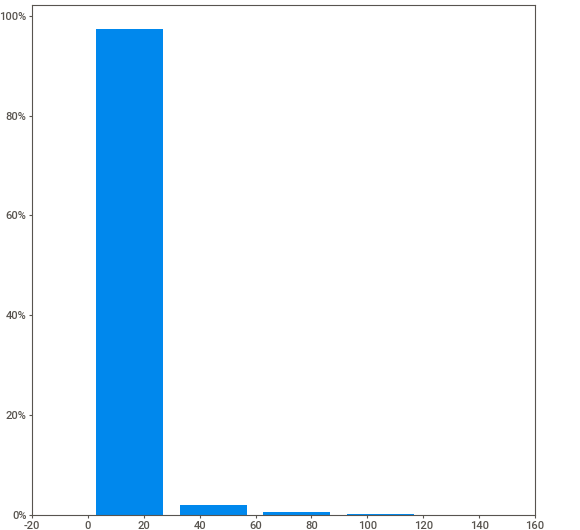
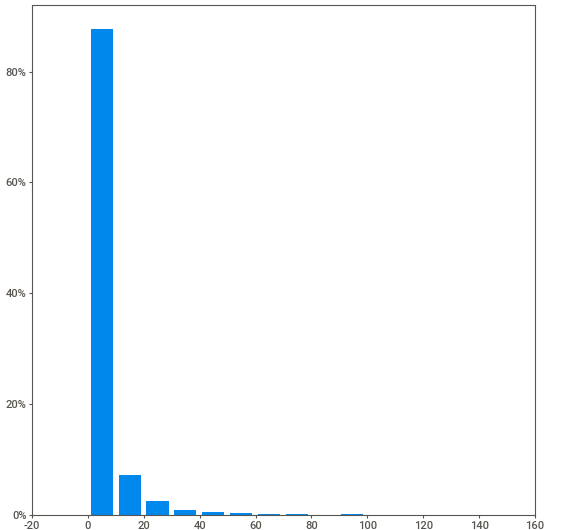
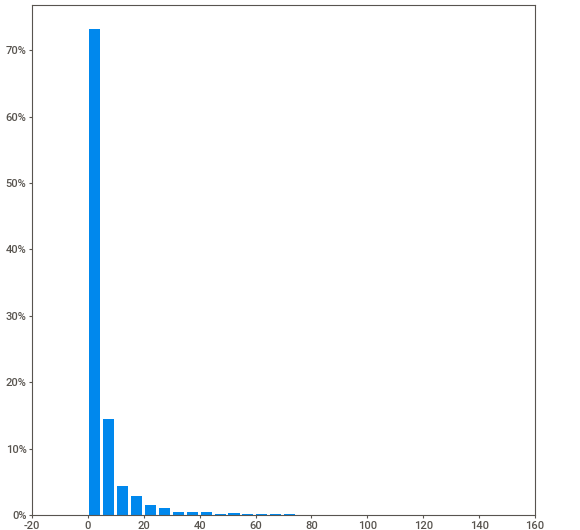
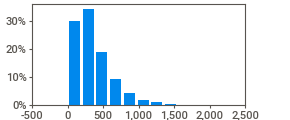
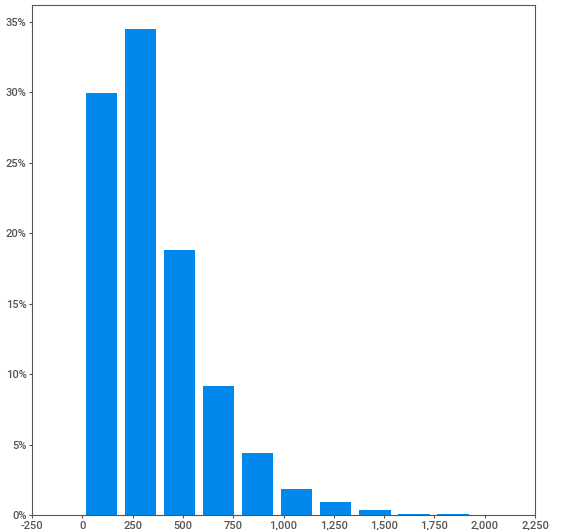
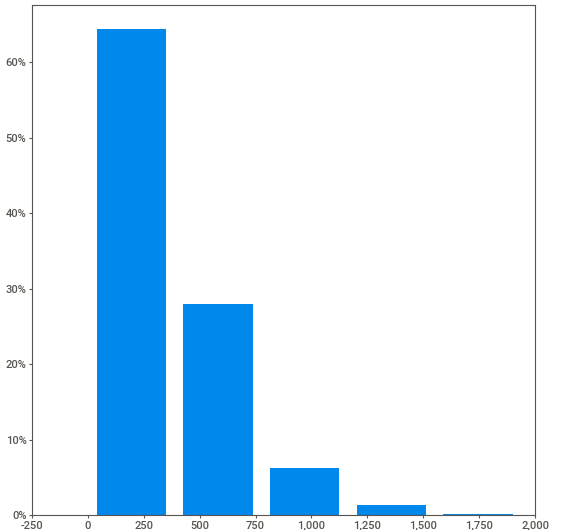
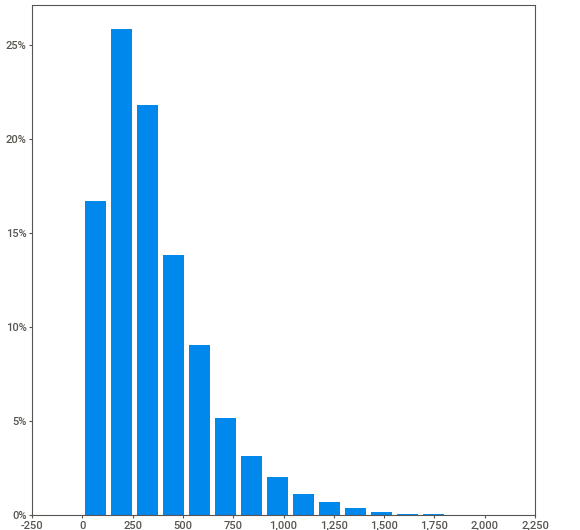
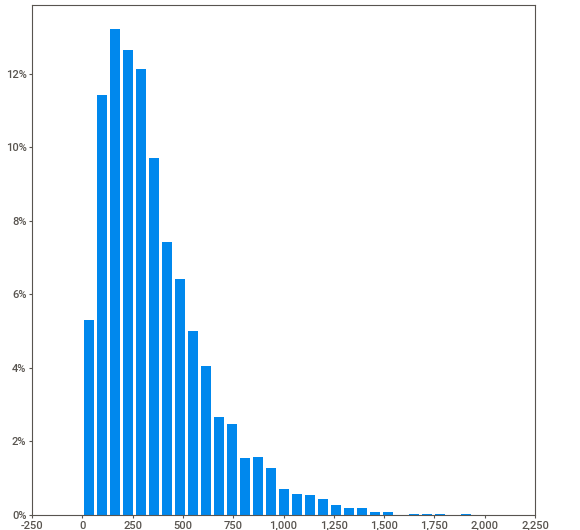
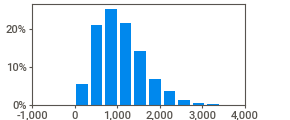
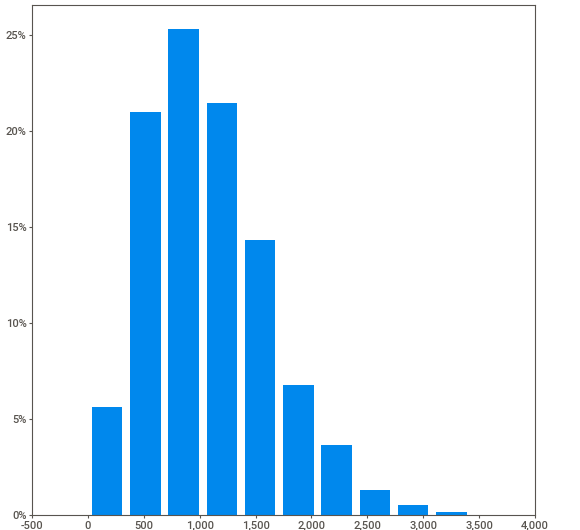
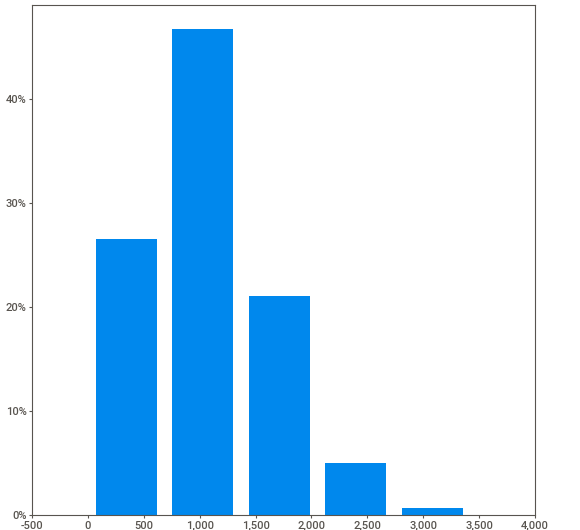
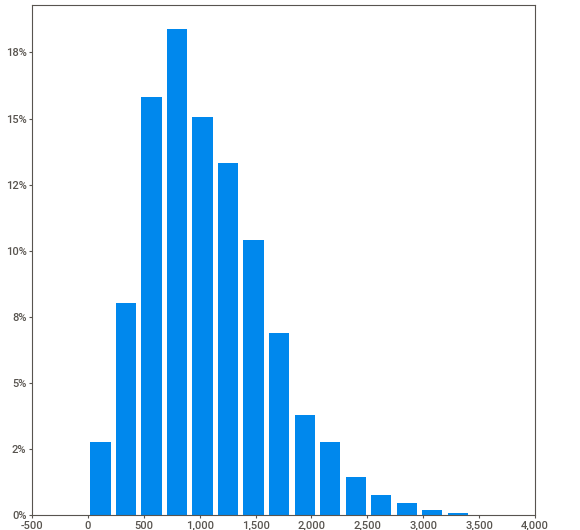
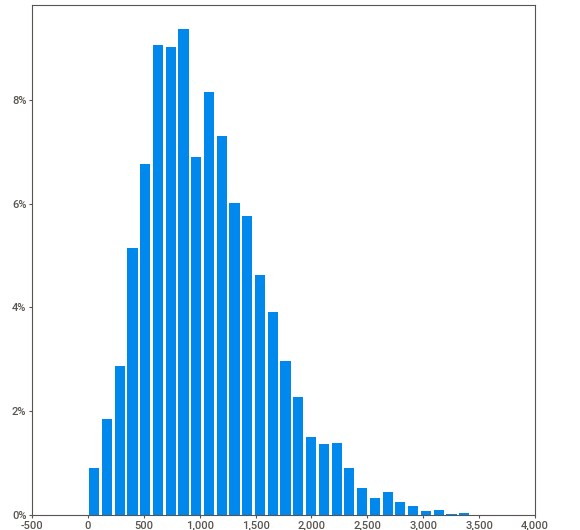
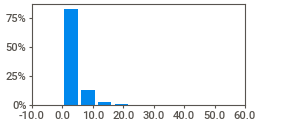
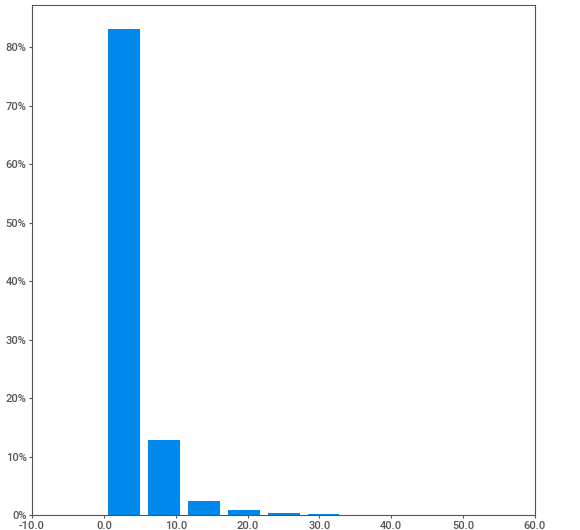
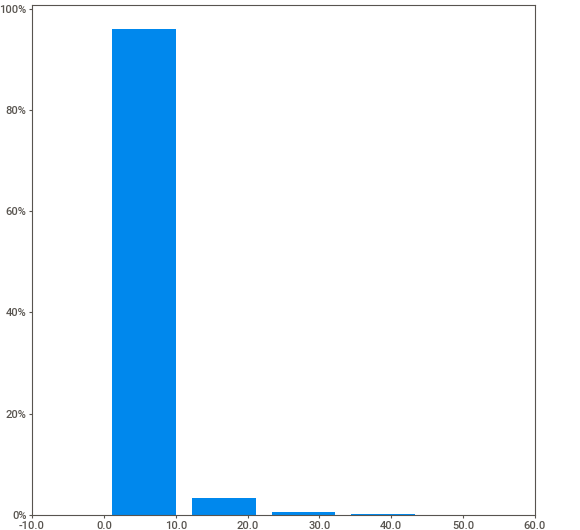
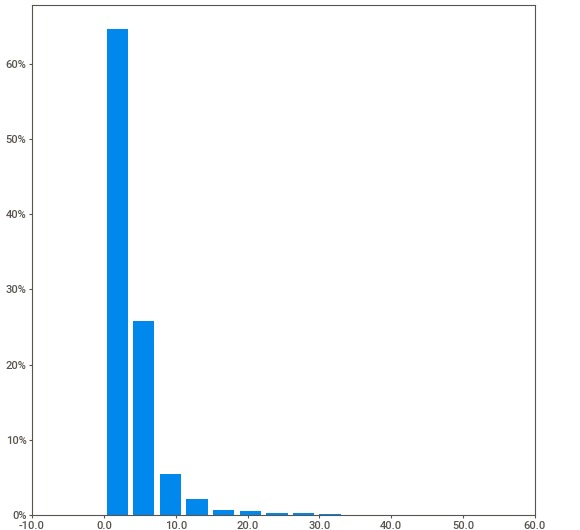
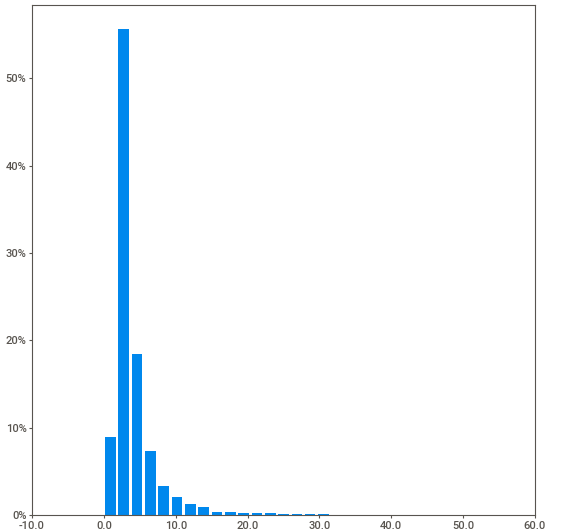
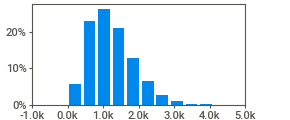
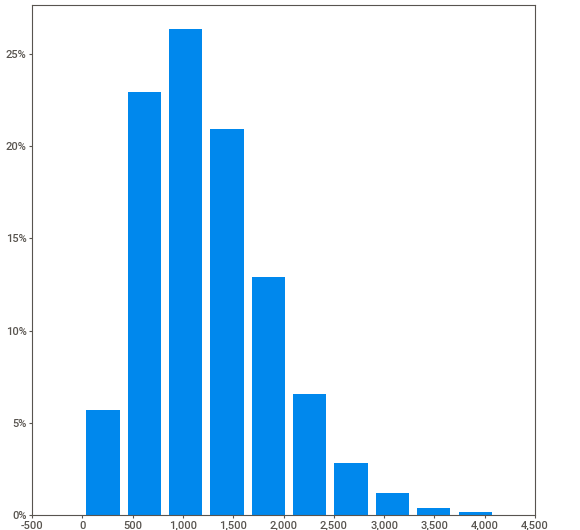
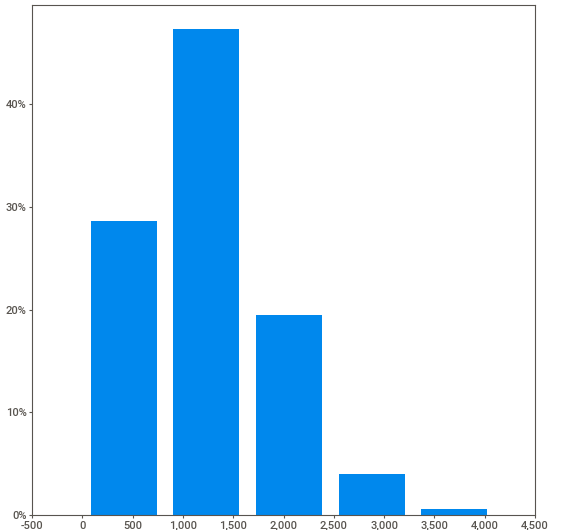
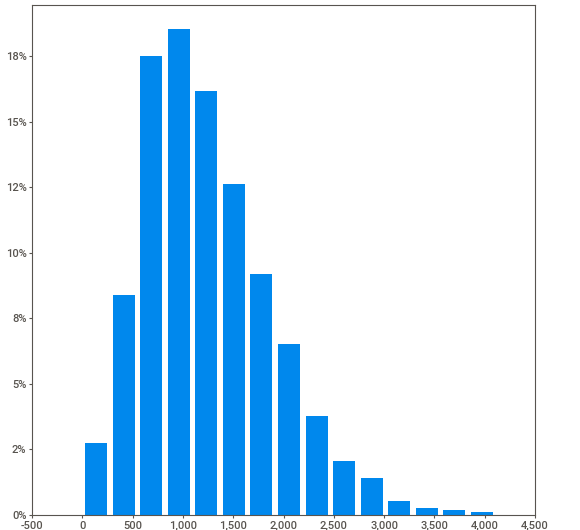
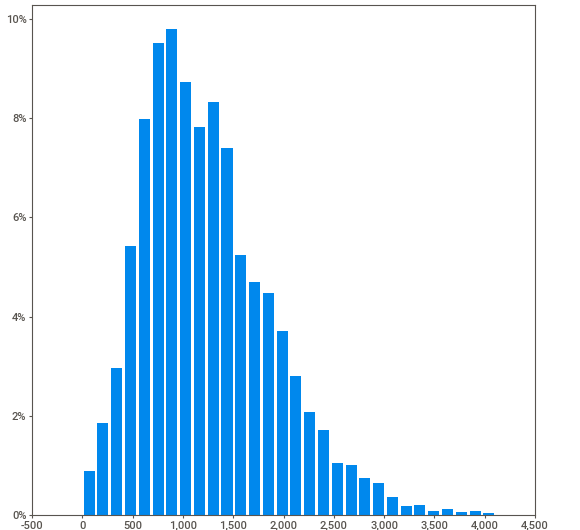
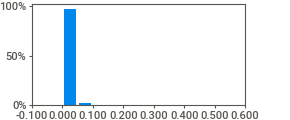
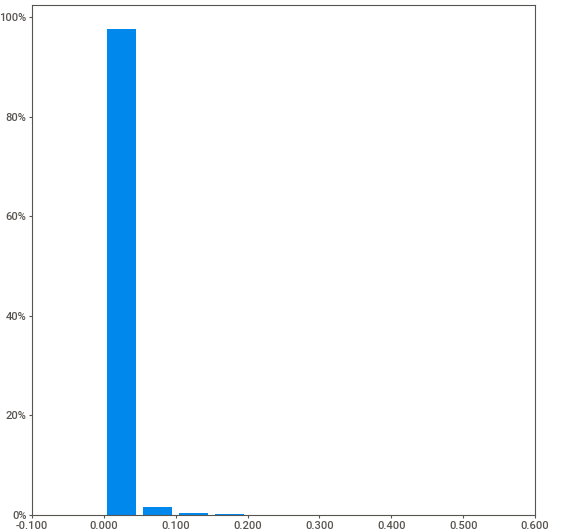
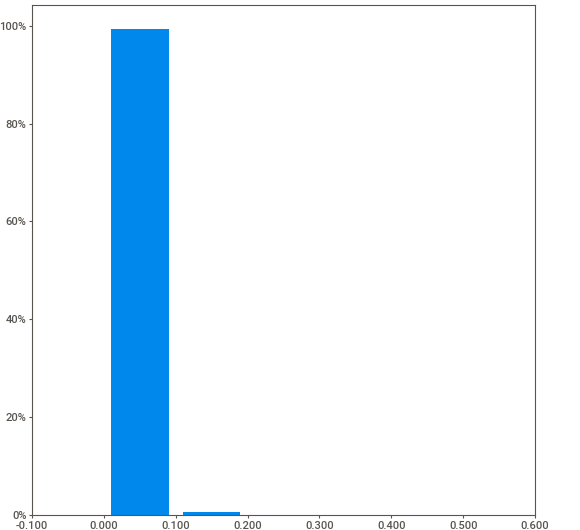
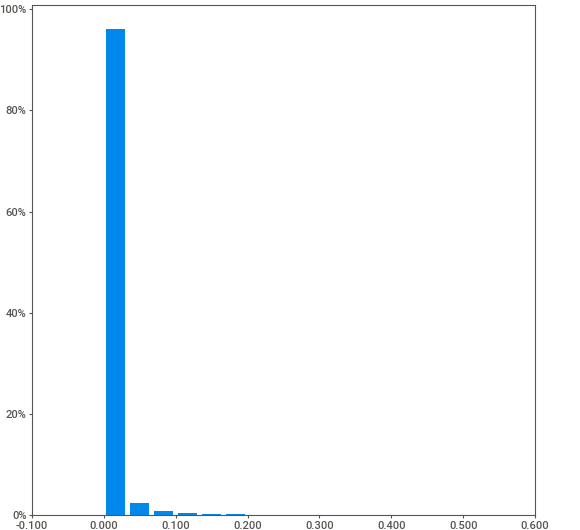
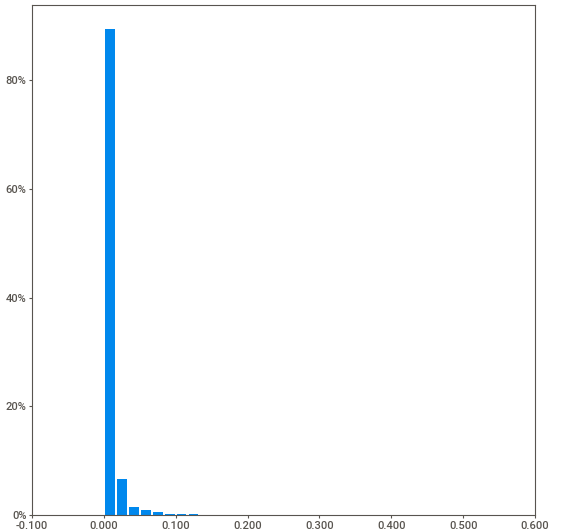
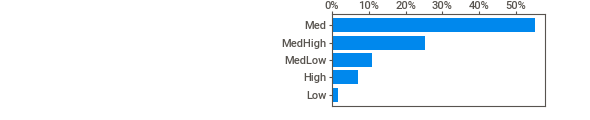
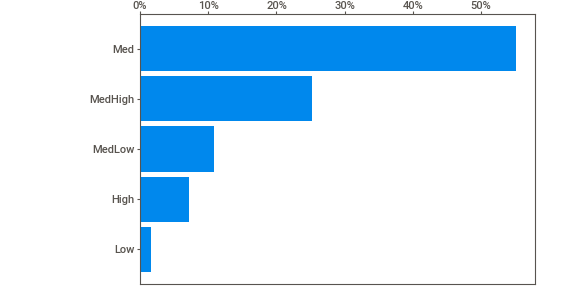
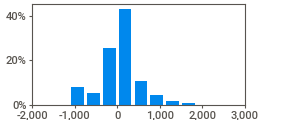
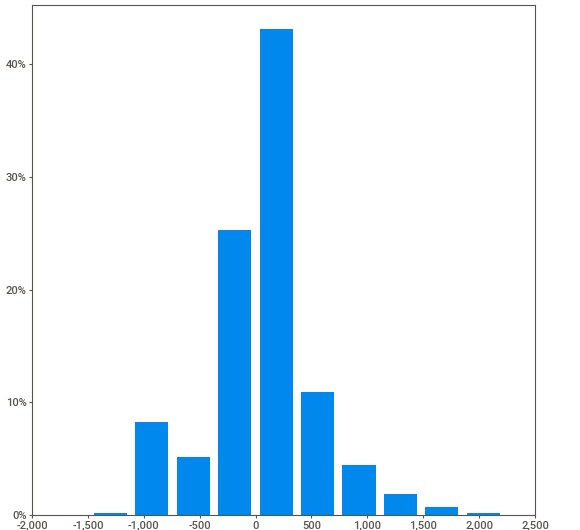
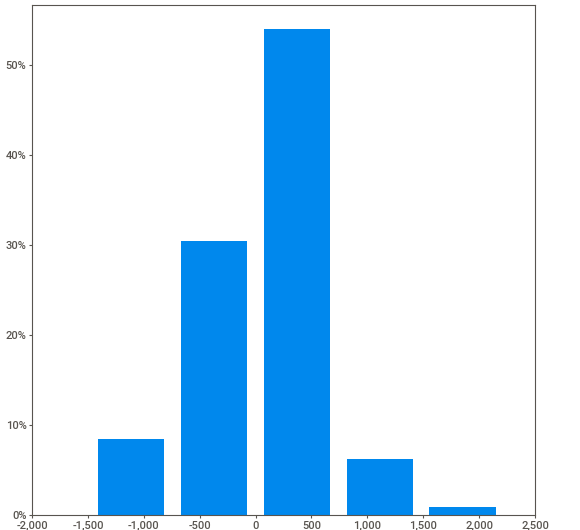
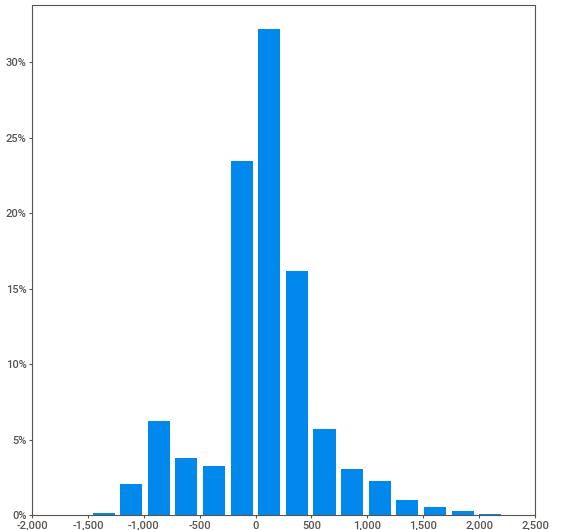
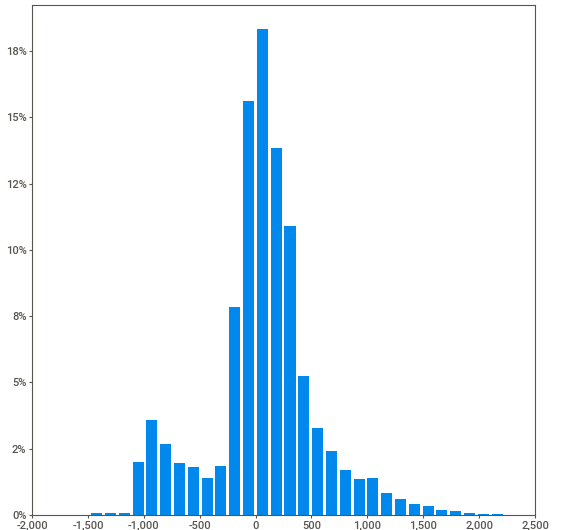
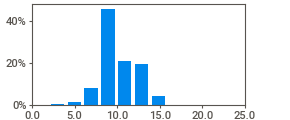
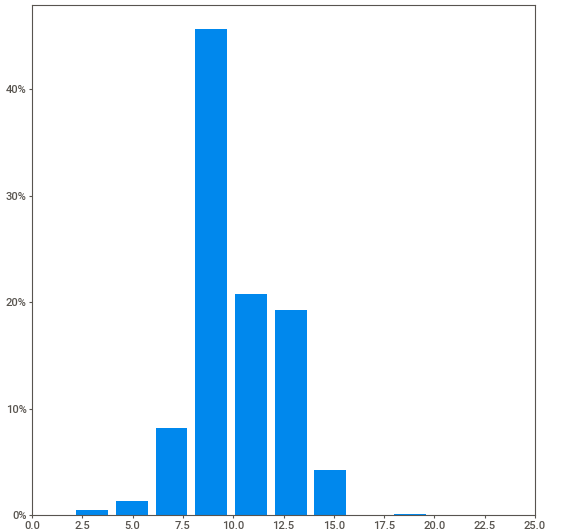
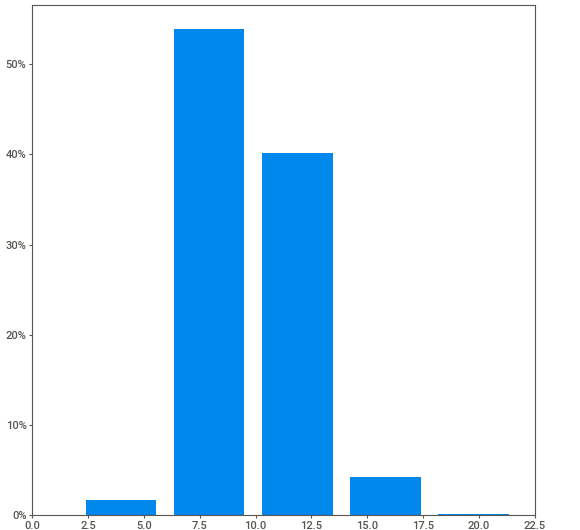
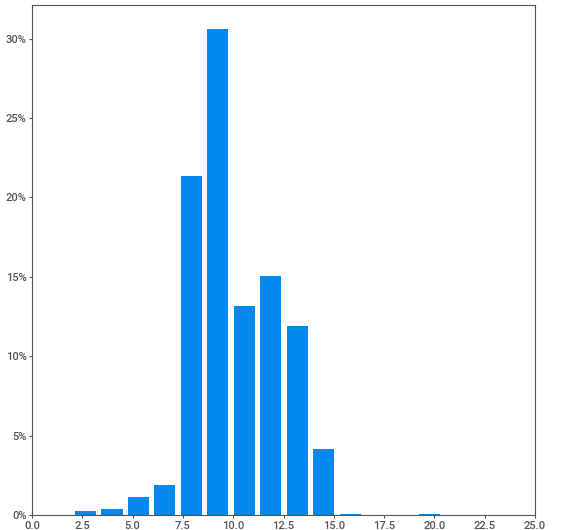
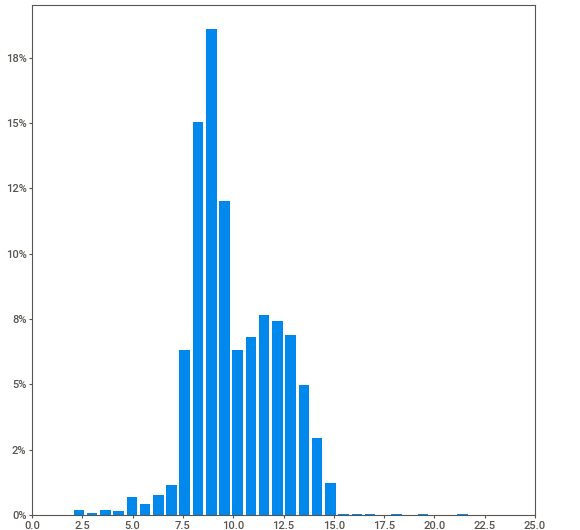
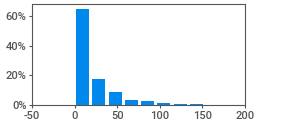
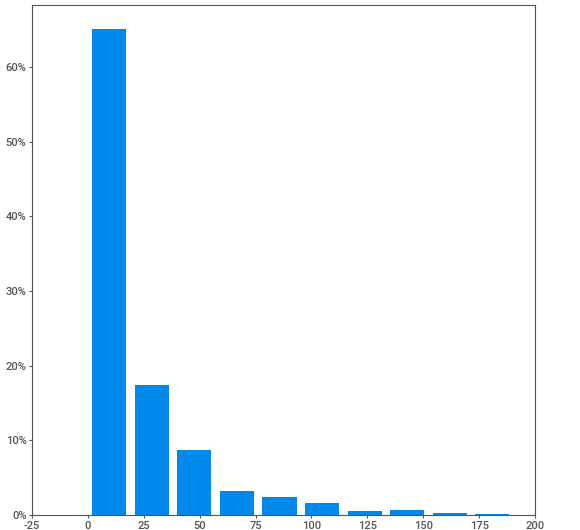
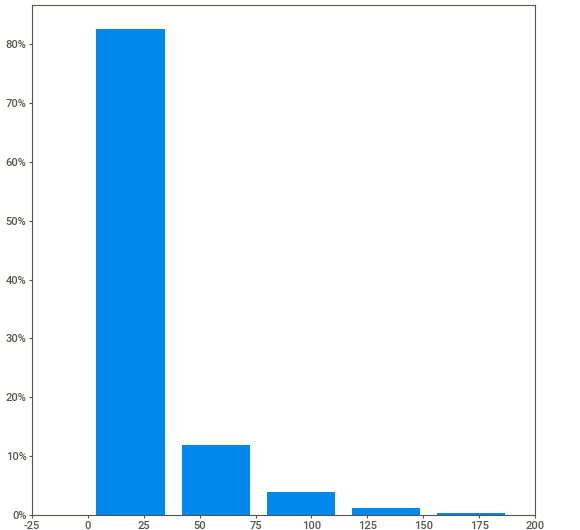
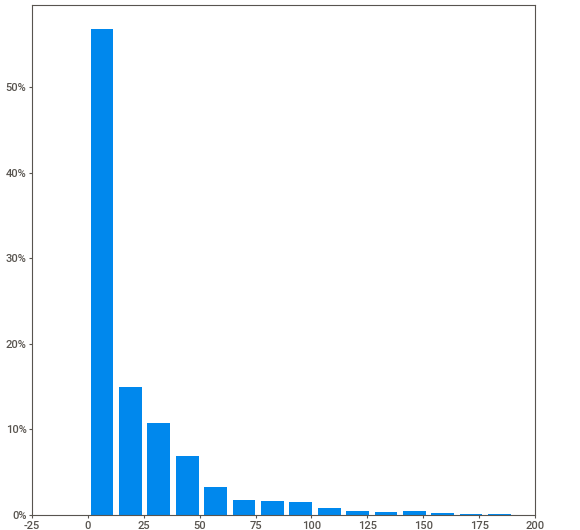
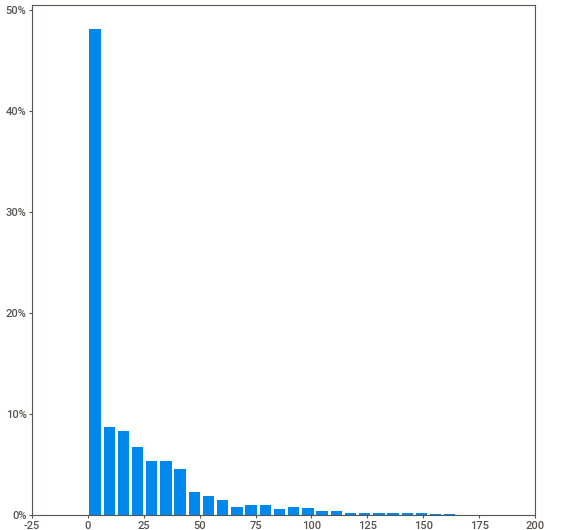
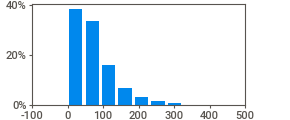
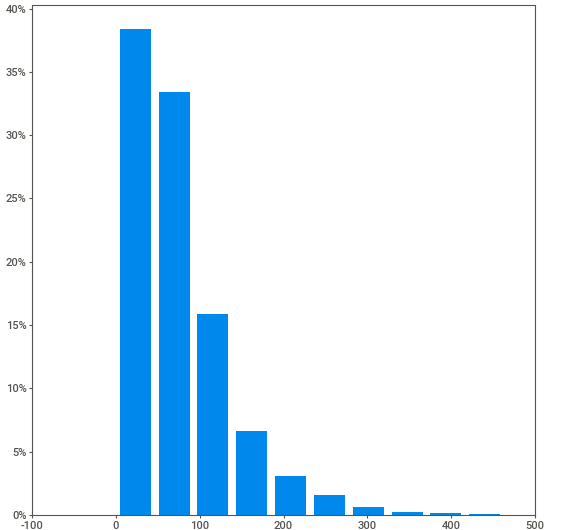
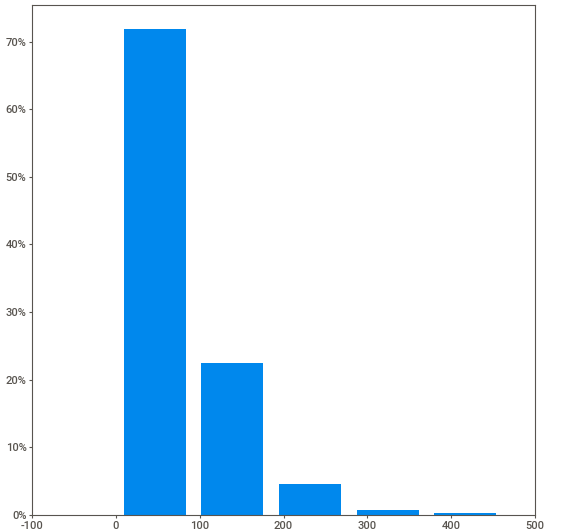
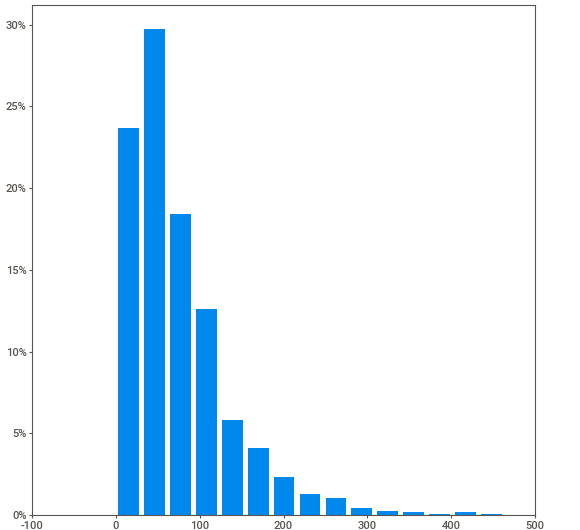
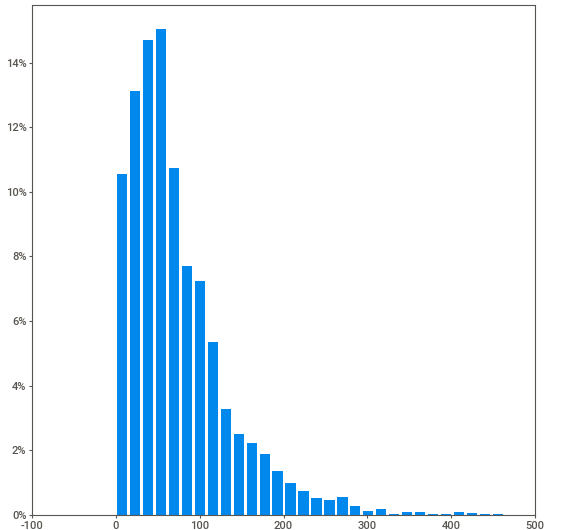
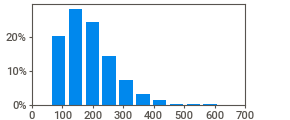
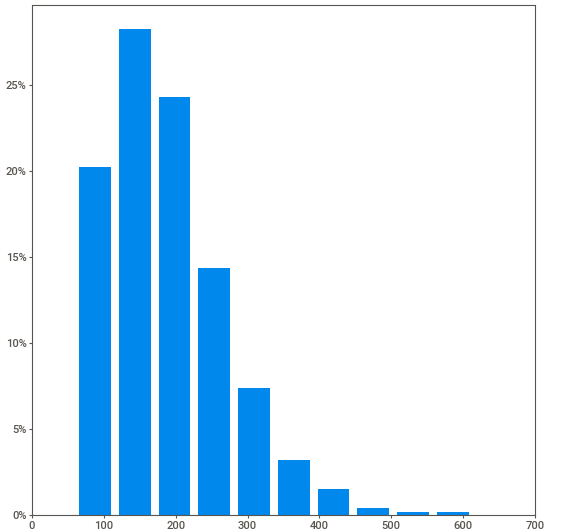
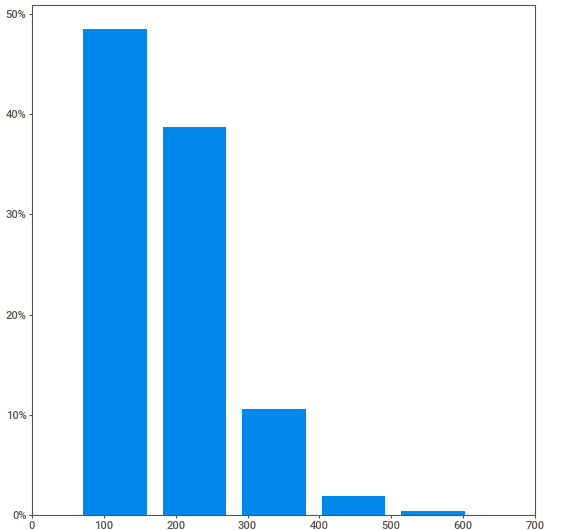
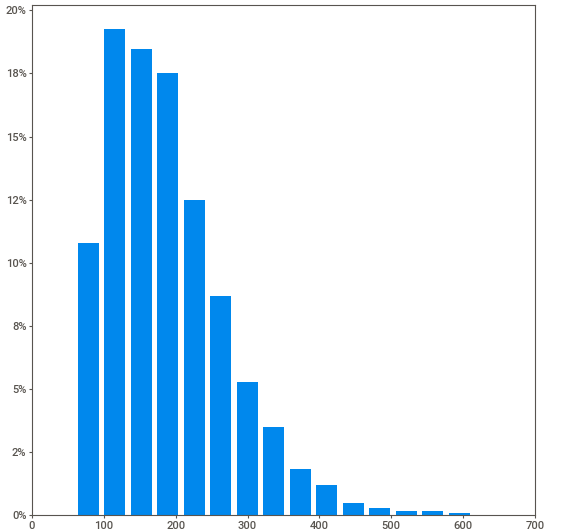
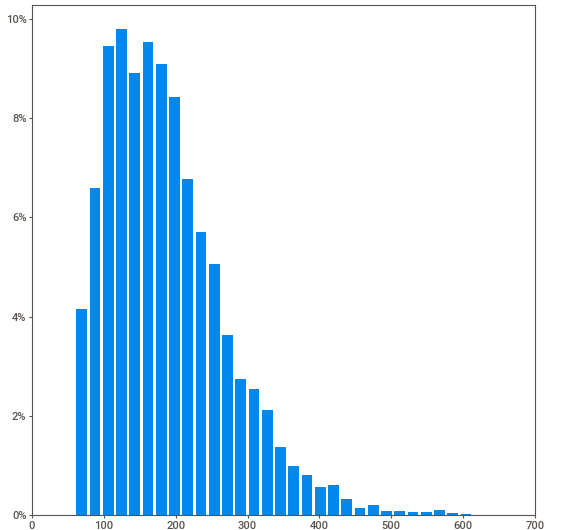
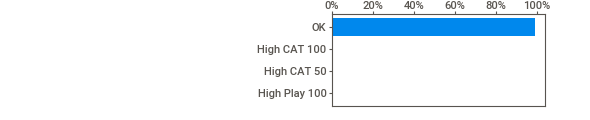
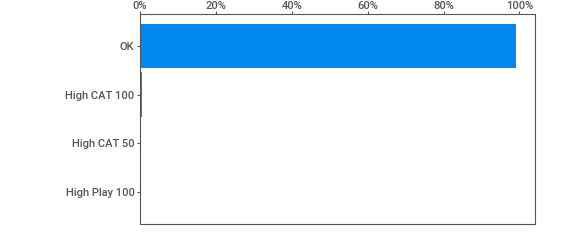
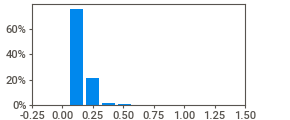
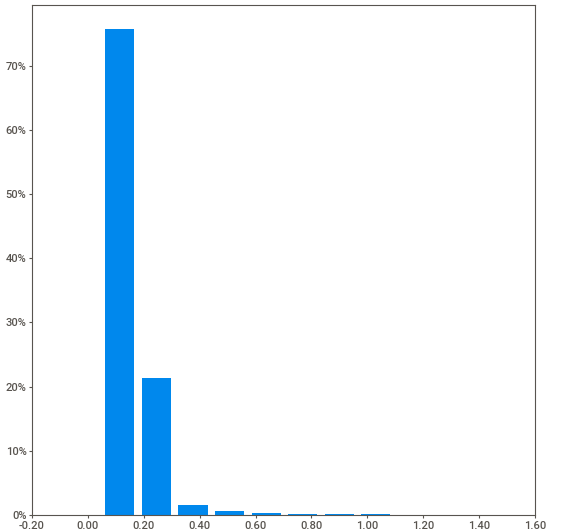
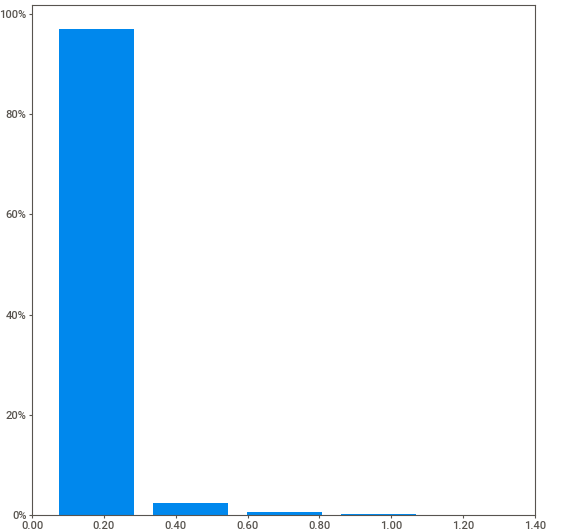
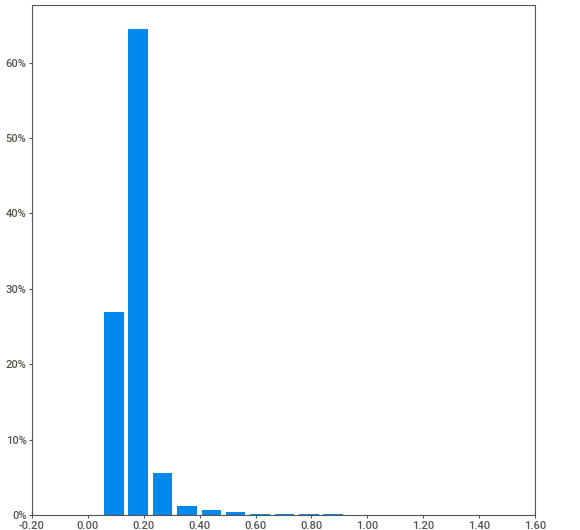
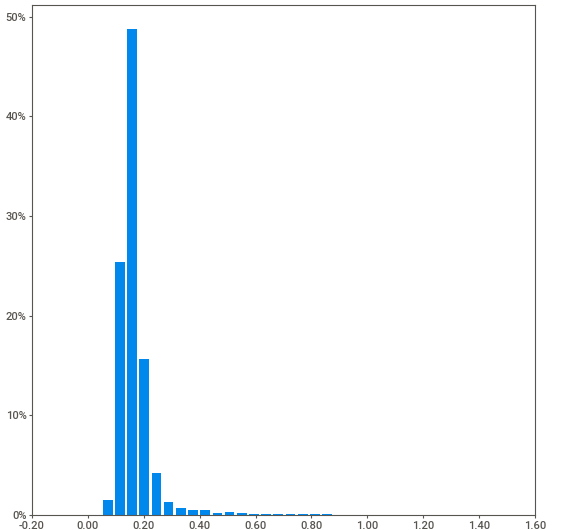
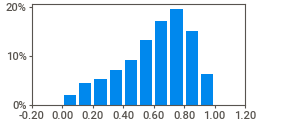
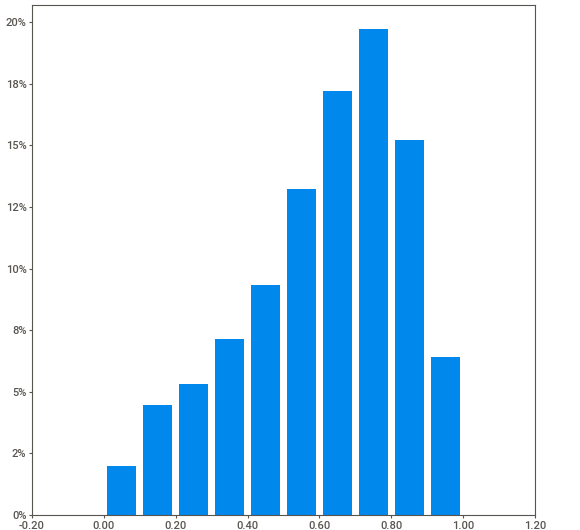
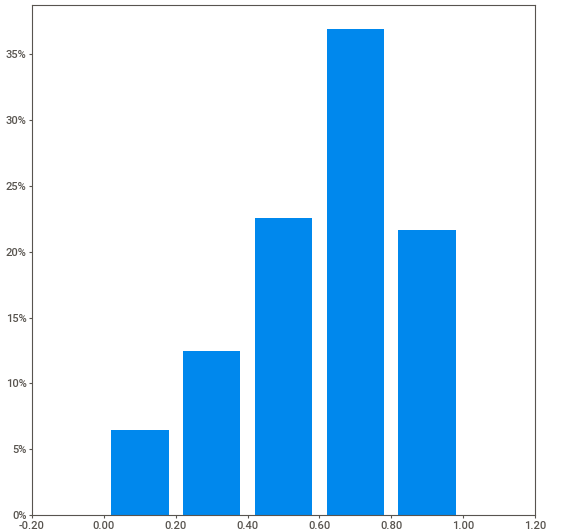
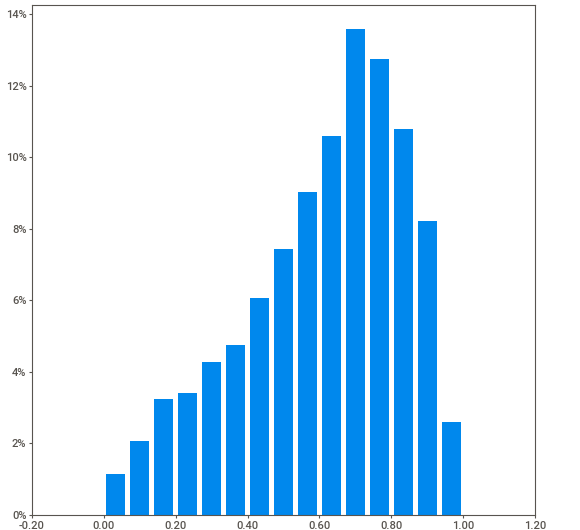
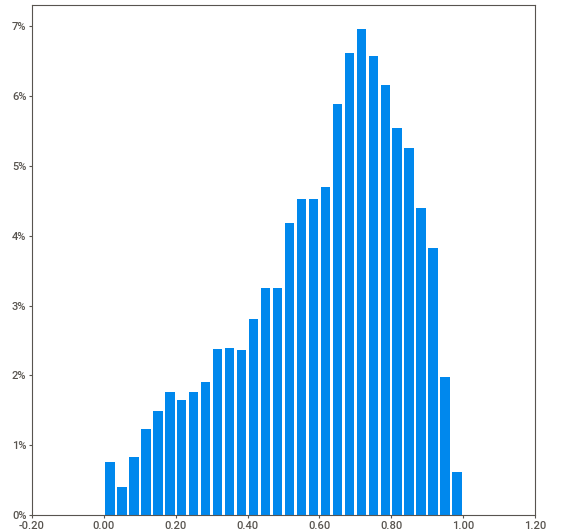
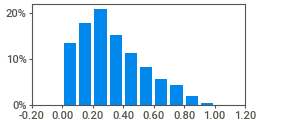
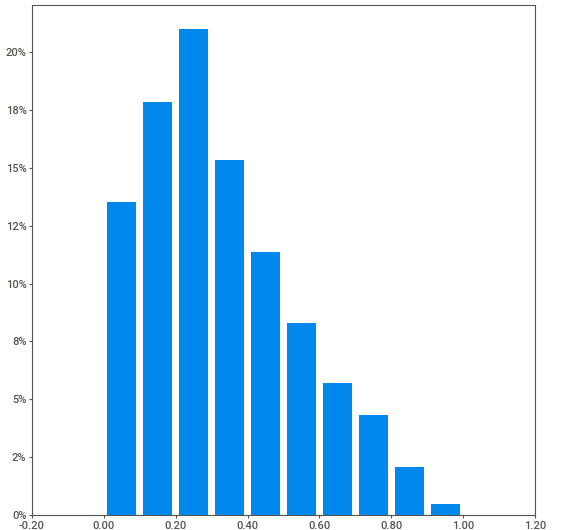
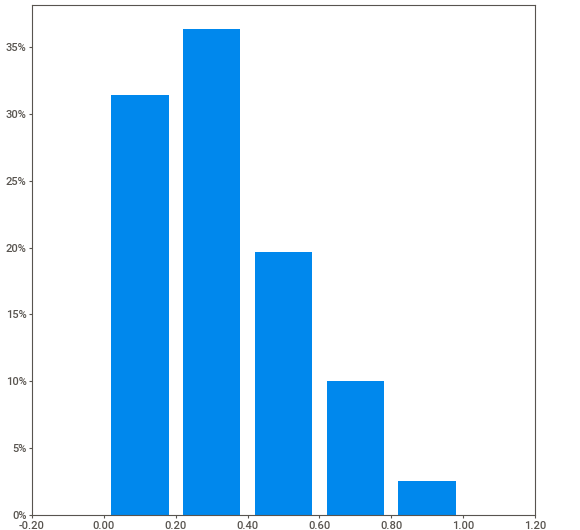
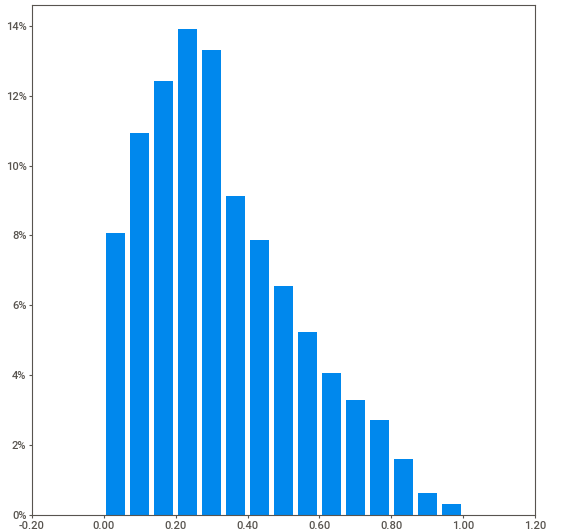
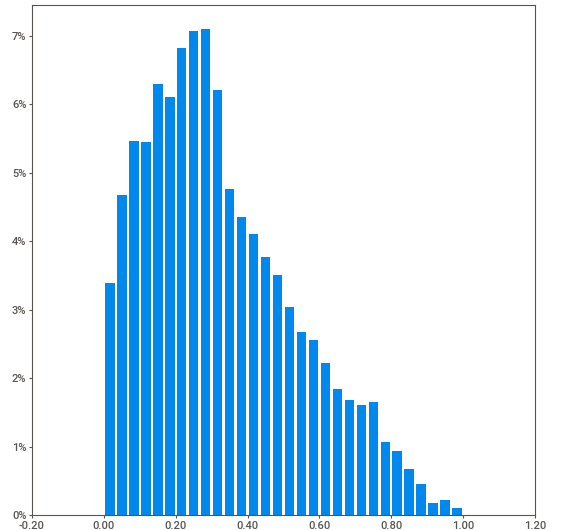
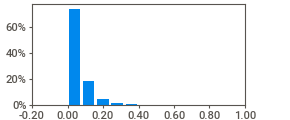
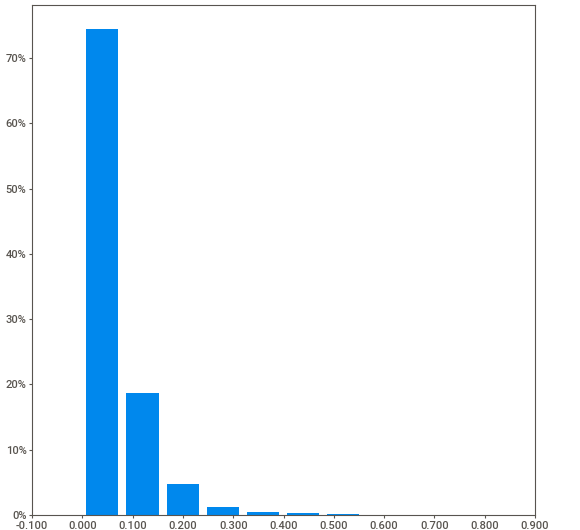
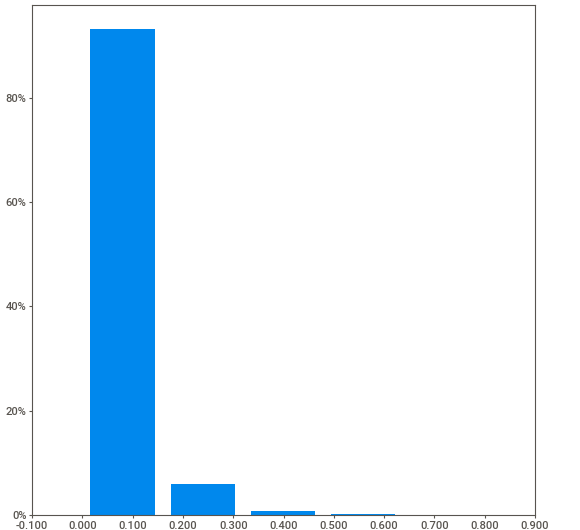
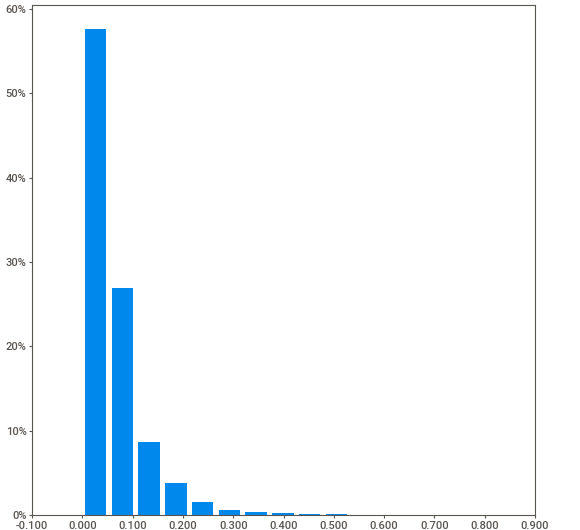
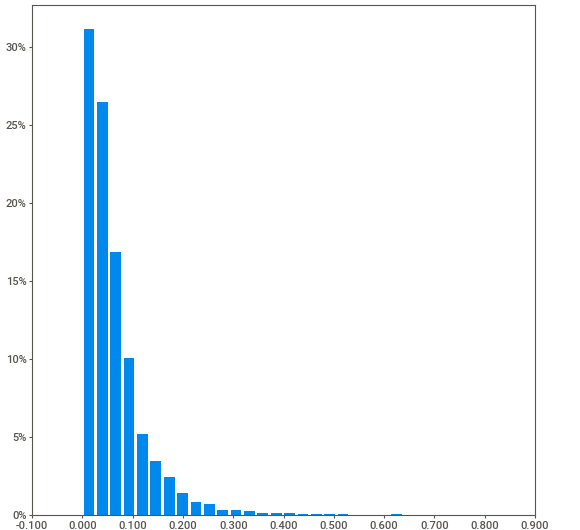
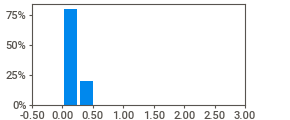
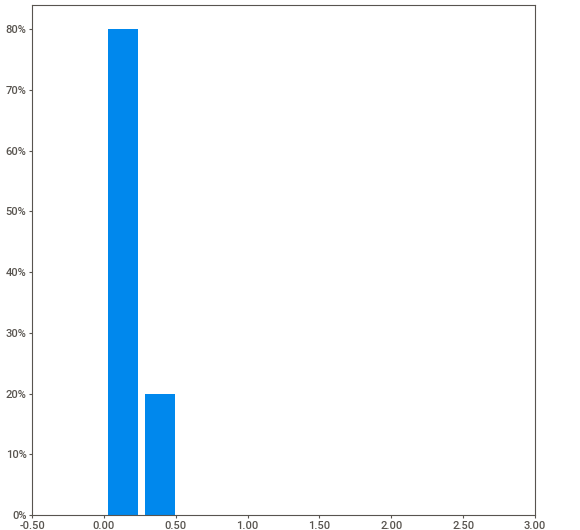
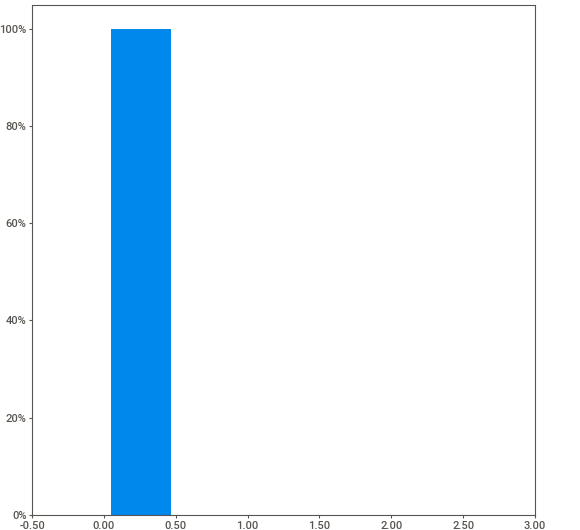
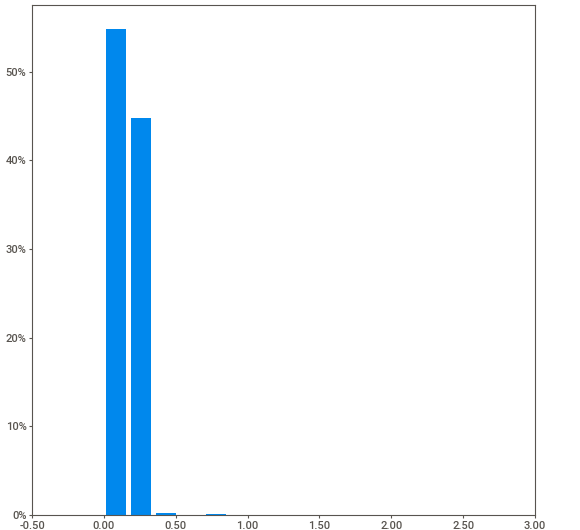
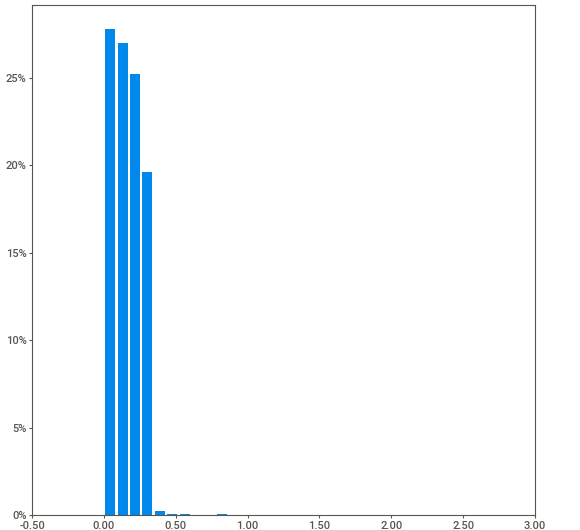
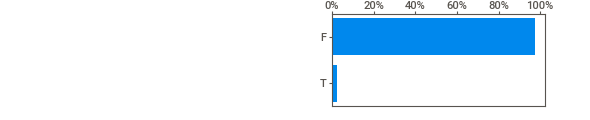
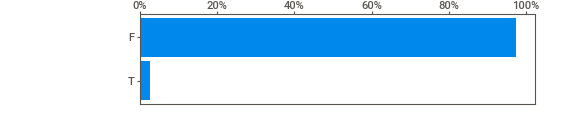
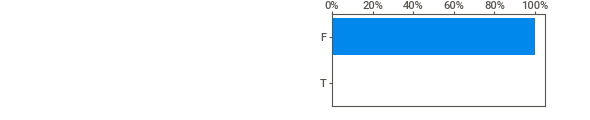
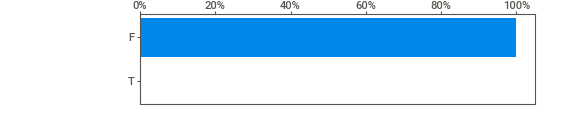
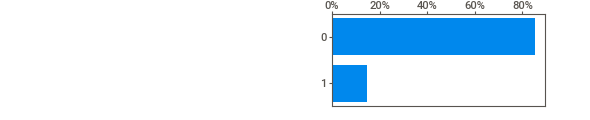
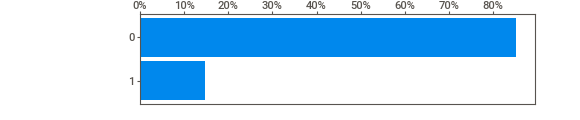
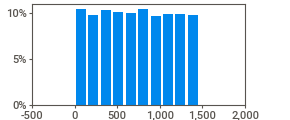
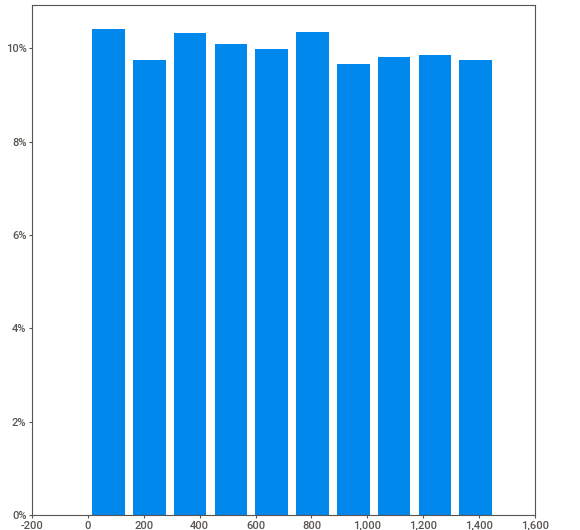
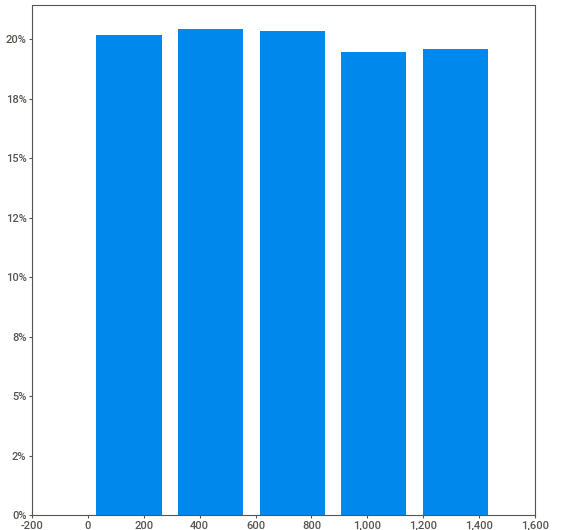
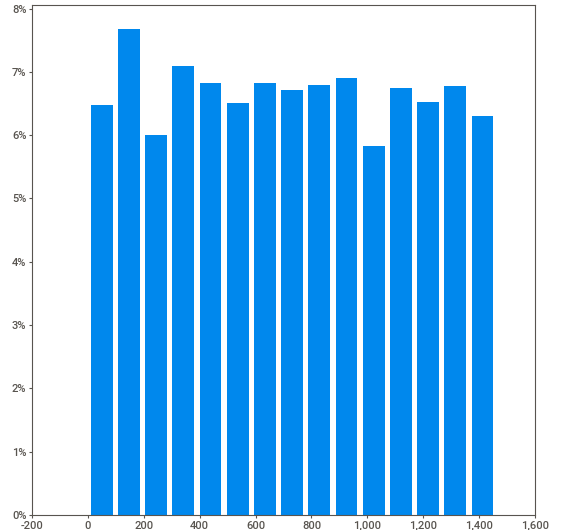
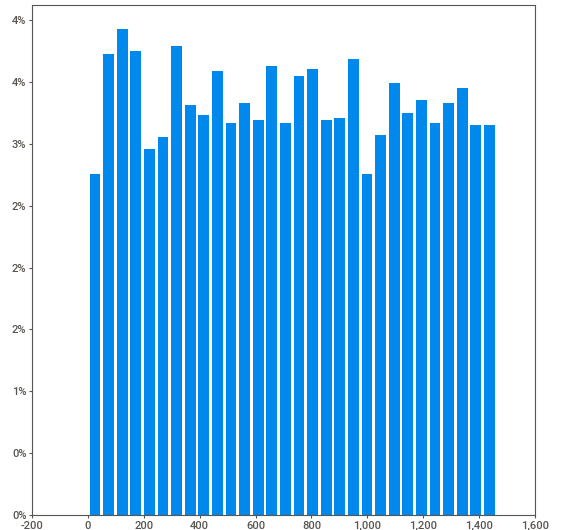
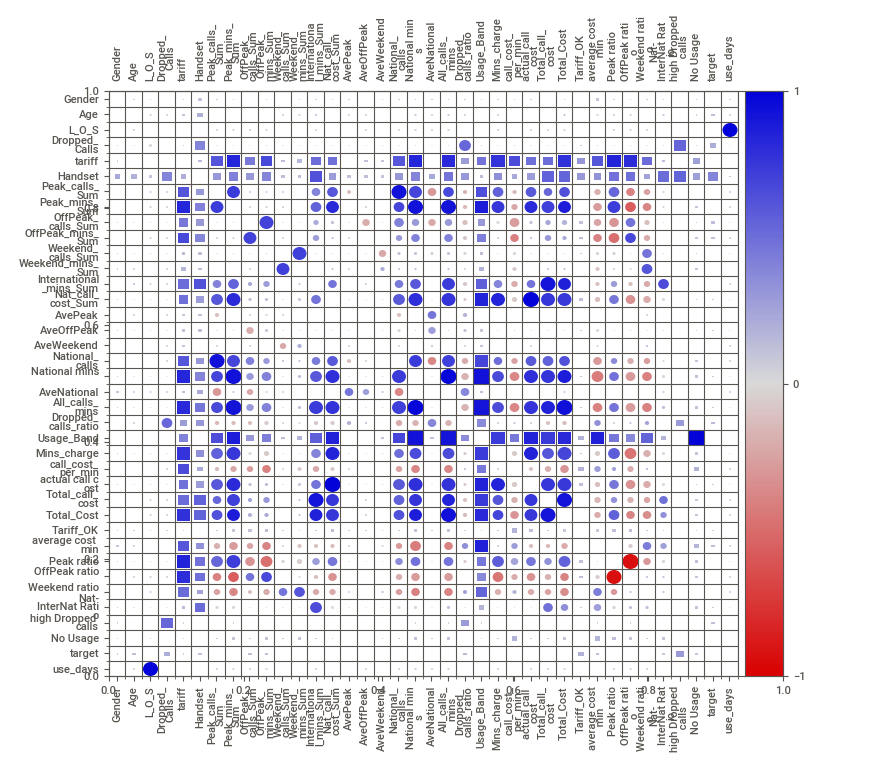
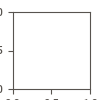

In [ ]:
report.show_notebook()

In [ ]:
# check categorical feature for the specific category
cate_features=df.drop(columns=['id']).select_dtypes(include=['object']).columns.tolist()
print(cate_features)
for feature in cate_features:
    cate=df[feature].unique()
    print(f"{feature}: {cate}")




['Gender', 'tariff', 'Handset', 'Usage_Band', 'Tariff_OK', 'high Dropped calls', 'No Usage']
Gender: ['F' 'M']
tariff: ['CAT 100' 'CAT 200' 'Play 100' 'Play 300' 'CAT 50']
Handset: ['BS110' 'ASAD90' 'S50' 'WC95' 'BS210' 'ASAD170' 'S80' 'CAS60' 'SOP20'
 'CAS30' 'SOP10']
Usage_Band: ['Med' 'MedHigh' 'High' 'MedLow' 'Low' nan]
Tariff_OK: ['OK' 'High CAT 100' 'High CAT 50' 'High Play 100']
high Dropped calls: ['F' 'T']
No Usage: ['F' 'T']


In [ ]:
# numerical features
nume_features=df.drop(columns=['id']).select_dtypes(include=['int','float']).columns.tolist()
print(nume_features)


['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls', 'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio', 'Mins_charge', 'call_cost_per_min', 'actual call cost', 'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio', 'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio', 'target', 'use_days']


In [ ]:
# split feature and labels and train and test data
X = df.drop(columns=['target','id'])
y = df['target']



preprocess the data

In [ ]:
#encoding binary features
mapping_bi = {'M': 1, 'F': 0, 'T': 1, 'F': 0}
bi_features=['Gender','high Dropped calls','No Usage']
X[bi_features] = X[bi_features].replace(mapping_bi)
print(X)


      Gender   Age Connect_Date      L_O_S  Dropped_Calls    tariff  Handset  \
1862       0  32.0   1999-12-31   9.533333            1.0   CAT 100    BS110   
4137       1  20.0   1999-12-28   9.633333            3.0   CAT 200   ASAD90   
1409       0  38.0   1999-12-28   9.633333            1.0   CAT 200      S50   
2261       0  27.0   1999-12-28   9.633333            2.0  Play 100    BS110   
676        0  40.0   1999-12-28   9.633333            0.0   CAT 200     WC95   
...      ...   ...          ...        ...            ...       ...      ...   
1705       0  58.0   1996-01-02  58.166667            0.0   CAT 200      S80   
1201       0  19.0   1996-01-02  58.166667            7.0   CAT 100  ASAD170   
4941       1  28.0   1996-01-01  58.200000            0.0   CAT 200    BS110   
1131       0  21.0   1996-01-01  58.200000            3.0   CAT 200  ASAD170   
1207       1  28.0   1996-01-01  58.200000            2.0    CAT 50    BS110   

      Peak_calls_Sum  Peak_mins_Sum  Of

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_55513/2672132356.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[bi_features] = X[bi_features].replace(mapping_bi)


In [ ]:
#encoding one-hot features
oh_features=['tariff','Handset']
X[oh_features]=X[oh_features].astype('category')
X = pd.get_dummies(X, columns=oh_features,drop_first=True,dtype='int')

#reference group "Play 100","BS210"


In [ ]:
print(X.iloc[:,-15:])

      use_days  tariff_CAT 200  tariff_CAT 50  tariff_Play 100  \
1862         1               0              0                0   
4137         4               1              0                0   
1409         4               1              0                0   
2261         4               0              0                1   
676          4               1              0                0   
...        ...             ...            ...              ...   
1705      1460               1              0                0   
1201      1460               0              0                0   
4941      1461               1              0                0   
1131      1461               1              0                0   
1207      1461               0              1                0   

      tariff_Play 300  Handset_ASAD90  Handset_BS110  Handset_BS210  \
1862                0               0              1              0   
4137                0               1              0             

In [ ]:
# encoding the ordinal features-first integer
Mapping_ub={'Med': 3, 'MedLow': 2, 'MedHigh': 4, 'High': 5,'Low':1}
X['Usage_Band']=X['Usage_Band'].replace(Mapping_ub)

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_55513/735085468.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Usage_Band']=X['Usage_Band'].replace(Mapping_ub)


(array([  84.,    0.,  547.,    0.,    0., 2779.,    0., 1270.,    0.,
         360.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

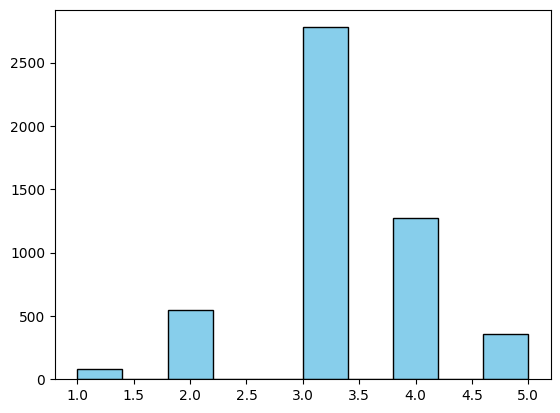

In [ ]:
plt.hist(X['Usage_Band'], bins=10, color='skyblue', edgecolor='black')

In [ ]:
# encode it as the percentile ranking
ub_ran=X['Usage_Band'].value_counts(normalize=True)*100
X['Usage_Band_perank']=X['Usage_Band'].map(ub_ran)

# encoding the categorical as 0-high and 1-ok for the tariff_ok
X['Tariff_OK'] = X['Tariff_OK'].replace('OK',1)\
                                           .replace(['High CAT 100', 'High CAT 50', 'High Play 100'],0)

/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_55513/1224531882.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Tariff_OK'] = X['Tariff_OK'].replace('OK',1)\


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.head(10))

      Gender   Age Connect_Date      L_O_S  Dropped_Calls  Peak_calls_Sum  \
158        1  32.0   1999-08-22  13.900000            2.0           166.0   
3828       1  20.0   1998-02-23  32.066667           11.0            46.0   
1996       1  15.0   1999-01-09  21.400000            1.0           401.0   
1180       0  26.0   1998-04-24  30.066667            0.0            34.0   
4384       0  64.0   1999-07-23  14.900000            2.0           296.0   
366        1  43.0   1998-04-07  30.633333            1.0            24.0   
2371       1  36.0   1998-12-12  22.333333            1.0           382.0   
2404       0  38.0   1999-07-15  15.166667            0.0           118.0   
4623       0  52.0   1999-08-26  13.766667            2.0             8.0   
4567       1  59.0   1997-04-02  42.966667           11.0           198.0   

      Peak_mins_Sum  OffPeak_calls_Sum  OffPeak_mins_Sum  Weekend_calls_Sum  \
158      768.599999               44.0        295.500000               24

In [ ]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4035 entries, 158 to 1079
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Gender                  4035 non-null   int64         
 1   Age                     4035 non-null   float64       
 2   Connect_Date            4035 non-null   datetime64[ns]
 3   L_O_S                   4035 non-null   float64       
 4   Dropped_Calls           4035 non-null   float64       
 5   Peak_calls_Sum          4035 non-null   float64       
 6   Peak_mins_Sum           4035 non-null   float64       
 7   OffPeak_calls_Sum       4035 non-null   float64       
 8   OffPeak_mins_Sum        4035 non-null   float64       
 9   Weekend_calls_Sum       4035 non-null   float64       
 10  Weekend_mins_Sum        4035 non-null   float64       
 11  International_mins_Sum  4035 non-null   float64       
 12  Nat_call_cost_Sum       4035 non-null   float64    

In [ ]:
# for the numerical features
len(nume_features)
nume_features.remove('target')
print(nume_features)

['Age', 'L_O_S', 'Dropped_Calls', 'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum', 'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak', 'AveWeekend', 'National_calls', 'National mins', 'AveNational', 'All_calls_mins', 'Dropped_calls_ratio', 'Mins_charge', 'call_cost_per_min', 'actual call cost', 'Total_call_cost', 'Total_Cost', 'average cost min', 'Peak ratio', 'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio', 'use_days']


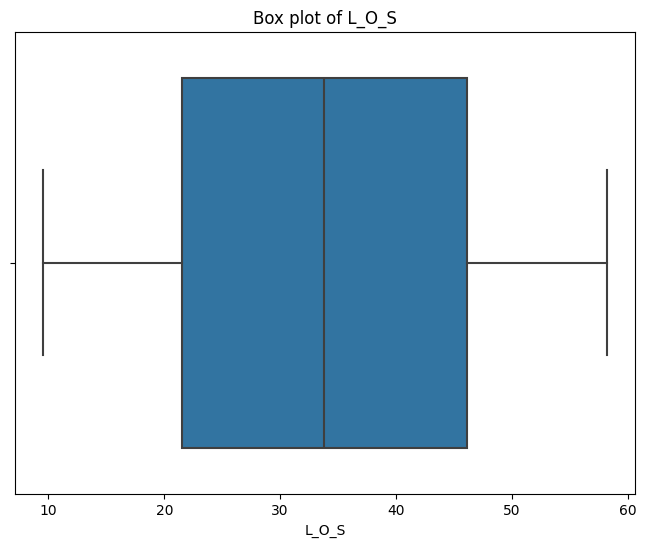

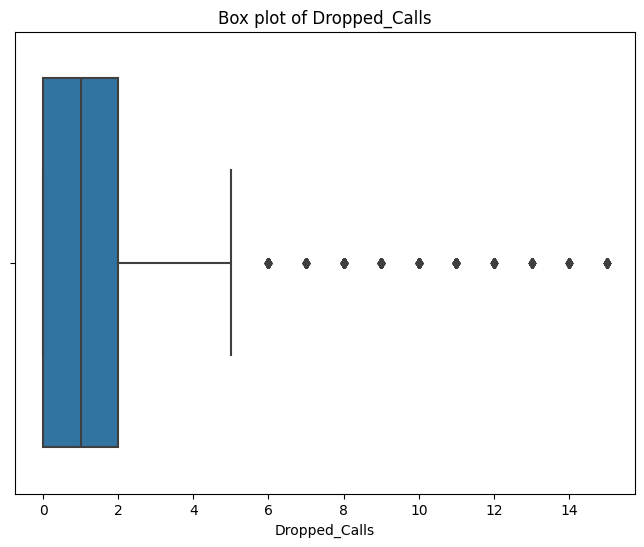

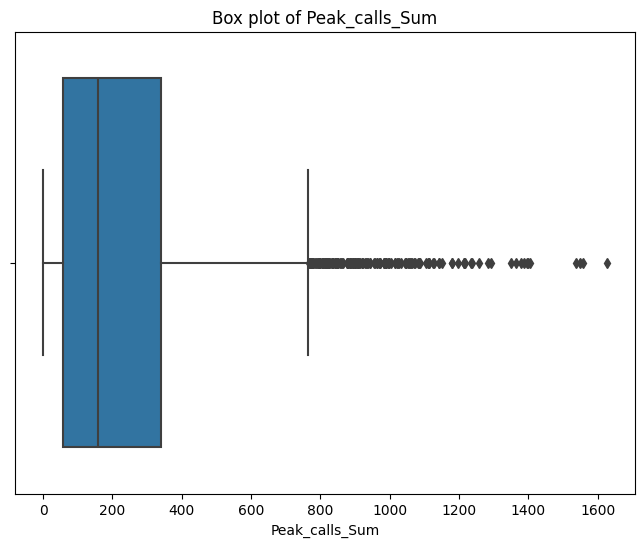

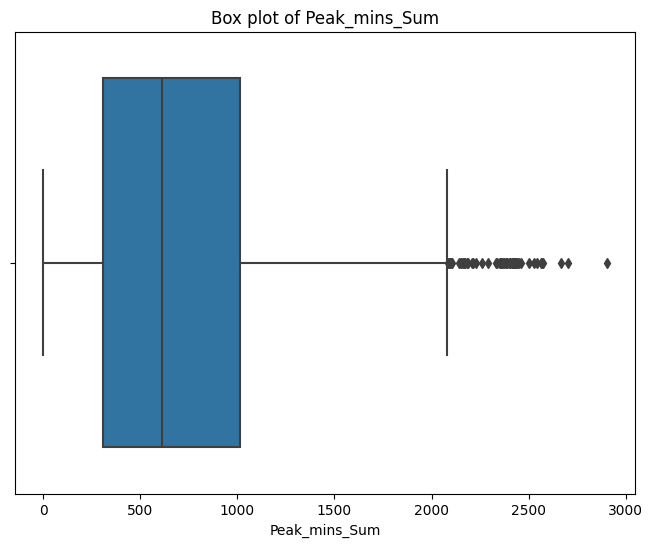

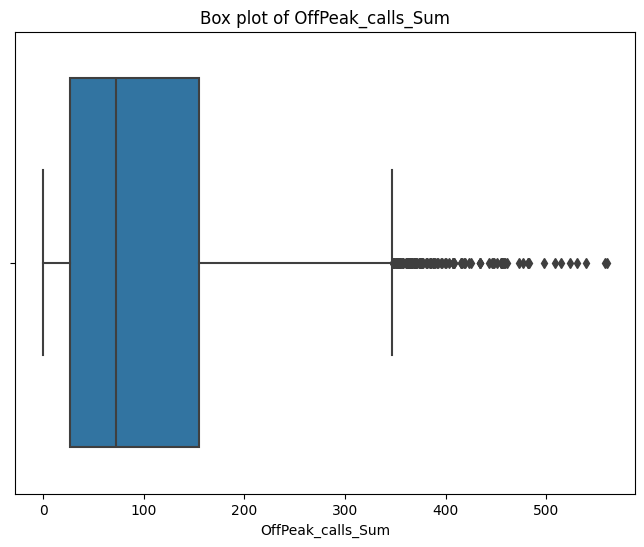

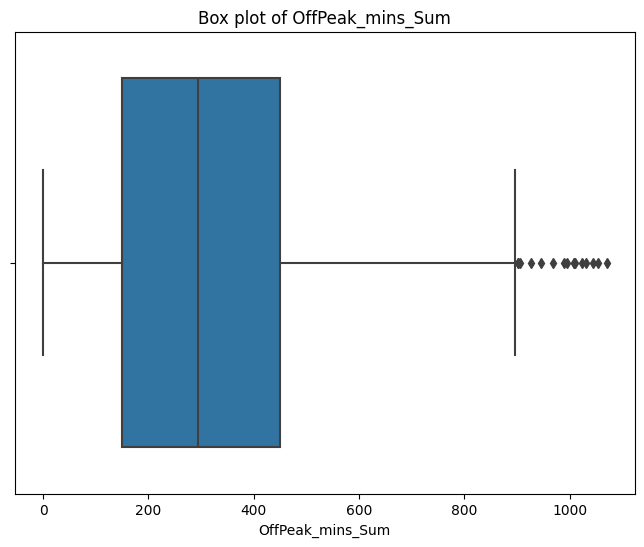

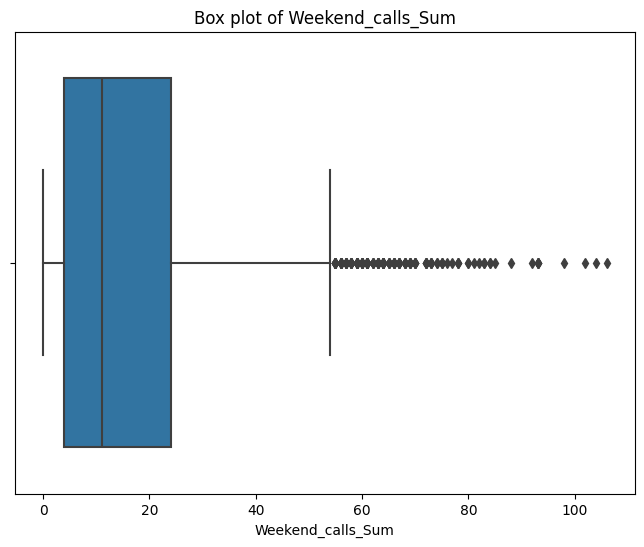

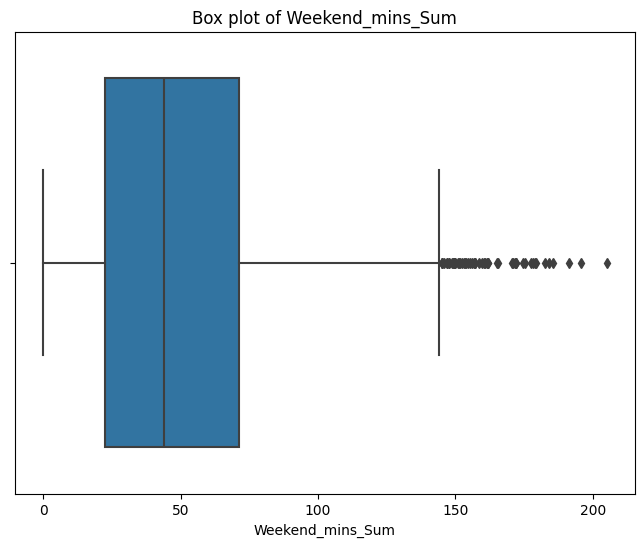

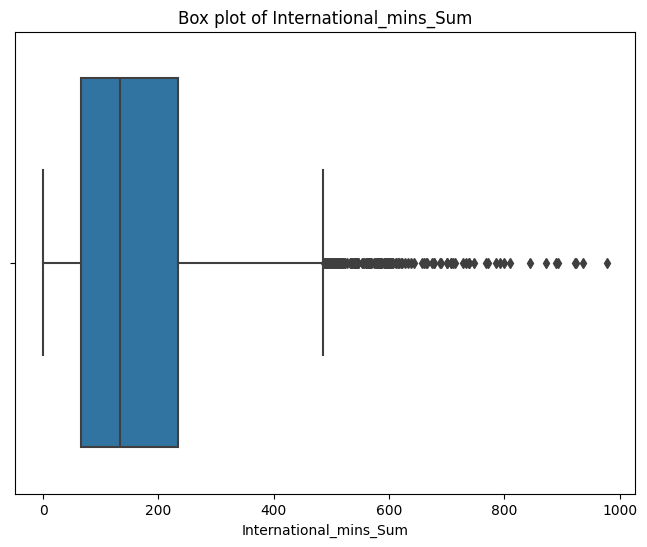

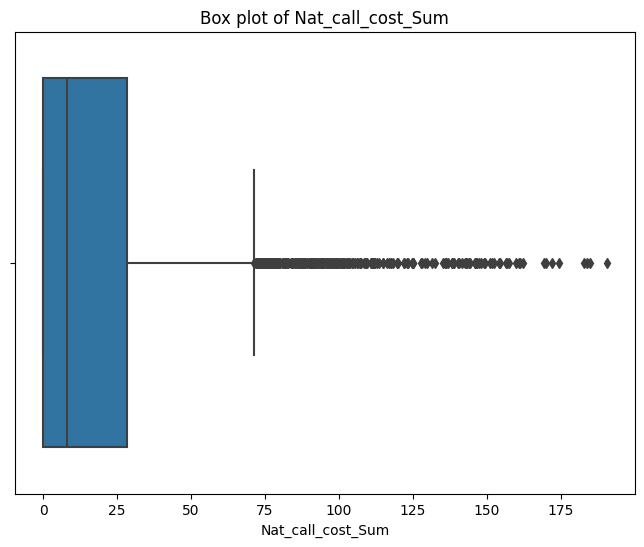

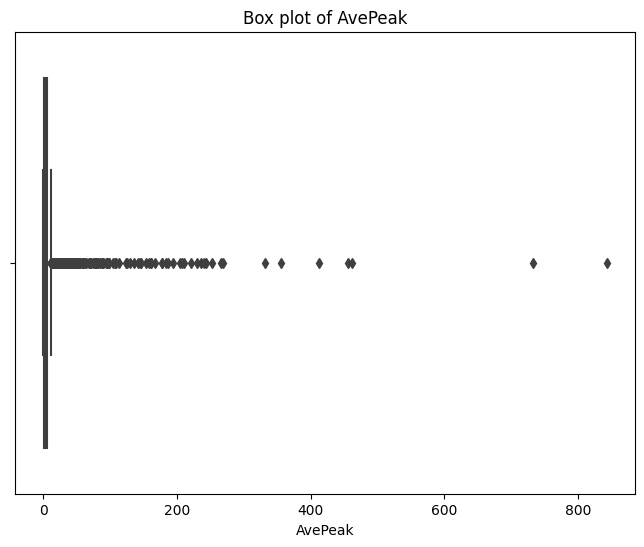

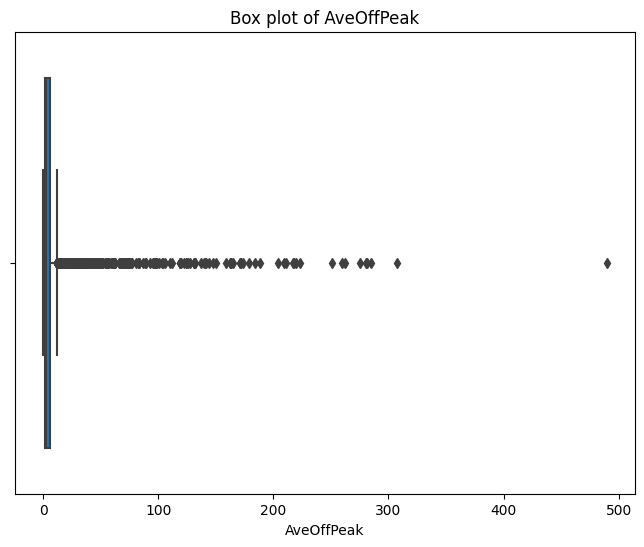

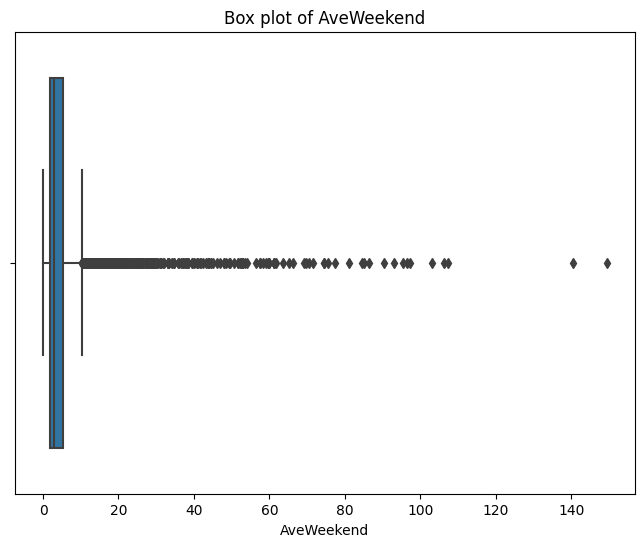

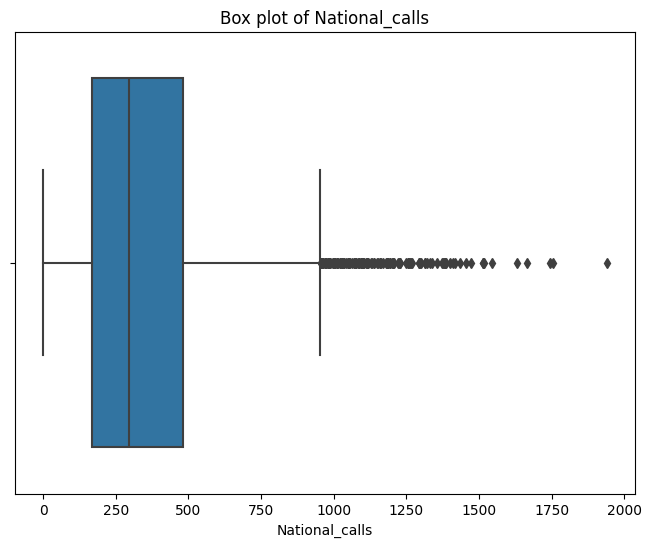

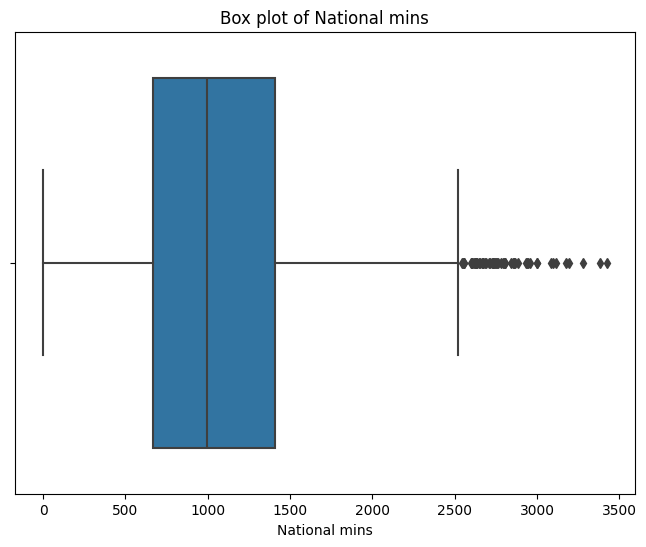

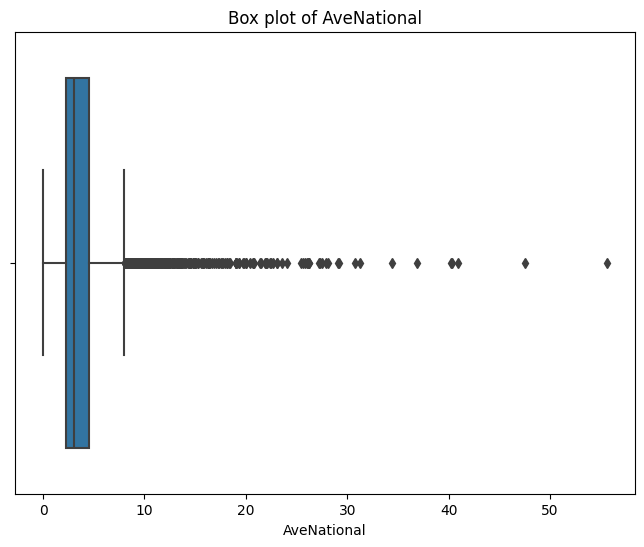

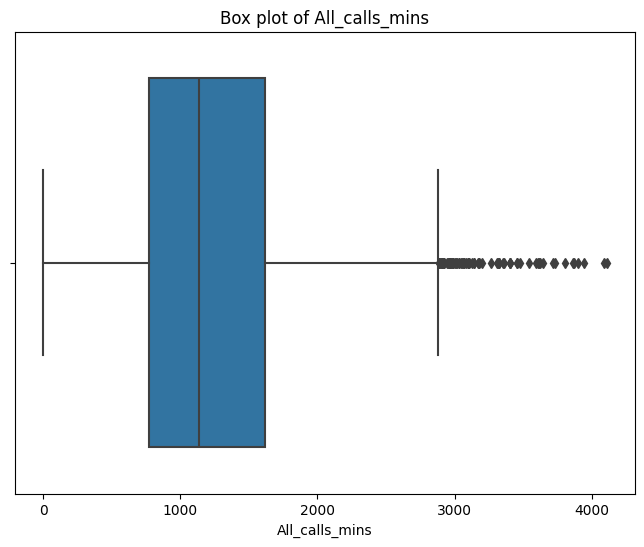

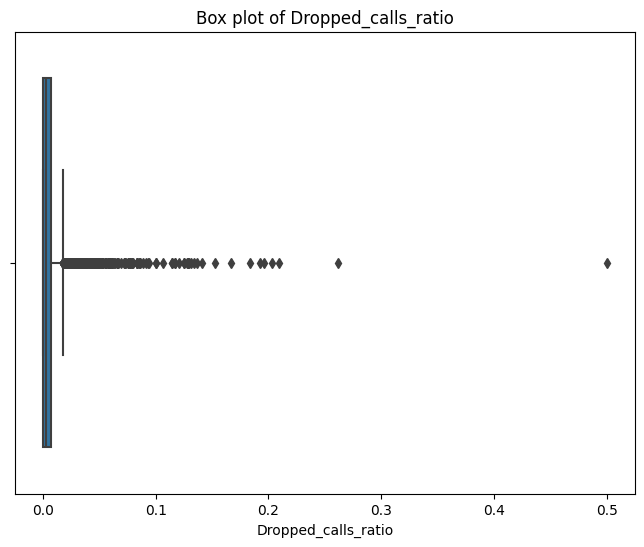

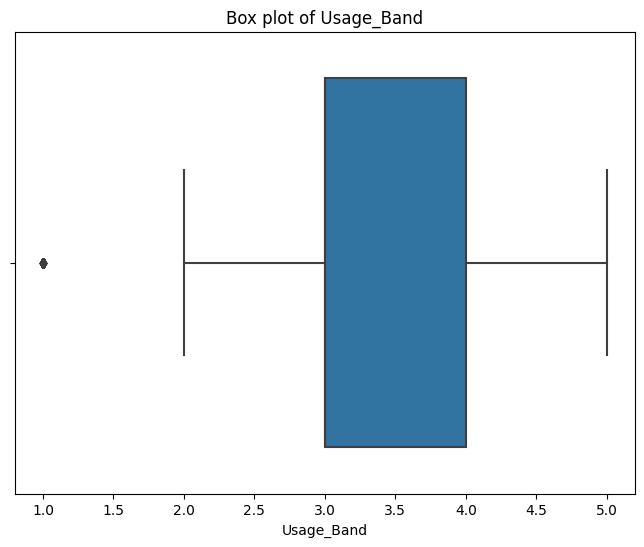

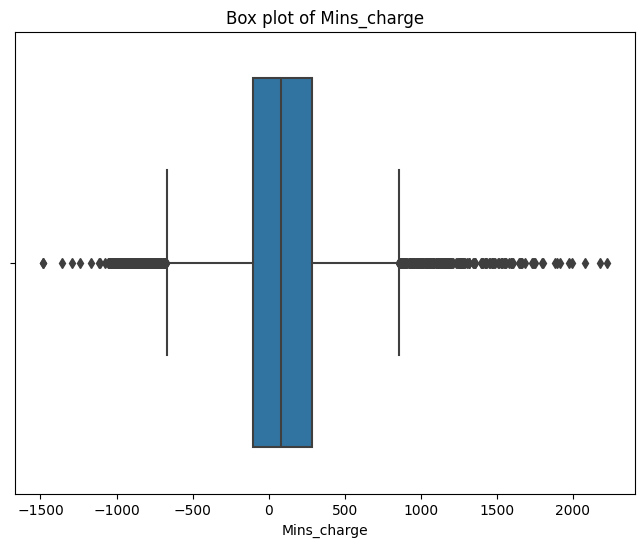

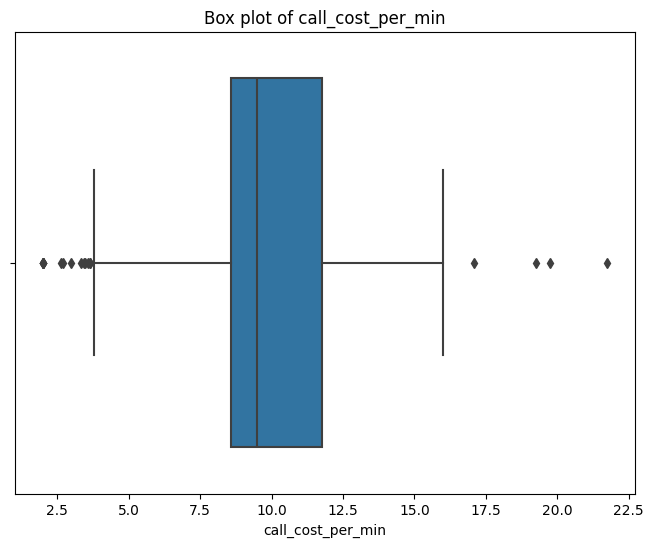

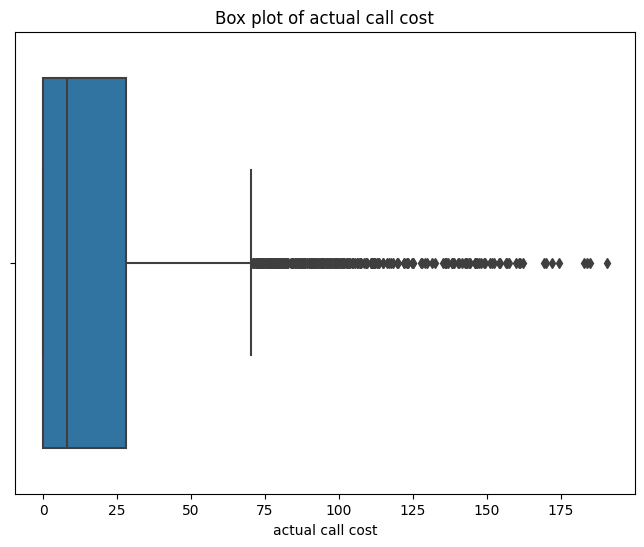

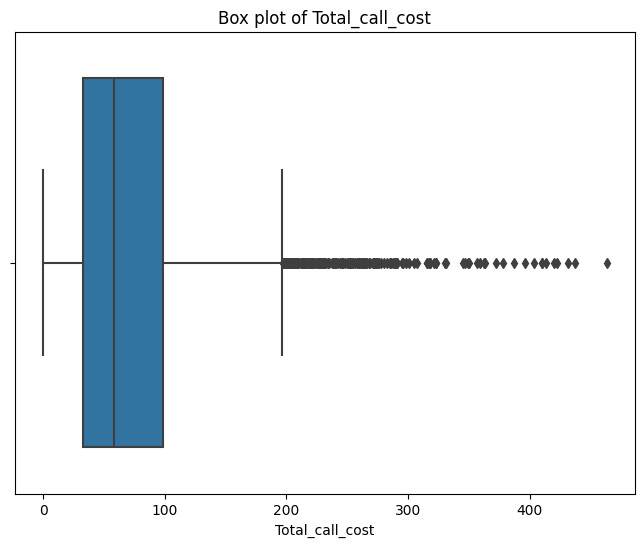

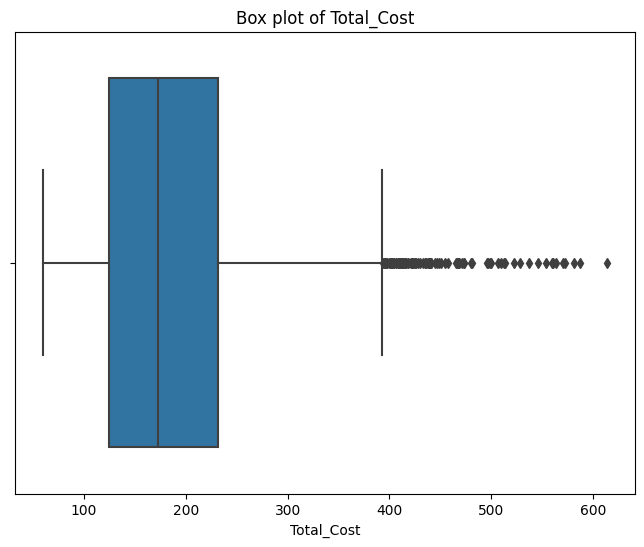

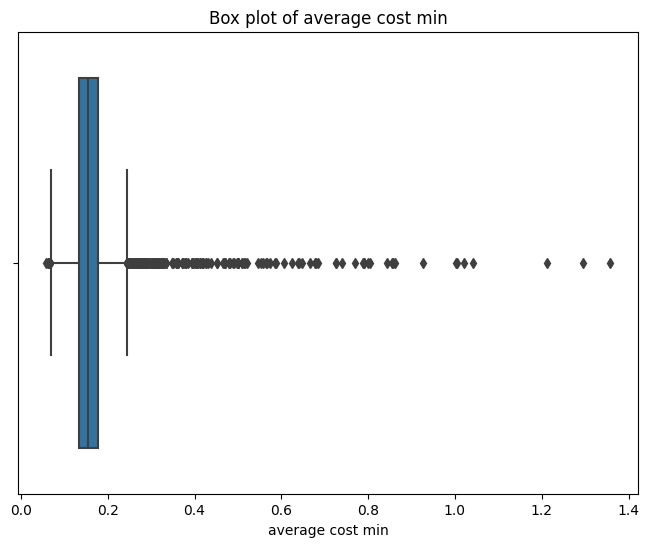

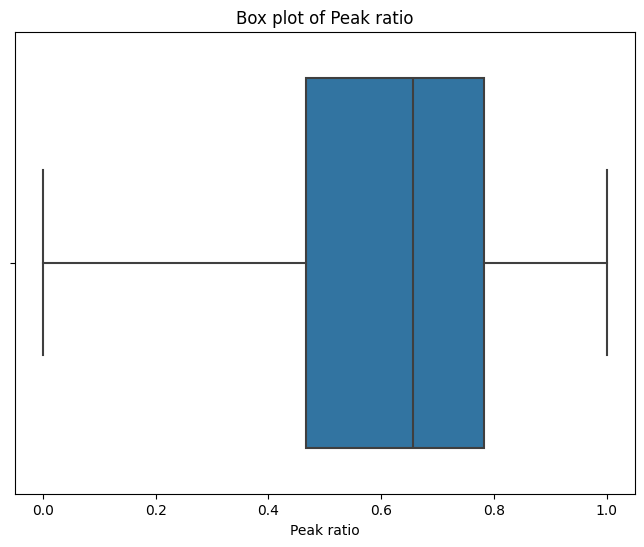

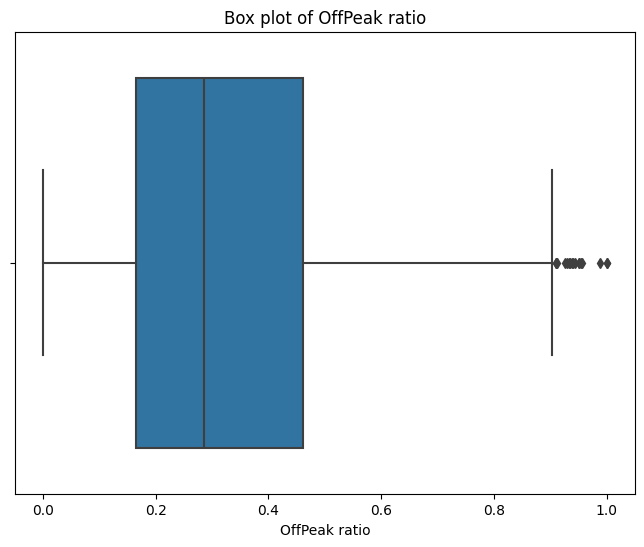

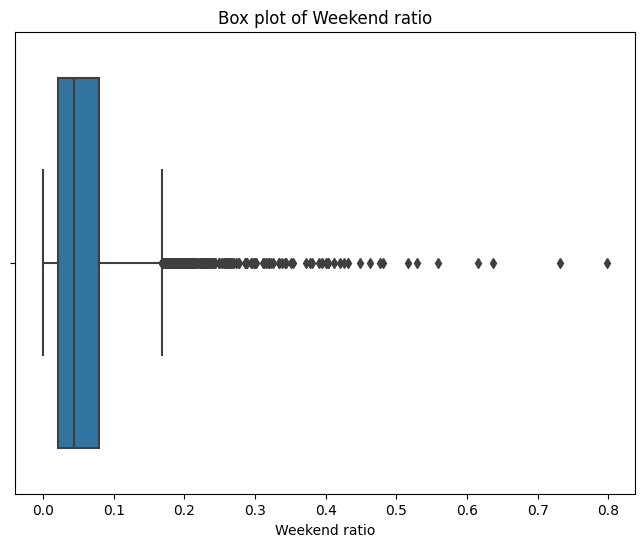

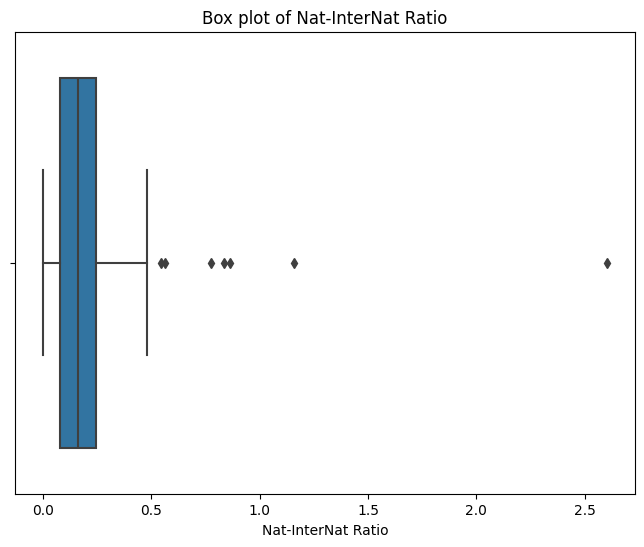

In [ ]:
#check the outliers
selected_columns = X_train.iloc[:, list(range(3, 27)) + list(range(28, 33))]
# Visualize outliers using box plots
for col in selected_columns.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=selected_columns[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()


In [ ]:
X_train[['Dropped_Calls','Dropped_calls_ratio']].describe()
df[['Dropped_Calls','Dropped_calls_ratio','target']].corr()
# consider the outliers and the correlation, keep "Dropped_Calls"

Dropped_Calls  Dropped_calls_ratio    target
Dropped_Calls             1.000000             0.502732  0.166548
Dropped_calls_ratio       0.502732             1.000000  0.106927
target                    0.166548             0.106927  1.000000

In [ ]:
print(X_train[['Peak_calls_Sum', 'Peak_mins_Sum','OffPeak_calls_Sum',
       'OffPeak_mins_Sum','Peak ratio','OffPeak ratio']].describe())
print(df[['Peak_calls_Sum', 'Peak_mins_Sum','OffPeak_calls_Sum',
       'OffPeak_mins_Sum','Peak ratio','OffPeak ratio','target']].corr())

       Peak_calls_Sum  Peak_mins_Sum  OffPeak_calls_Sum  OffPeak_mins_Sum  \
count     4035.000000    4035.000000        4035.000000       4035.000000   
mean       237.562825     709.928643         104.119455        314.366767   
std        239.607595     505.746986          98.861492        200.325314   
min          0.000000       0.000000           0.000000          0.000000   
25%         59.000000     307.199999          27.000000        149.400000   
50%        158.000000     613.200001          72.000000        294.000000   
75%        341.000000    1016.400001         155.000000        450.000000   
max       1626.000000    2901.600001         560.000000       1070.100000   

        Peak ratio  OffPeak ratio  
count  4035.000000    4035.000000  
mean      0.609505       0.328484  
std       0.225317       0.211055  
min       0.000000       0.000000  
25%       0.465803       0.164789  
50%       0.656293       0.286145  
75%       0.782890       0.461319  
max       1.000000

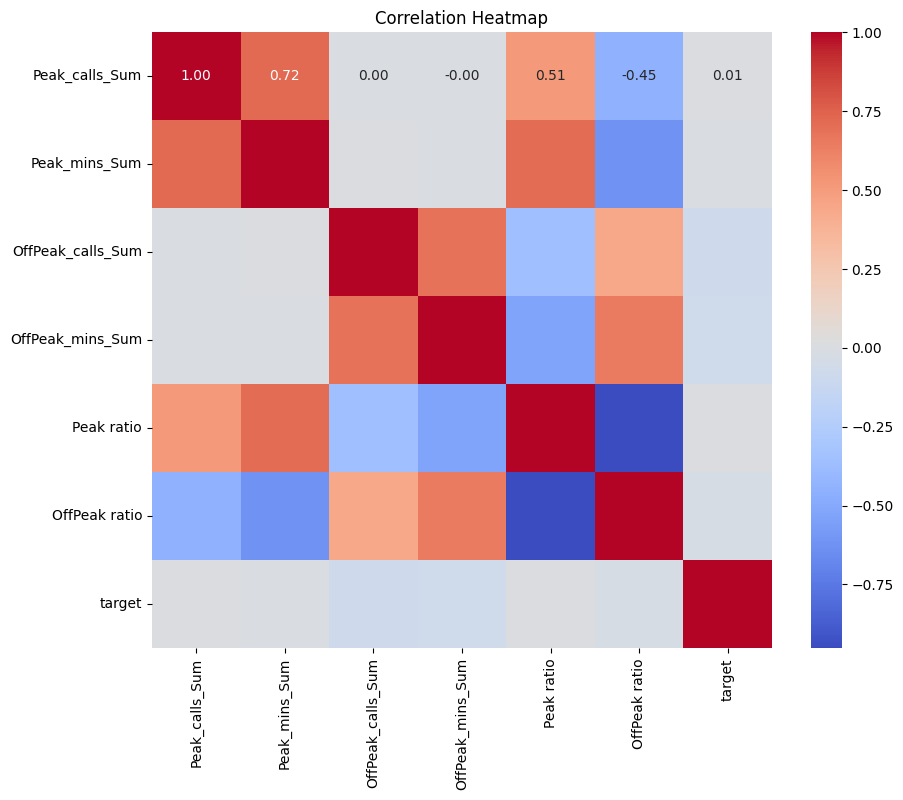

In [ ]:
calls_corr=df[['Peak_calls_Sum', 'Peak_mins_Sum','OffPeak_calls_Sum',
       'OffPeak_mins_Sum','Peak ratio','OffPeak ratio','target']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(calls_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/hy/Sta

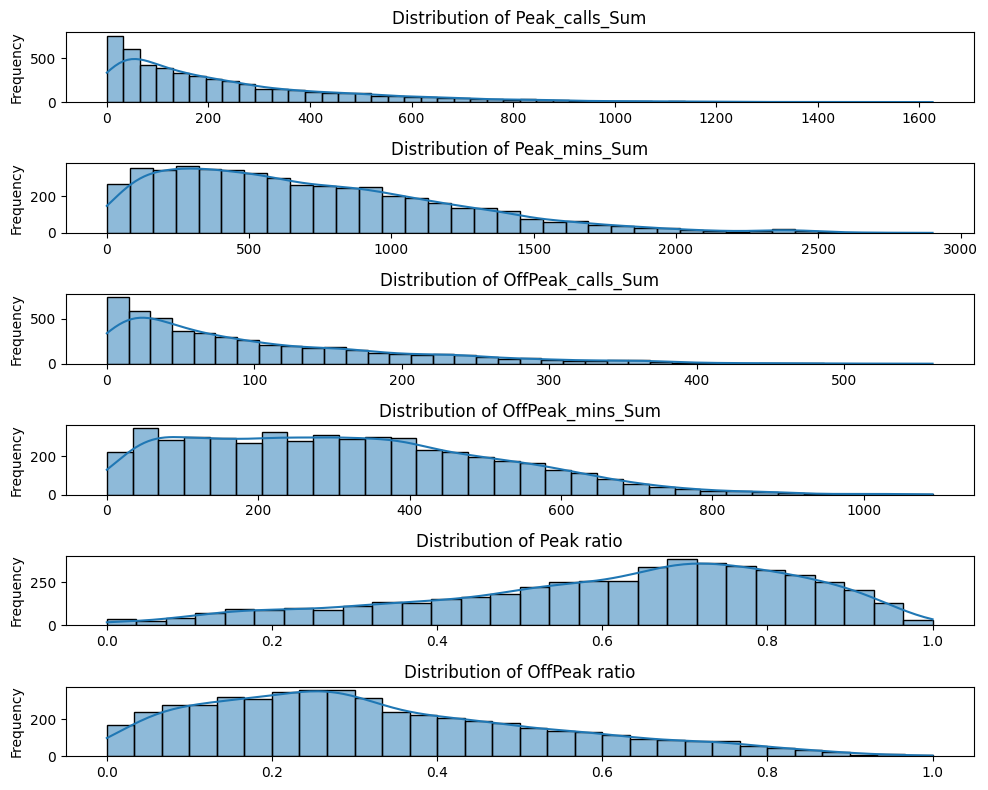

In [ ]:
columns_to_plot = ['Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum', 'OffPeak_mins_Sum', 'Peak ratio', 'OffPeak ratio']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10, 8))

# Iterate over the columns and plot histograms
for i, column in enumerate(columns_to_plot):
    sns.histplot(data=df, x=column, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

# keep the "Peak Ratio"

In [ ]:
print(X_train[['call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost' ,'average cost min']].describe())
print(df[['call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost' ,'average cost min','All_calls_mins','target']].corr())

       call_cost_per_min  actual call cost  Total_call_cost   Total_Cost  \
count        4031.000000       4035.000000      4035.000000  4035.000000   
mean           10.094104         19.381327        74.278441   187.390902   
std             2.121024         28.411284        61.005035    83.152749   
min             2.000000          0.000000         0.000000    59.940000   
25%             8.565235          0.000000        32.920884   124.259740   
50%             9.490514          7.948167        58.354692   173.254831   
75%            11.750861         28.133685        98.315574   231.902400   
max            21.734694        190.464194       463.233885   613.233885   

       average cost min  
count       4035.000000  
mean           0.168267  
std            0.080277  
min            0.058853  
25%            0.134327  
50%            0.154326  
75%            0.178440  
max            1.357564  
                   call_cost_per_min  actual call cost  Total_call_cost  \
call_c

In [ ]:
print(df[['Weekend_calls_Sum', 'Weekend_mins_Sum','AveWeekend','Weekend ratio','target']].corr())
print(X_train[['Weekend_calls_Sum', 'Weekend_mins_Sum','AveWeekend','Weekend ratio']].describe())


                   Weekend_calls_Sum  Weekend_mins_Sum  AveWeekend  \
Weekend_calls_Sum           1.000000          0.704562   -0.274981   
Weekend_mins_Sum            0.704562          1.000000    0.155437   
AveWeekend                 -0.274981          0.155437    1.000000   
Weekend ratio               0.435712          0.594431    0.091466   
target                     -0.007683         -0.023085   -0.019282   

                   Weekend ratio    target  
Weekend_calls_Sum       0.435712 -0.007683  
Weekend_mins_Sum        0.594431 -0.023085  
AveWeekend              0.091466 -0.019282  
Weekend ratio           1.000000  0.050588  
target                  0.050588  1.000000  
       Weekend_calls_Sum  Weekend_mins_Sum   AveWeekend  Weekend ratio
count        4035.000000       4035.000000  4035.000000    4035.000000
mean           16.456506         49.755194     5.718035       0.061020
std            16.439619         35.997862     9.923435       0.064126
min             0.000000 

In [ ]:
print(X_train[[ 'International_mins_Sum', 'Nat_call_cost_Sum','National_calls',
               'National mins','AveNational','Nat-InterNat Ratio']].describe())
print(df[[ 'International_mins_Sum', 'Nat_call_cost_Sum','National_calls',
               'National mins','AveNational','Nat-InterNat Ratio','target']].corr())


       International_mins_Sum  Nat_call_cost_Sum  National_calls  \
count             4035.000000        4035.000000     4035.000000   
mean               171.191658          19.531408      358.138786   
std                143.321766          28.427619      259.311236   
min                  0.000000           0.000000        0.000000   
25%                 66.605724           0.000000      169.000000   
50%                133.064545           8.206579      295.000000   
75%                234.684089          28.506009      483.000000   
max                977.723297         190.464195     1939.000000   

       National mins  AveNational  Nat-InterNat Ratio  
count    4035.000000  4035.000000         4035.000000  
mean     1074.050603     4.130909            0.163445  
std       545.653013     3.644125            0.106062  
min         0.000000     0.000000            0.000000  
25%       665.700000     2.242726            0.080211  
50%       996.700002     3.003441            0.1610

In [ ]:
X_train.columns

Index(['Gender', 'Age', 'Connect_Date', 'L_O_S', 'Dropped_Calls',
       'Peak_calls_Sum', 'Peak_mins_Sum', 'OffPeak_calls_Sum',
       'OffPeak_mins_Sum', 'Weekend_calls_Sum', 'Weekend_mins_Sum',
       'International_mins_Sum', 'Nat_call_cost_Sum', 'AvePeak', 'AveOffPeak',
       'AveWeekend', 'National_calls', 'National mins', 'AveNational',
       'All_calls_mins', 'Dropped_calls_ratio', 'Usage_Band', 'Mins_charge',
       'call_cost_per_min', 'actual call cost', 'Total_call_cost',
       'Total_Cost', 'Tariff_OK', 'average cost min', 'Peak ratio',
       'OffPeak ratio', 'Weekend ratio', 'Nat-InterNat Ratio',
       'high Dropped calls', 'No Usage', 'use_days', 'tariff_CAT 200',
       'tariff_CAT 50', 'tariff_Play 100', 'tariff_Play 300', 'Handset_ASAD90',
       'Handset_BS110', 'Handset_BS210', 'Handset_CAS30', 'Handset_CAS60',
       'Handset_S50', 'Handset_S80', 'Handset_SOP10', 'Handset_SOP20',
       'Handset_WC95', 'Usage_Band_perank'],
      dtype='object')

In [ ]:
y_train.value_counts()

target
0    3429
1     606
Name: count, dtype: int64

(array([3427.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         604.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

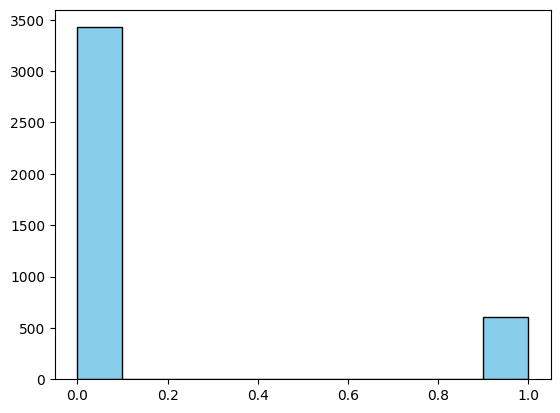

In [ ]:
plt.hist(y_train, bins=10, color='skyblue', edgecolor='black')

In [ ]:
# Find rows with missing values in X_train
na = X_train.isna().any(axis=1)
# drop the na value
X_train = X_train[~na]
y_train = y_train[~na]


In [ ]:
X_features=['Age','Gender',
            'L_O_S','Dropped_calls_ratio','Mins_charge',
            'National mins',
            'Total_call_cost',
            'tariff_CAT 200','tariff_CAT 50', 'tariff_Play 100', 'tariff_Play 300',
            'Handset_ASAD90','Handset_BS110', 'Handset_BS210', 'Handset_CAS30', 'Handset_CAS60',
            'Handset_S50', 'Handset_S80', 'Handset_SOP10', 'Handset_SOP20','Handset_WC95', 'Usage_Band_perank','Tariff_OK']

# 'OffPeak_calls_Sum','International_mins_Sum','National mins','OffPeak_mins_Sum','call_cost_per_min',,'average cost min',
# 'use_days','Gender','Weekend ratio','Nat-InterNat Ratio', 'OffPeak ratio',


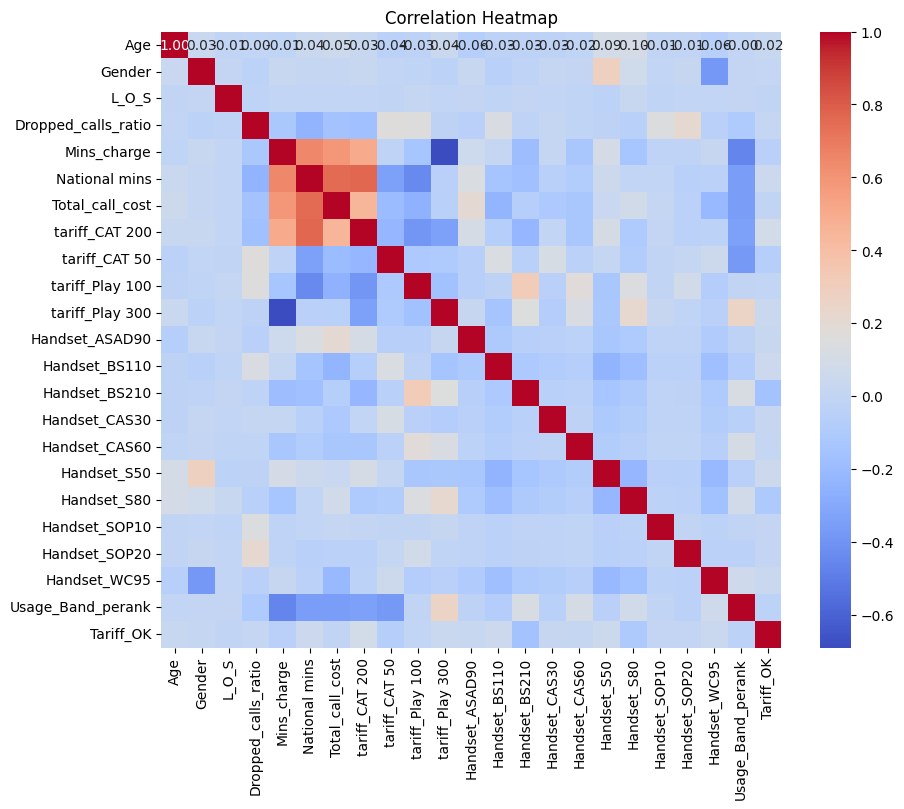

In [ ]:
features_corr=X_train[X_features].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(features_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

model prediction

In [ ]:
# top 20 metric
customer_costs = X_test['average cost min']
def profit_top_20(y_probs):
    # Sort the predicted probabilities and get indices of top-k predicted churners/1
    true_positives = np.where(y_test == 1)[0]
    sorted_probs = y_probs[true_positives]
    top_20 = true_positives[(-sorted_probs).argsort()[:20]]
    profit_top_20 = customer_costs.iloc[top_20].sum()
    return profit_top_20

/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/ad

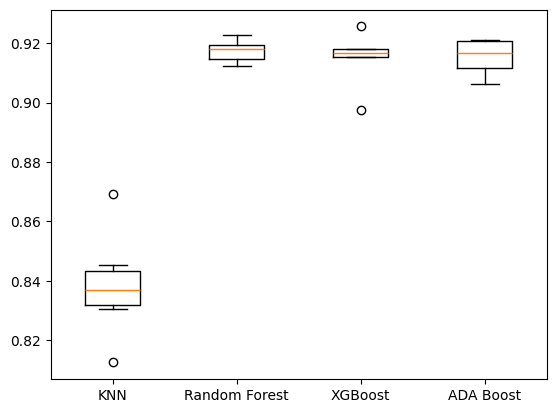

In [ ]:
## training model
models={ "KNN": KNeighborsClassifier(),"Random Forest": RandomForestClassifier(),
          "XGBoost": XGBClassifier(),"ADA Boost": AdaBoostClassifier() }
results= []
for model in models.values():
      kf=KFold(n_splits=6, random_state=42, shuffle=True)
      cv_results=cross_val_score(model, X_train[X_features], y_train, cv=kf)
      results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()


In [ ]:
## test model
for name, model in models.items():
  model.fit(X_train[X_features], y_train)
  probs=model.predict_proba(X_test[X_features])[:, 1]
  auc_score = roc_auc_score(y_test, probs)
  top_20=profit_top_20(probs)
  print("{} Test Set Metrics: AUC = {:.4f}, Top 20 Profit = {:.4f}".format(name, auc_score, top_20))

KNN Test Set Metrics: AUC = 0.6132, Top 20 Profit = 4.7707
Random Forest Test Set Metrics: AUC = 0.9254, Top 20 Profit = 3.5963
XGBoost Test Set Metrics: AUC = 0.9223, Top 20 Profit = 3.7300


/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


ADA Boost Test Set Metrics: AUC = 0.9240, Top 20 Profit = 3.8329


Random forest


In [ ]:
seed=100
rf=RandomForestClassifier(n_estimators=476,
                          max_features = "log2",
                          bootstrap = True,
                          class_weight ='balanced',
                          random_state = seed,
                          max_depth=14,
                          min_samples_split=14,
                          min_samples_leaf=6)
rf.fit(X_train[X_features],y_train)

RandomForestClassifier(class_weight='balanced', max_depth=14,
                       max_features='log2', min_samples_leaf=6,
                       min_samples_split=14, n_estimators=476,
                       random_state=100)

In [ ]:
y_rf_pred = rf.predict(X_test[X_features])
y_rf_probs = rf.predict_proba(X_test[X_features])[:, 1]

In [ ]:

rf_accu=accuracy_score(y_test, y_rf_pred)
print("Accuracy:", rf_accu)

rf_scores = cross_val_score(rf, X_train[X_features], y_train, cv=5)
print("Cross Validation Scores:", rf_scores)


Accuracy: 0.9266600594648167
Cross Validation Scores: [0.9157373  0.91191067 0.93548387 0.9057072  0.93920596]


In [ ]:
# only for the features
importances_rf=pd.Series(rf.feature_importances_,index=X_train[X_features].columns)
# sort the features
sorted_importances_rf=importances_rf.sort_values(ascending=False)
important_rf=(sorted_importances_rf[sorted_importances_rf>0.01])
print(important_rf)

Handset_ASAD90         0.205538
Handset_CAS30          0.134061
Dropped_calls_ratio    0.073202
Total_call_cost        0.072640
National mins          0.070623
Mins_charge            0.063839
L_O_S                  0.054255
Handset_WC95           0.053986
Age                    0.052394
Handset_S80            0.035678
Handset_S50            0.023719
Usage_Band_perank      0.023162
Tariff_OK              0.022657
tariff_Play 100        0.021525
Handset_BS210          0.015139
Handset_BS110          0.015101
Handset_SOP20          0.014580
Handset_SOP10          0.014264
Gender                 0.012247
dtype: float64


In [ ]:
auc_score_rf = roc_auc_score(y_test, y_rf_probs)
top_20_rf=profit_top_20(y_rf_probs)
print(auc_score_rf,top_20_rf)


0.9286777474572068 3.595325


In [ ]:
import scikitplot as skplt

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

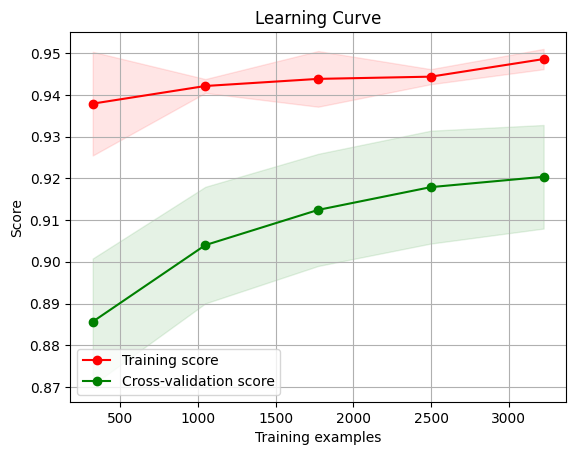

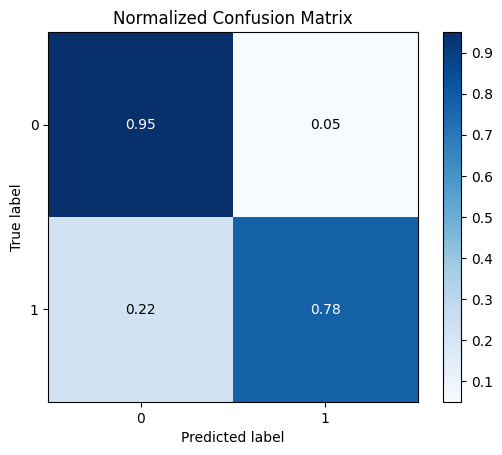

In [ ]:
#confusion_matrix
skplt.estimators.plot_learning_curve(rf,X_train[X_features],y_train)

skplt.metrics.plot_confusion_matrix(y_test,y_rf_pred,normalize=True)

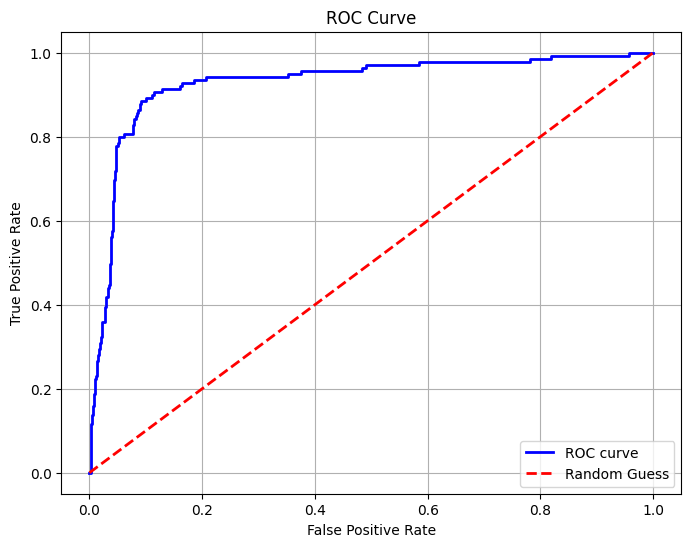

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_rf_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
from scipy.stats import randint


In [ ]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20),
              'min_samples_split': randint(1,20),
              'min_samples_leaf': randint(1,20),
              'max_features': ['sqrt','log2']}

# Use random search to find the best hyperparameters
rf1=RandomForestClassifier()
rand_search = RandomizedSearchCV(rf1,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5,
                                 n_jobs = -1)

# Fit the random search object to the data
rand_search.fit(X_train[X_features], y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('hyperparameters:',  rand_search.best_params_)

hyperparameters: {'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 14, 'n_estimators': 476}


for extreme random forest

In [ ]:
erf = ExtraTreesClassifier(n_estimators=1000, max_depth=None, min_samples_split=2,
                                      random_state=0, max_features= "sqrt", bootstrap=False)
erf.fit(X_train[X_features], y_train)

In [ ]:
cv_erf = RepeatedStratifiedKFold(n_splits=10, n_repeats=1, random_state=1)
scores_erf = cross_val_score(erf, X_train_ina[X_features], y_train_ina, cv=cv, scoring = "accuracy")
print(scores_erf, mean(scores_erf), std(scores_erf))

for KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7,weights='uniform',
                           algorithm = 'brute',metric='manhattan')
knn.fit(X_train[X_features], y_train)

KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=7)

In [ ]:
y_knn_probs = knn.predict_proba(X_test[X_features])[:, 1]
auc_score_knn = roc_auc_score(y_test, y_knn_probs)
top_20_knn=profit_top_20(y_knn_probs)
print(auc_score_knn,top_20_knn)

0.6227983130736789 4.106612


In [ ]:
neighbors = np.arange(1, 21)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
	knn = KNeighborsClassifier(n_neighbors=neighbor)
	knn.fit(X_train[X_features], y_train)
	train_accuracies[neighbor] = knn.score(X_train[X_features], y_train)
	test_accuracies[neighbor] = knn.score(X_test[X_features], y_test)


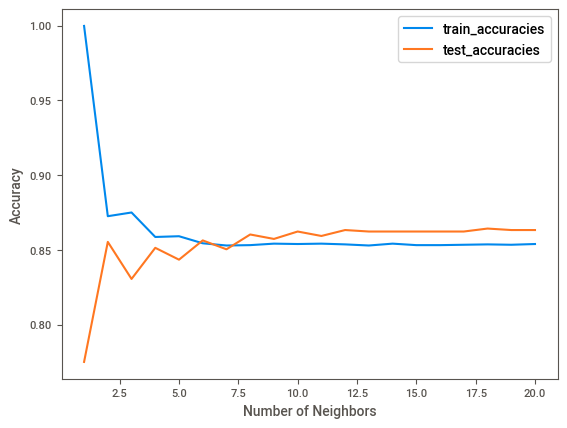

In [ ]:
plt.plot(neighbors,train_accuracies.values(), label="train_accuracies")
plt.plot(neighbors, test_accuracies.values(), label="test_accuracies")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
grid_params_knn = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan'],
               'algorithm':['brute','ball_tree','kd_tree']}

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params_knn, verbose = 1, cv=3, n_jobs = -1)


In [ ]:
g_res = gs.fit(X_train[X_features], y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
g_res.best_score_

0.8506573251663534

In [ ]:
g_res.best_params_

{'algorithm': 'brute',
 'metric': 'manhattan',
 'n_neighbors': 13,
 'weights': 'uniform'}

logistic regression

In [ ]:
scaler = StandardScaler()
quan_columns = ['Age','L_O_S','use_days','OffPeak_mins_Sum','OffPeak_calls_Sum','Dropped_calls_ratio',
                'Mins_charge','call_cost_per_min','average cost min','Weekend ratio','Nat-InterNat Ratio',
                'call_cost_per_min', 'average cost min', 'Total_call_cost','International_mins_Sum','National mins',]
X_lg = X_train.copy()  # Create a copy of the original DataFrame
X_lg[quan_columns] = scaler.fit_transform(X_lg[quan_columns])



In [ ]:
print(X_lg)

      Gender       Age Connect_Date     L_O_S  Dropped_Calls  Peak_calls_Sum  \
158        1  0.057747   1999-08-22 -1.418941            2.0           166.0   
3828       1 -0.884670   1998-02-23 -0.125708           11.0            46.0   
1996       1 -1.277343   1999-01-09 -0.885037            1.0           401.0   
1180       0 -0.413461   1998-04-24 -0.268082            0.0            34.0   
4384       0  2.570856   1999-07-23 -1.347754            2.0           296.0   
...      ...       ...          ...       ...            ...             ...   
4114       1 -0.256392   1996-07-02  1.300408            1.0           443.0   
2077       1 -0.806135   1999-08-22 -1.418941            8.0           176.0   
857        0 -1.120274   1997-08-02  0.360737            2.0            22.0   
1278       1 -0.256392   1997-01-08  0.849556            1.0          1021.0   
1079       0  0.607489   1999-05-02 -1.153176            2.0           624.0   

      Peak_mins_Sum  OffPeak_calls_Sum 

In [ ]:

# Initialize and train the logistic regression model
lg=['Dropped_calls_ratio','Usage_Band_perank','Tariff_OK',
    'Handset_ASAD90','Handset_BS110', 'Handset_BS210', 'Handset_CAS30', 'Handset_CAS60',
    'Handset_S50', 'Handset_S80', 'Handset_SOP10', 'Handset_SOP20','Handset_WC95']
logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_lg[lg], y_train)


# Predict probabilities of positive class for test data
y_lg_probs = logistic_reg.predict_proba(X_test[lg])[:, 1]
y_lg_pred = logistic_reg.predict(X_test[lg])

In [ ]:
auc_score_lg = roc_auc_score(y_test, y_lg_probs)
top_20_lg=profit_top_20(y_lg_probs)
print(auc_score_lg,top_20_lg)

0.8973662449350864 4.7745929999999985


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

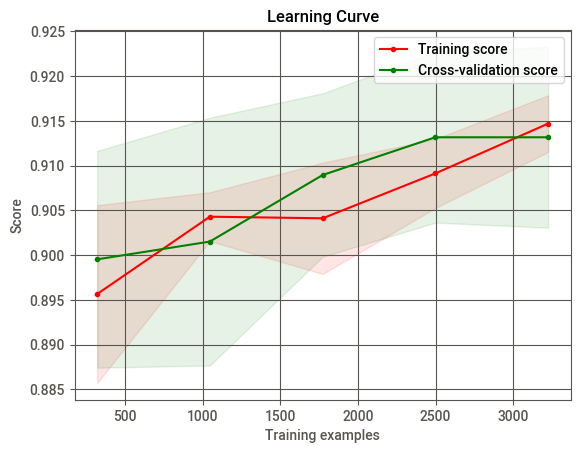

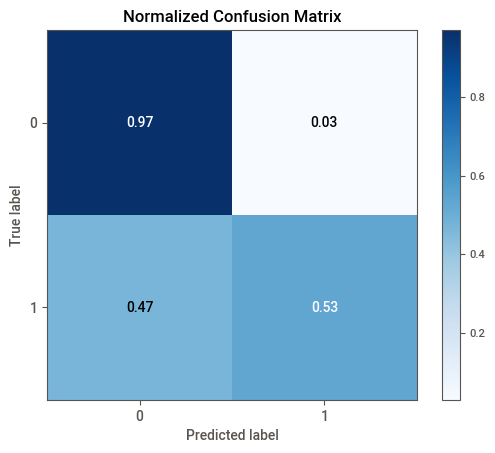

In [ ]:
skplt.estimators.plot_learning_curve(logistic_reg,X_lg[lg],y_train)
skplt.metrics.plot_confusion_matrix(y_test,y_lg_pred,normalize=True)

XG boost

In [ ]:
xg=xgb.XGBClassifier()
xg.fit(X_train[X_features], y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_xg_pred=xg.predict(X_test[X_features])
y_xg_probs = xg.predict_proba(X_test[X_features])[:, 1]

In [ ]:
auc_score_xg = roc_auc_score(y_test, y_xg_probs)
top_20_xg=profit_top_20(y_xg_probs)
print(auc_score_xg,top_20_xg)

0.9223269660133961 3.7299720000000005


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

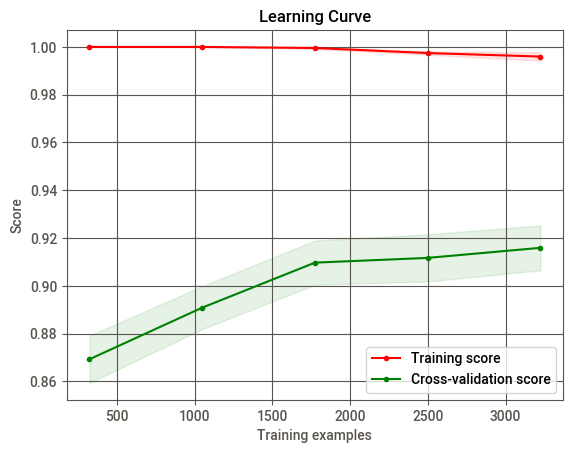

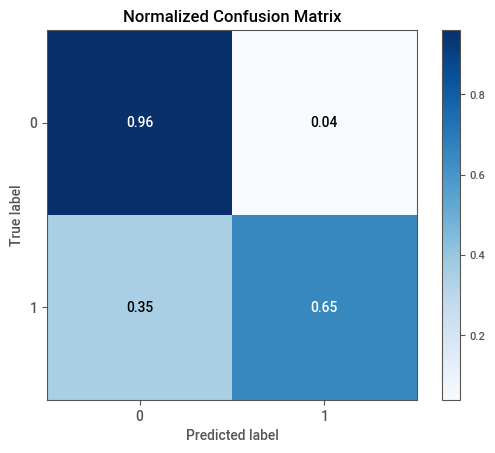

In [ ]:
#confusion_matrix
skplt.estimators.plot_learning_curve(xg,X_train[X_features],y_train)
skplt.metrics.plot_confusion_matrix(y_test,y_xg_pred,normalize=True)

In [ ]:
## ada boost
ada=AdaBoostClassifier()
ada.fit(X_train[X_features], y_train)
y_ada_pred=ada.predict(X_test[X_features])
y_ada_probs=ada.predict_proba(X_test[X_features])[:,1]


/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [ ]:
auc_score_ada=roc_auc_score(y_test,y_ada_probs)
top_20_ada=profit_top_20(y_ada_probs)
print(auc_score_ada,top_20_ada)

0.9240304308277516 3.832869


/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/advanced1/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/hy/StaDS/23-24 spring/Advanced analytics in a big data world/ad

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

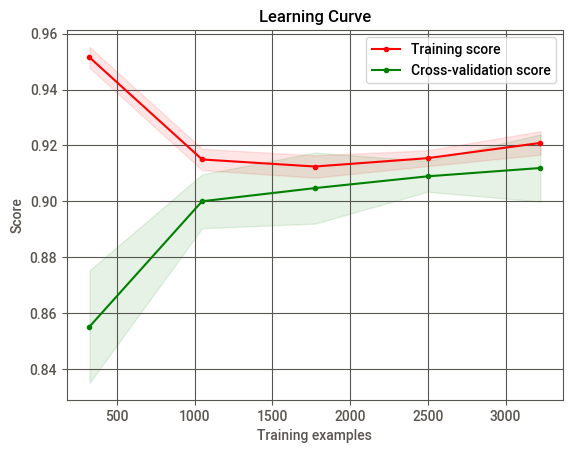

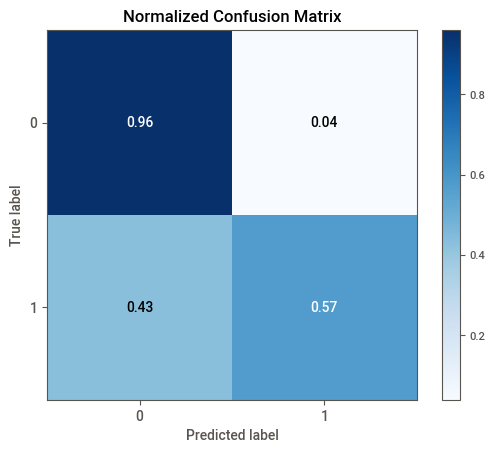

In [ ]:
skplt.estimators.plot_learning_curve(ada,X_train[X_features],y_train)
skplt.metrics.plot_confusion_matrix(y_test,y_ada_pred,normalize=True)

In [ ]:
logistic regression(0.8973662449350864 4.7745929999999985)

In [ ]:
test=pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  1682 non-null   object 
 1   Age                     1682 non-null   float64
 2   Connect_Date            1682 non-null   object 
 3   L_O_S                   1682 non-null   float64
 4   Dropped_Calls           1682 non-null   float64
 5   tariff                  1682 non-null   object 
 6   Handset                 1682 non-null   object 
 7   Peak_calls_Sum          1682 non-null   float64
 8   Peak_mins_Sum           1682 non-null   float64
 9   OffPeak_calls_Sum       1682 non-null   float64
 10  OffPeak_mins_Sum        1682 non-null   float64
 11  Weekend_calls_Sum       1682 non-null   float64
 12  Weekend_mins_Sum        1682 non-null   float64
 13  International_mins_Sum  1682 non-null   float64
 14  Nat_call_cost_Sum       1682 non-null   

In [ ]:
# features need to be transform to predict
test[oh_features]=test[oh_features].astype('category')
test = pd.get_dummies(test, columns=oh_features,drop_first=True,dtype='int')
test[bi_features] = test[bi_features].replace(mapping_bi)
# encode it as the percentile ranking
ub_ran=test['Usage_Band'].value_counts(normalize=True)*100
test['Usage_Band_perank']=test['Usage_Band'].map(ub_ran)
# encoding the categorical as 0-high and 1-ok for the tariff_ok
test['Tariff_OK'] = test['Tariff_OK'].replace('OK',1)\
                                           .replace(['High CAT 100', 'High CAT 50', 'High Play 100'],0)

#reference group "Play 100","BS210"


/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_25985/453519309.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test[bi_features] = test[bi_features].replace(mapping_bi)
/var/folders/d4/cp4g0mns44s67403lg_133gw0000gn/T/ipykernel_25985/453519309.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['Tariff_OK'] = test['Tariff_OK'].replace('OK',1)\


In [ ]:
y_rf_pred_final = rf.predict(test[X_features])
probs_final=rf.predict_proba(test[X_features])[:,1]


In [ ]:

# Calculate proportional prediction
test['pred'] = probs_final*test['average cost min']

print(test['average cost min'])


0       0.116924
1       0.120457
2       0.149435
3       0.137372
4       0.180704
          ...   
1677    0.122342
1678    0.163502
1679    0.127485
1680    0.205830
1681    0.110151
Name: average cost min, Length: 1682, dtype: float64


In [ ]:
test_rf=test[['id','pred']].round(2)
print(test_rf)

           id  pred
0     K751808  0.00
1     K837351  0.02
2     K548114  0.03
3     K736156  0.01
4     K508080  0.01
...       ...   ...
1677  K588314  0.01
1678  K826807  0.03
1679  K982731  0.02
1680  K623037  0.03
1681  K883413  0.01

[1682 rows x 2 columns]


In [ ]:
import csv

In [ ]:
output_file = "pred_rf.csv"

# Writing predictions to CSV file
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    for index, row in test_rf.iterrows():
        id_value = row['id']
        pred_value = row['pred']
        writer.writerow([f'{id_value}', f'{pred_value}'])